# Experiment 02: Influence of weight coefficients

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

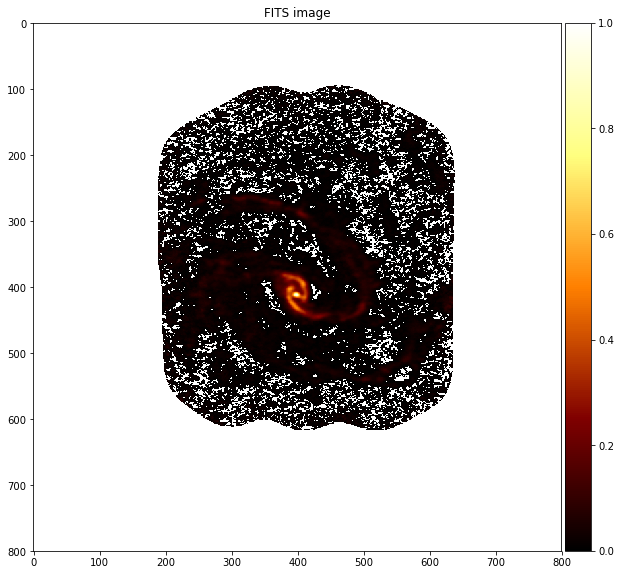

In [2]:
"""
Loading data
"""

fits_path = '../data/images/M100_combine_CO_cube.image.mom0.pbcor.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/home/mavillan/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3902: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__eq__(other)


<function graph.thresholded_image_plot>

## `Case 1 `:   $\alpha_1 \in [0,10]$

In [4]:
elm_list = list()
alpha1 = np.arange(0.,10.1,0.25)

for a1 in alpha1:
    # common parameters
    minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
    maxsig = 30*minsig

    # number of points of each type
    Nc = 300
    #Nb = int(0.2* np.sum(boundary_map(data, base_level))) #20% of boundary pixels
    Nb = int(0.2*Nc)
    Ne = 4*Nc-Nb

    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_points_generation(data, base_level, Nb)

    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]

    ## visualizing the choosen points
    #points_plot(data, center_points=center_points, title="Center Points")
    #points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


    #solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
    #params_plot(c0, sig0, xc, yc)
    #params_distribution_plot(c0, sig0)
    elm_list.append( ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=a1, lamb1=1., b=0., lamb2=1.,
                    d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.) )

../lib/points_generation.py:29: RuntimeWarning: invalid value encountered in less_equal
  mask = data <= base_level
../lib/points_generation.py:128: RuntimeWarning: invalid value encountered in greater
  pixel_map = data > base_level
../lib/variational.py:79: RuntimeWarning: invalid value encountered in greater
  self.mask = data > base_level


##########################################################################################
Processing example with alpha1: 0.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.032949565340329785
Residual Variance: 0.0010824255088002868
Flux Lost: 0.06816191418021786
Flux Addition: 0.05048482757486366
psi1(u-f): 15.6719520455817
Exceeded Pixels: 5359
Sharpness: 11.28951225845466
psi2(grad u): 0.8214424875619052
Total elapsed time: 366.60897159576416 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2661743572598256
Mean min distance between collocation and cente

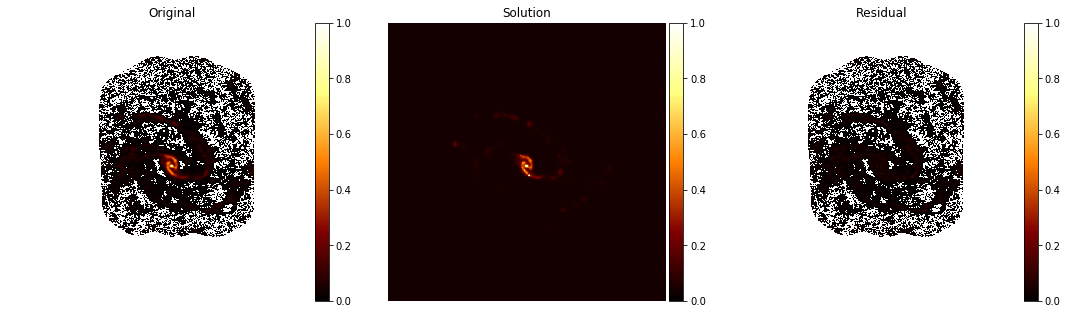

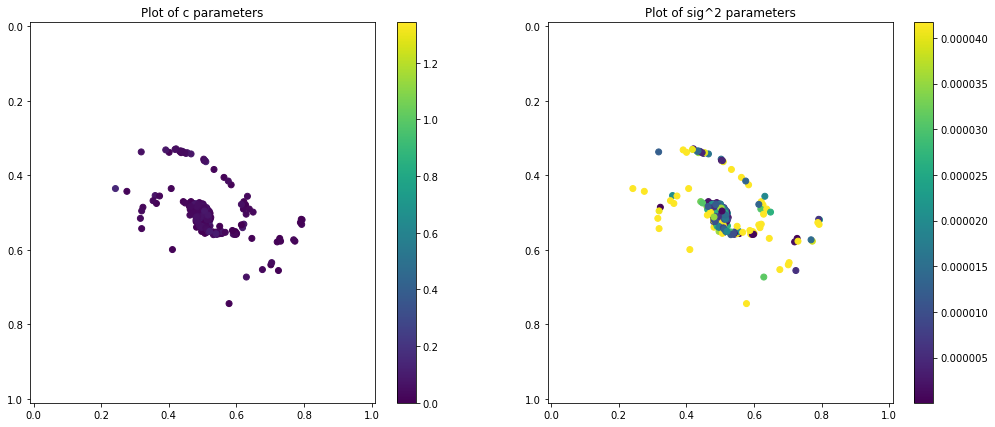

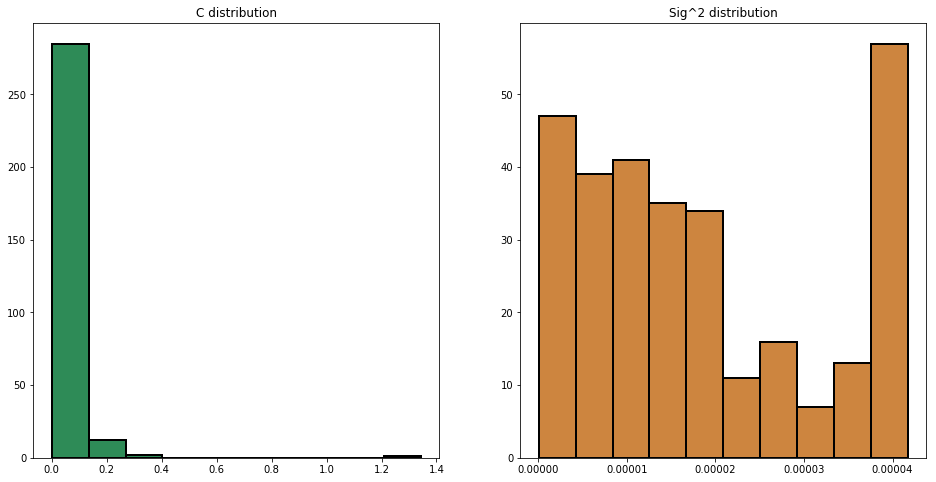

##########################################################################################
Processing example with alpha1: 0.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.03927247994461681
Residual Variance: 0.0015372948838573086
Flux Lost: 0.07290502160688372
Flux Addition: 0.05090190636616314
psi1(u-f): 18.7560959731501
Exceeded Pixels: 5148
Sharpness: 13.713756240791179
psi2(grad u): 2.366489165046968
Total elapsed time: 372.80992913246155 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26622709886880397
Mean min distance between collocation and cent

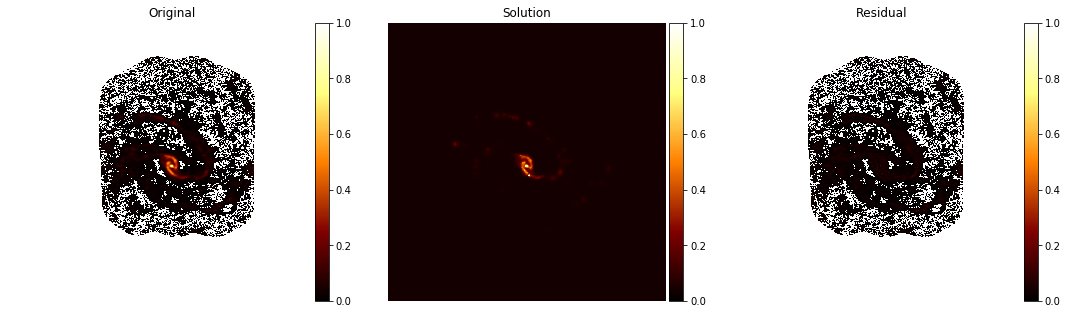

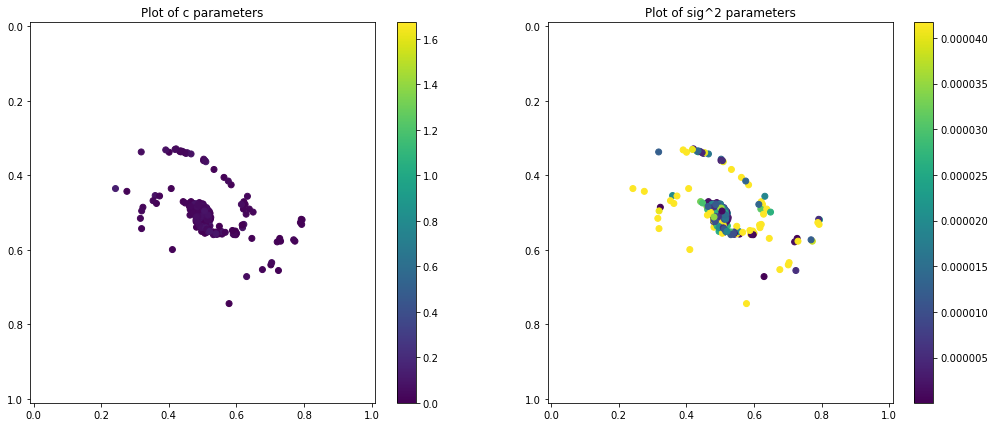

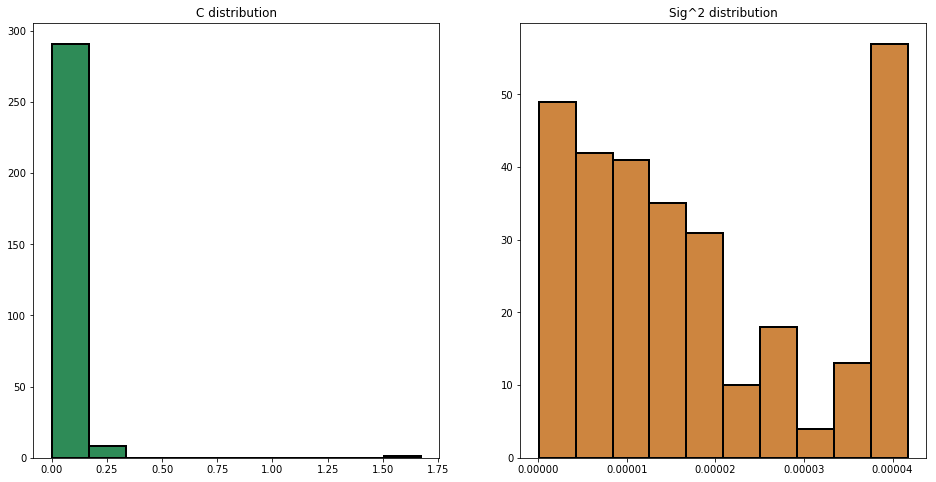

##########################################################################################
Processing example with alpha1: 0.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.04192457008492784
Residual Variance: 0.0017530789124843057
Flux Lost: 0.07259134621297648
Flux Addition: 0.05157693485742815
psi1(u-f): 19.87273019172934
Exceeded Pixels: 5126
Sharpness: 14.941696079427501
psi2(grad u): 3.484204025506264
Total elapsed time: 381.67157530784607 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26615505517793864
Mean min distance between collocation and cent

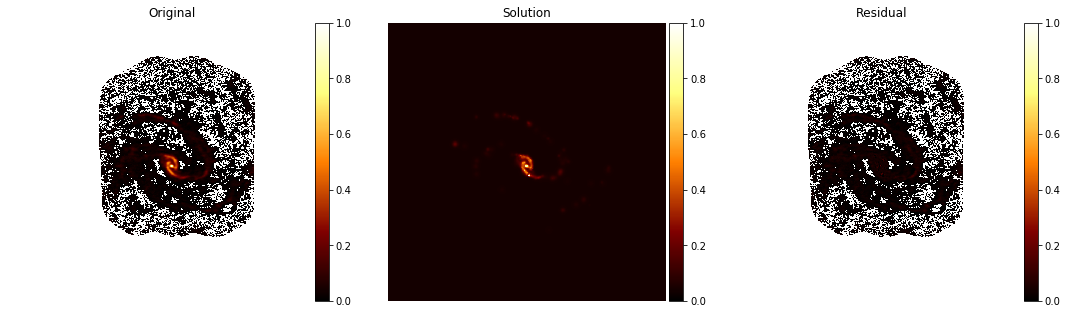

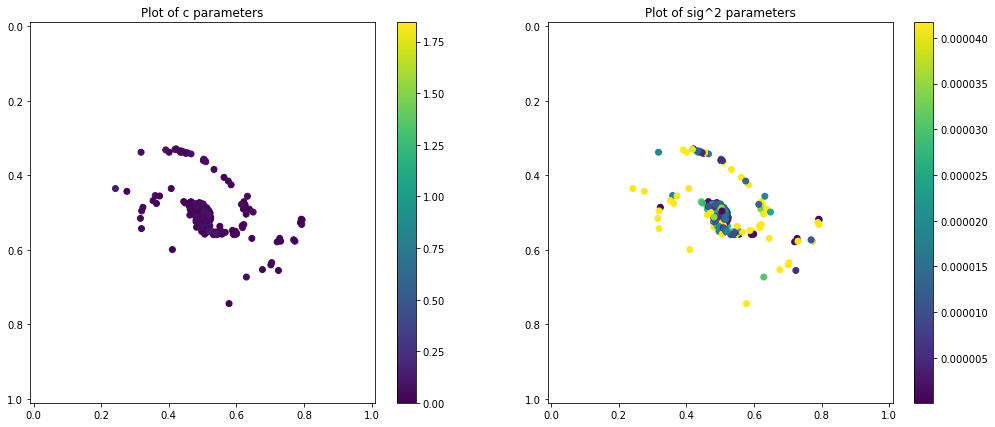

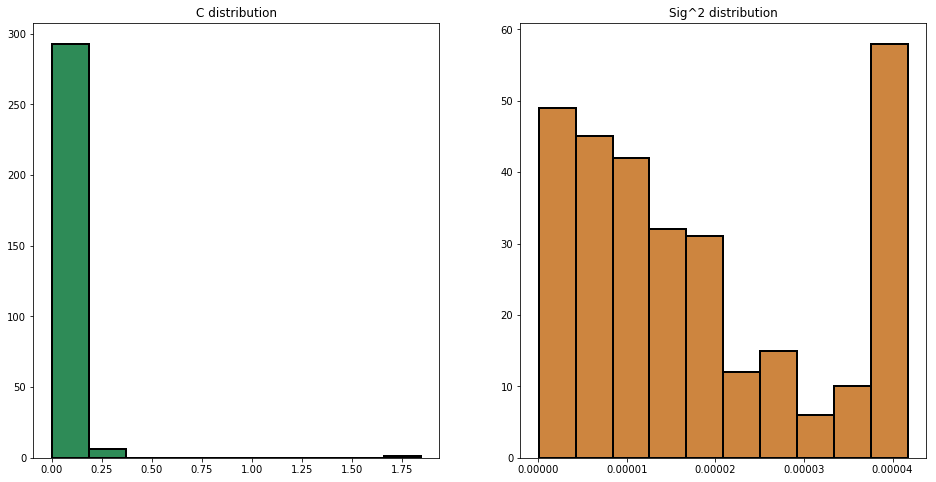

##########################################################################################
Processing example with alpha1: 0.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120116

Residual stats:
Residual RMS: 0.04347427943429846
Residual Variance: 0.0018819663934118997
Flux Lost: 0.07838107562364471
Flux Addition: 0.05055928370835528
psi1(u-f): 20.353372994741658
Exceeded Pixels: 4994
Sharpness: 15.498280560930501
psi2(grad u): 4.072841891665593
Total elapsed time: 382.91149520874023 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26625458310739614
Mean min distance between collocation and ce

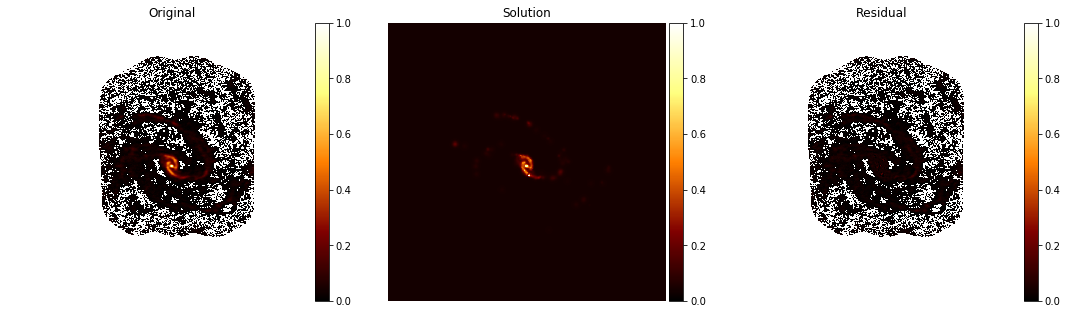

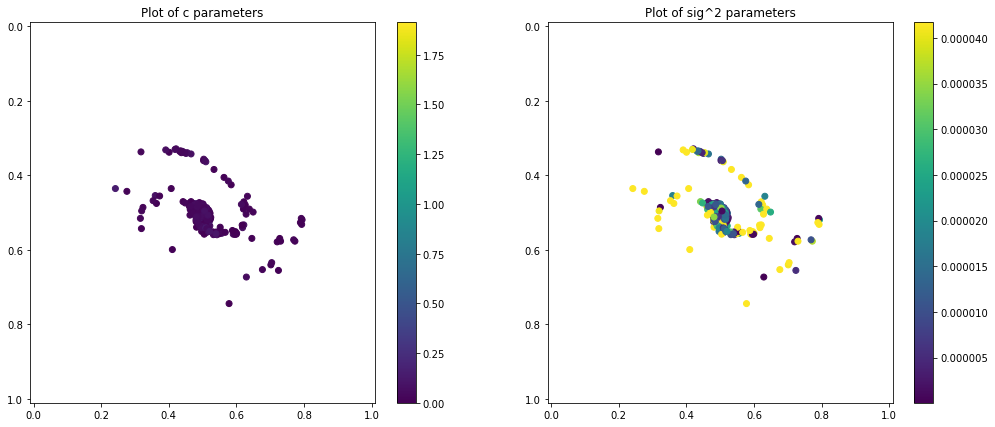

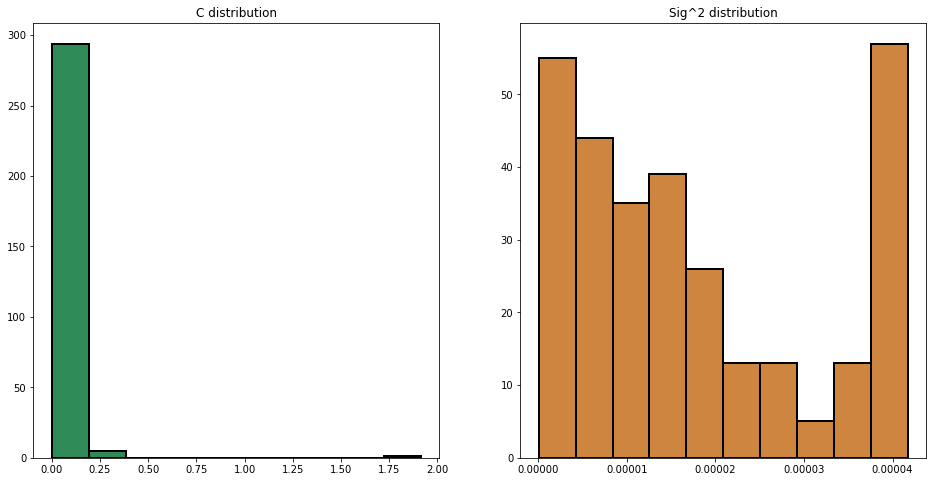

##########################################################################################
Processing example with alpha1: 1.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120109

Residual stats:
Residual RMS: 0.04458009818349339
Residual Variance: 0.0019795874803894232
Flux Lost: 0.0785585790243672
Flux Addition: 0.05117047376105202
psi1(u-f): 20.962816970638336
Exceeded Pixels: 4951
Sharpness: 15.935757148850831
psi2(grad u): 4.493211946983658
Total elapsed time: 369.39248299598694 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26618931246423244
Mean min distance between collocation and cent

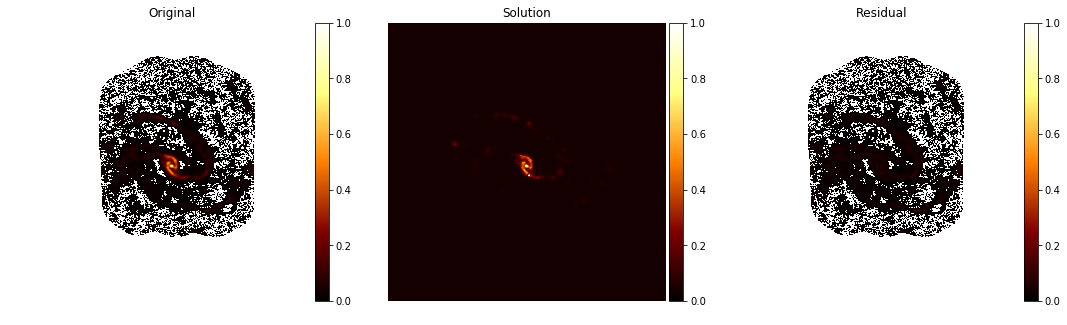

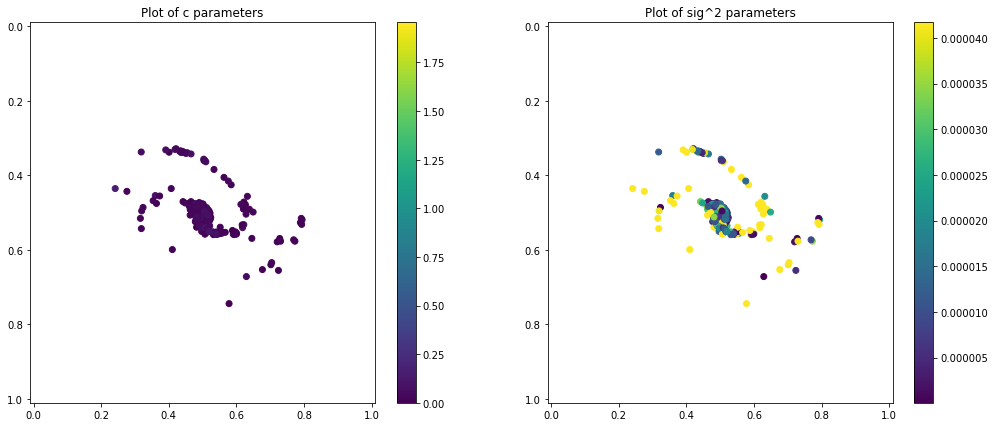

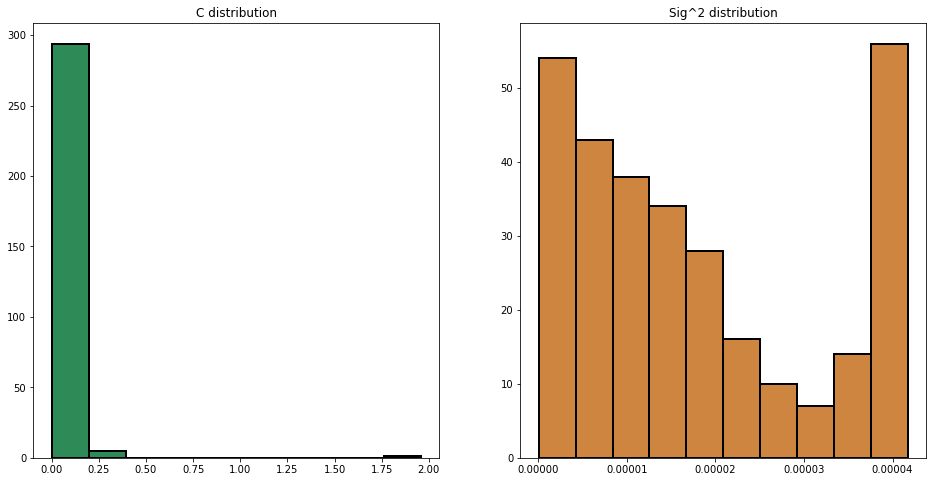

##########################################################################################
Processing example with alpha1: 1.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.04466688578944581
Residual Variance: 0.001986102945113195
Flux Lost: 0.07880574865059065
Flux Addition: 0.049336503855920935
psi1(u-f): 20.934389810941305
Exceeded Pixels: 4879
Sharpness: 16.016096091874534
psi2(grad u): 4.553224062361602
Total elapsed time: 388.170369386673 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2662172734047038
Mean min distance between collocation and cente

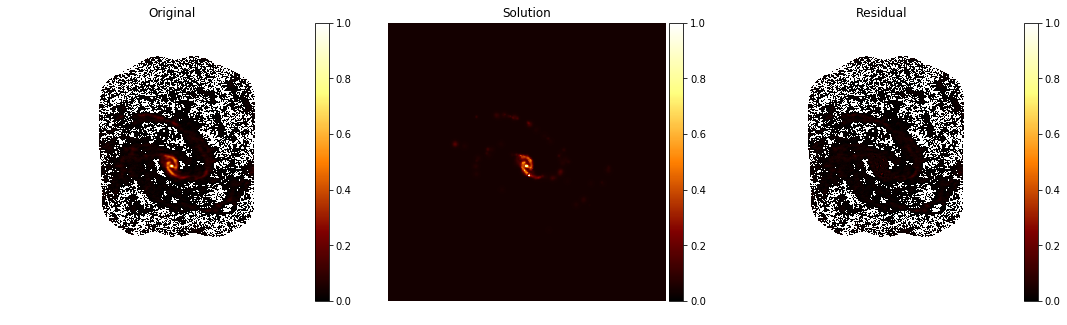

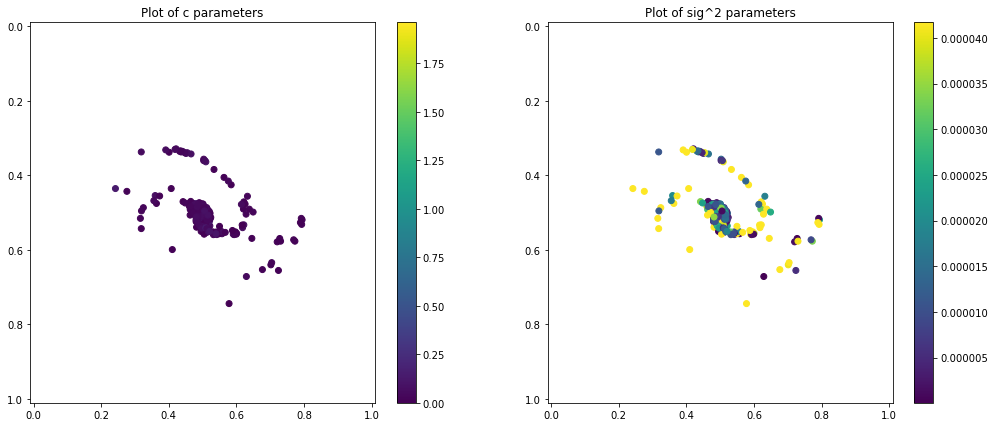

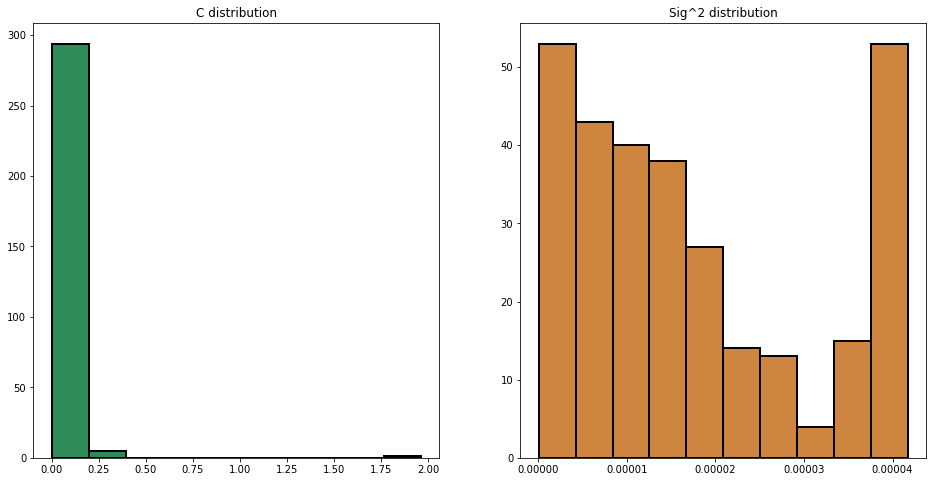

##########################################################################################
Processing example with alpha1: 1.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120116

Residual stats:
Residual RMS: 0.045200101263300874
Residual Variance: 0.0020327920519249737
Flux Lost: 0.08015933868616852
Flux Addition: 0.048747612448512334
psi1(u-f): 21.06422375353062
Exceeded Pixels: 4773
Sharpness: 16.271157323427218
psi2(grad u): 4.846129282510947
Total elapsed time: 392.1069209575653 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2660770689496974
Mean min distance between collocation and cent

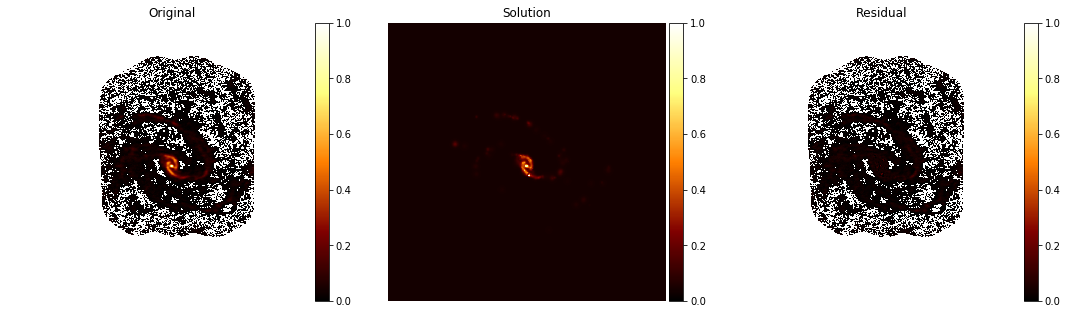

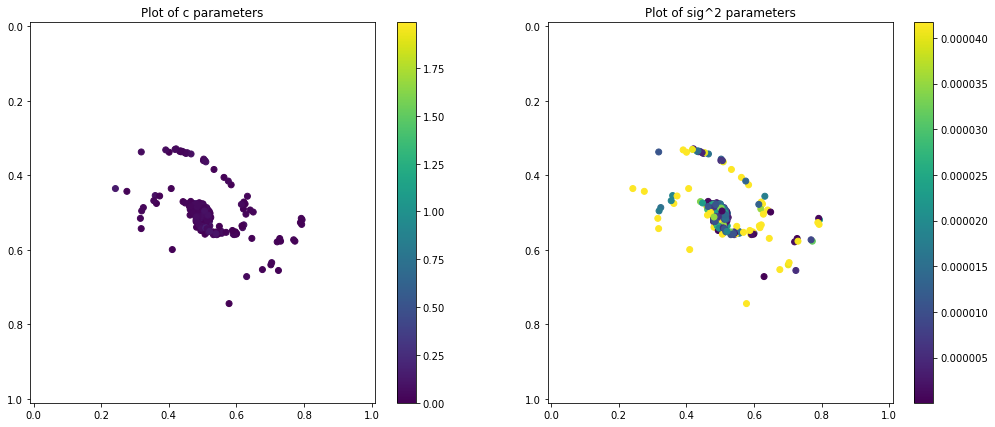

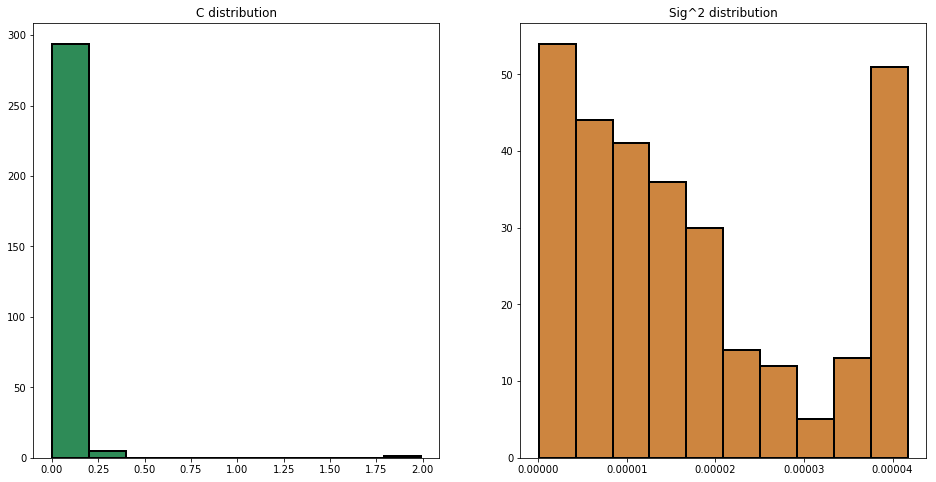

##########################################################################################
Processing example with alpha1: 1.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120108

Residual stats:
Residual RMS: 0.04585013353013504
Residual Variance: 0.002090816349200417
Flux Lost: 0.08164207091654042
Flux Addition: 0.04849981992654501
psi1(u-f): 21.307597515259282
Exceeded Pixels: 4749
Sharpness: 16.50593852691624
psi2(grad u): 5.09865164335603
Total elapsed time: 383.16370844841003 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26612182267579093
Mean min distance between collocation and cente

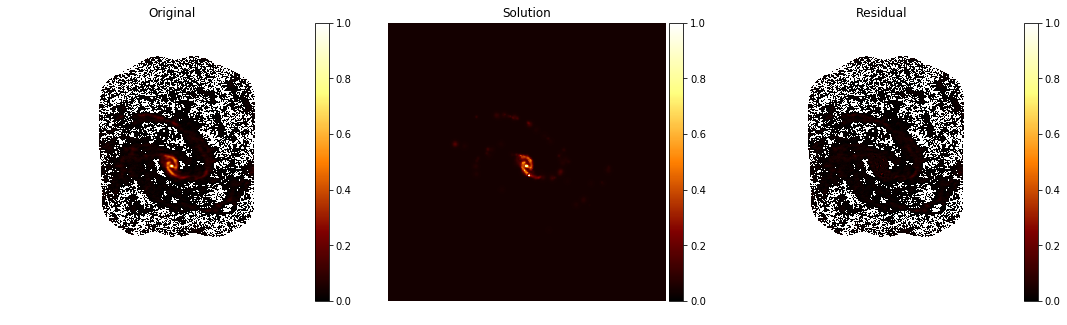

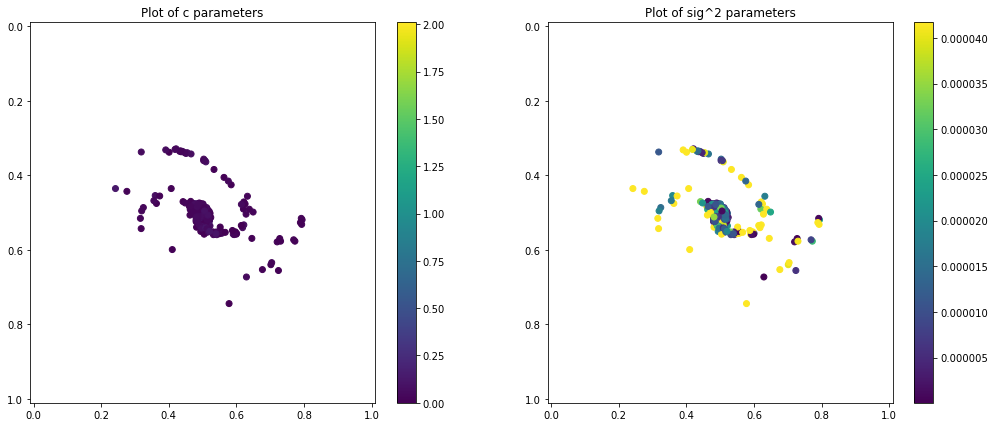

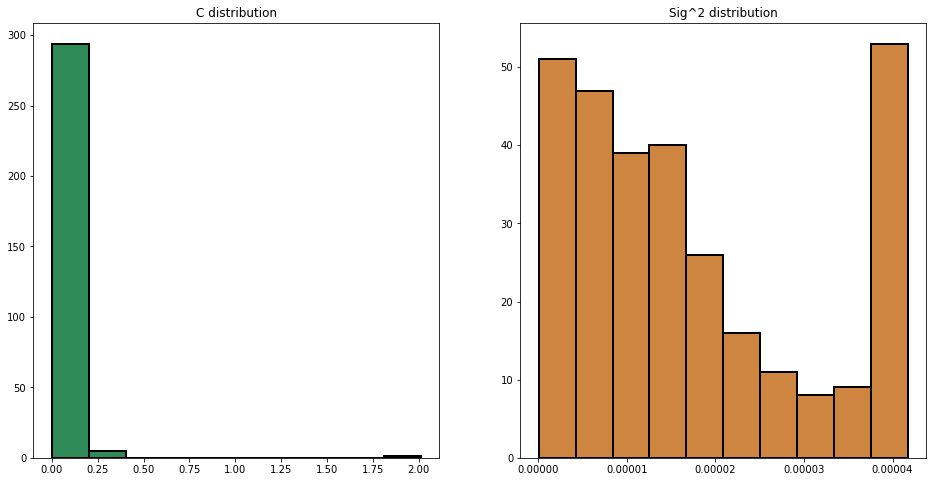

##########################################################################################
Processing example with alpha1: 2.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.02201159026844862
Residual Variance: 0.00046294465438720145
Flux Lost: 0.08057916877223614
Flux Addition: 0.03503227745494946
psi1(u-f): 5.3369060094499625
Exceeded Pixels: 4706
Sharpness: 8.041844917946147
psi2(grad u): 0.08700795697708784
Total elapsed time: 391.30494236946106 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2659759925408194
Mean min distance between collocation and ce

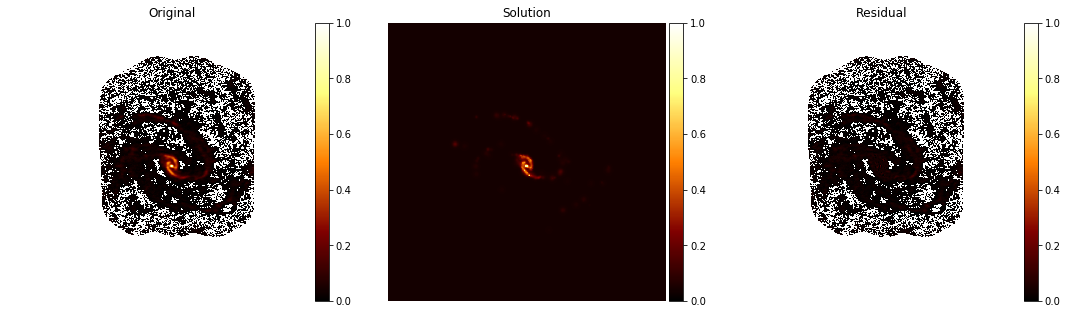

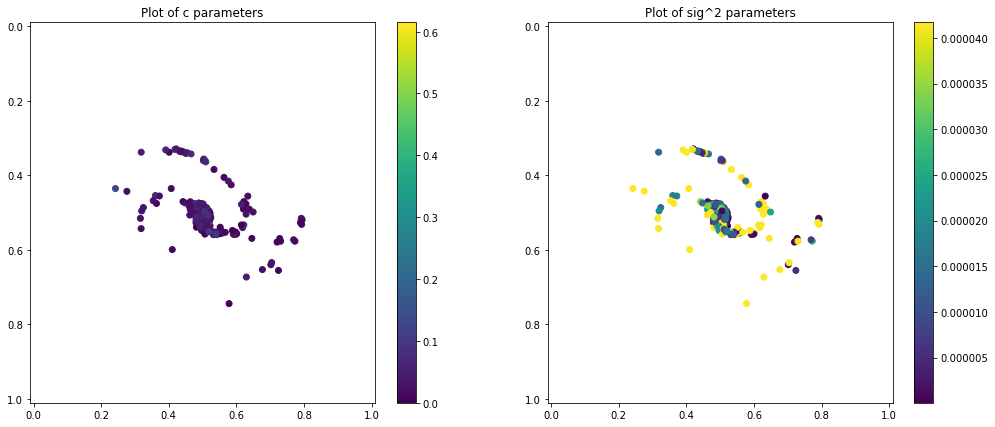

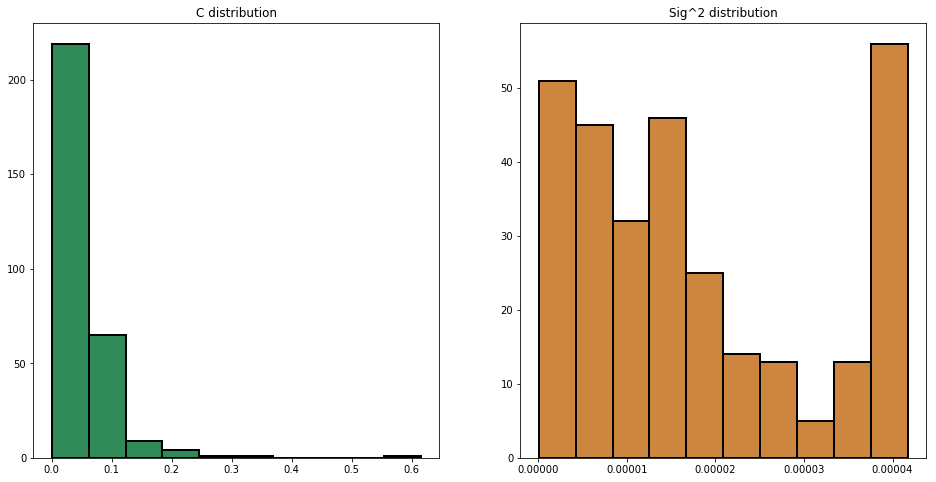

##########################################################################################
Processing example with alpha1: 2.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.02156095288729099
Residual Variance: 0.0004436420389492196
Flux Lost: 0.07940490679965845
Flux Addition: 0.0342108251716629
psi1(u-f): 4.974844452588429
Exceeded Pixels: 4694
Sharpness: 7.878570898973234
psi2(grad u): 0.07106990211957628
Total elapsed time: 373.57227420806885 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2661106639998762
Mean min distance between collocation and cent

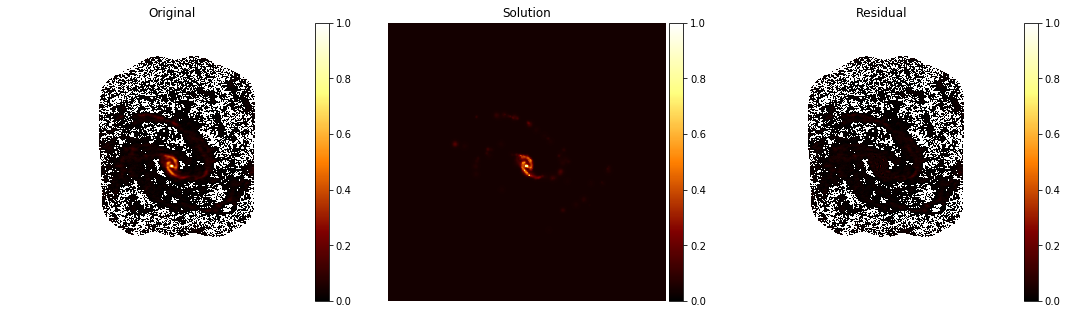

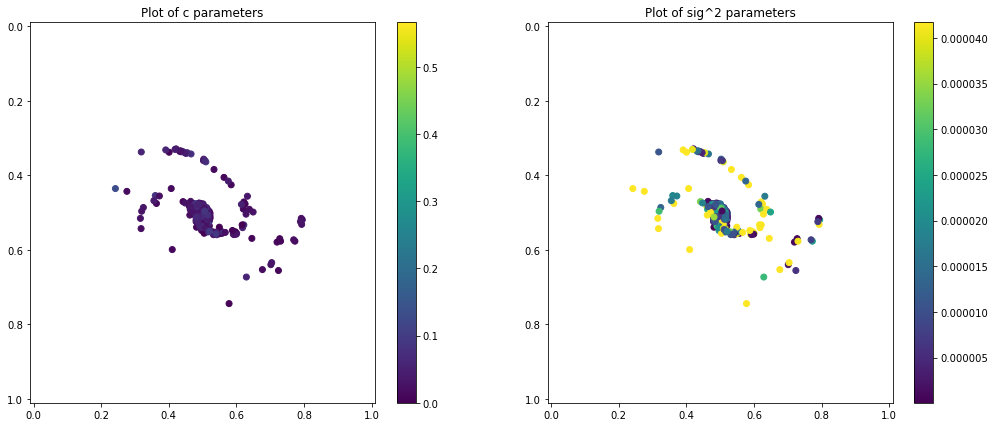

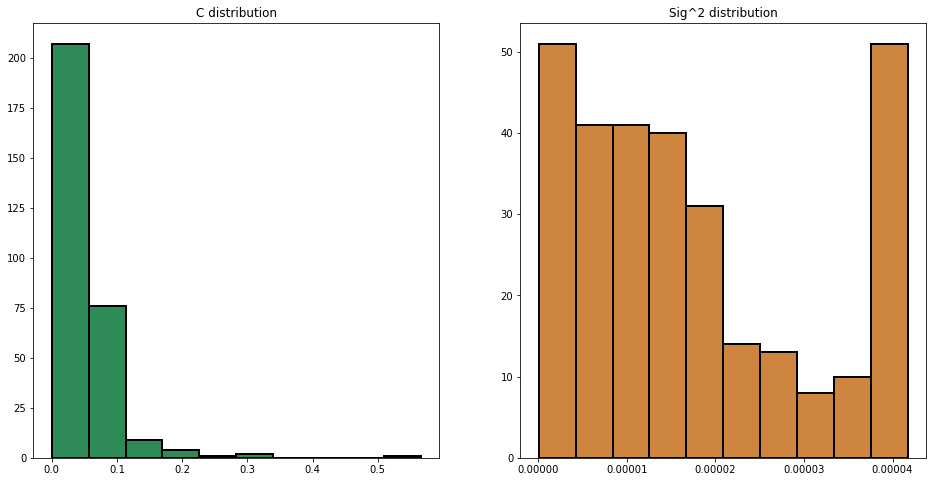

##########################################################################################
Processing example with alpha1: 2.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120109

Residual stats:
Residual RMS: 0.02205438605736963
Residual Variance: 0.00045943999534012436
Flux Lost: 0.08422011961144517
Flux Addition: 0.03329796469471554
psi1(u-f): 4.957739826566029
Exceeded Pixels: 4574
Sharpness: 7.918576843159626
psi2(grad u): 0.07644808184365355
Total elapsed time: 390.3218352794647 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2661073360095115
Mean min distance between collocation and cent

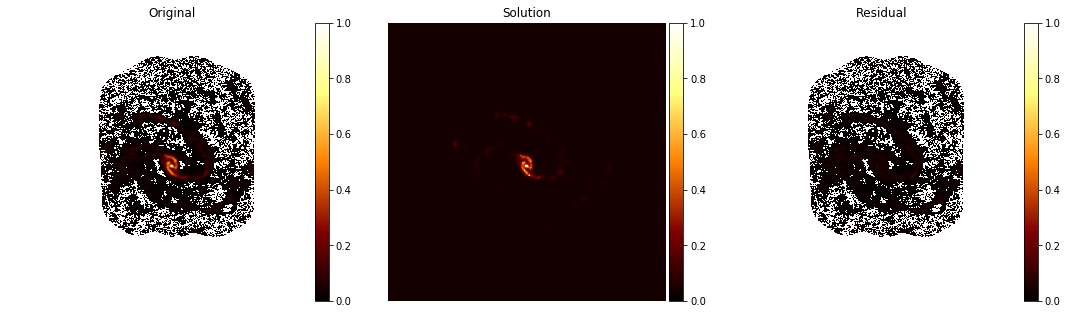

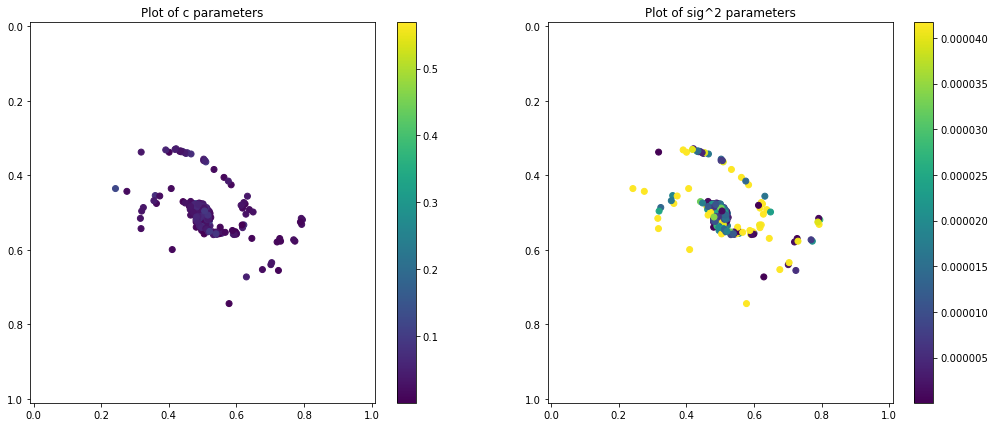

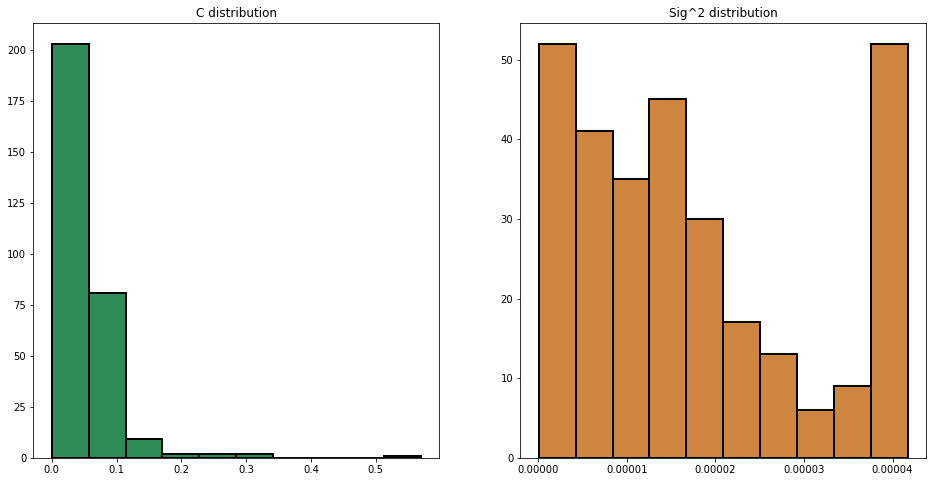

##########################################################################################
Processing example with alpha1: 2.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.022469320859585955
Residual Variance: 0.00047883551347718383
Flux Lost: 0.08365310347142747
Flux Addition: 0.03360851326309461
psi1(u-f): 5.382104430334123
Exceeded Pixels: 4591
Sharpness: 8.004624722145662
psi2(grad u): 0.09614417518009169
Total elapsed time: 389.18806314468384 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26600924600695264
Mean min distance between collocation and 

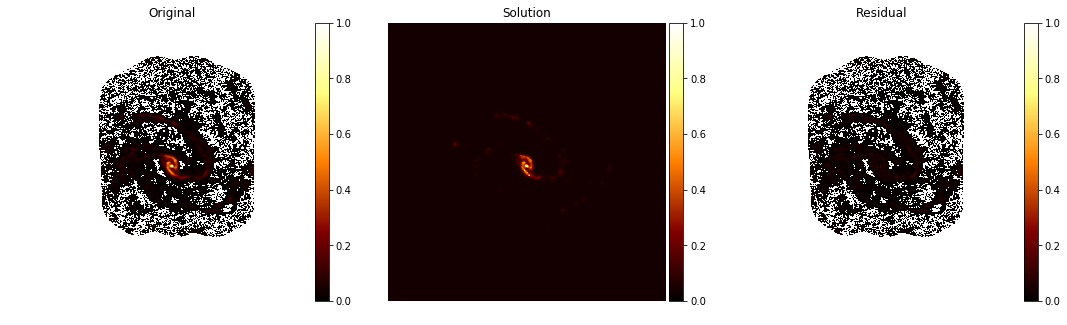

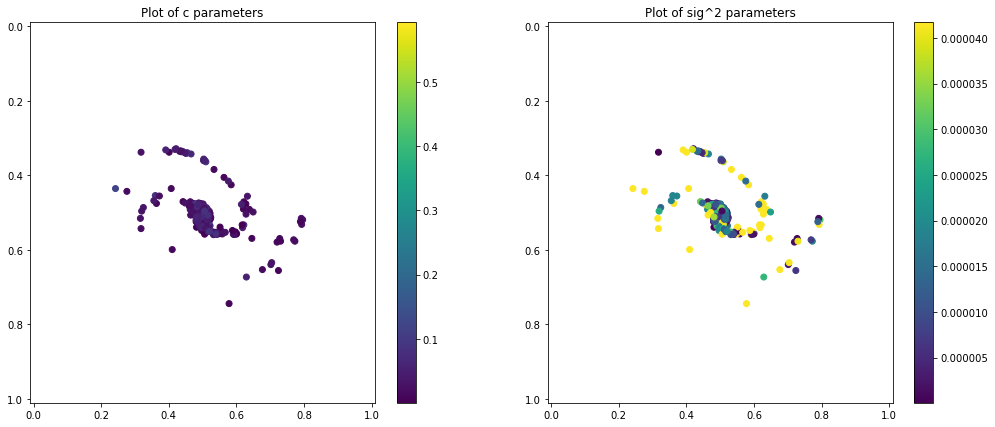

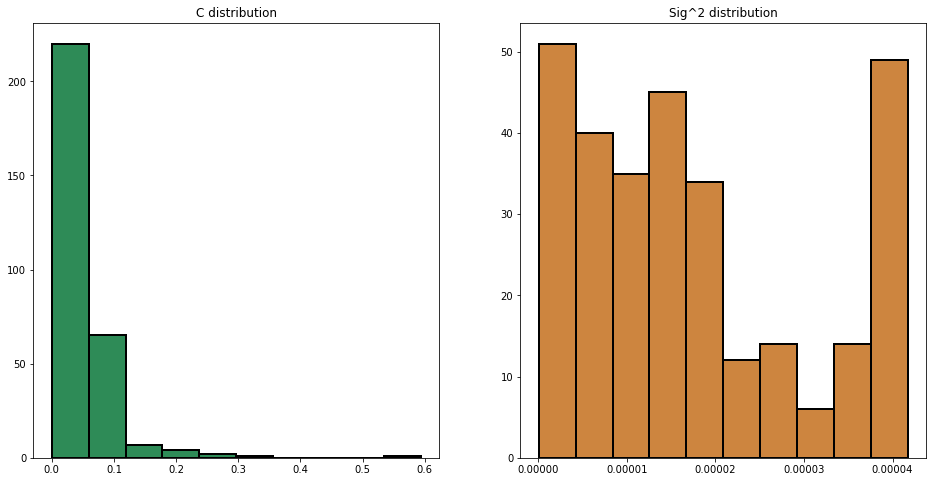

##########################################################################################
Processing example with alpha1: 3.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120116

Residual stats:
Residual RMS: 0.021685547568696416
Residual Variance: 0.0004466910610026868
Flux Lost: 0.08030959551538719
Flux Addition: 0.032690968492376765
psi1(u-f): 5.0576211719403386
Exceeded Pixels: 4566
Sharpness: 7.918188317726931
psi2(grad u): 0.08064759628095157
Total elapsed time: 397.93340516090393 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26602653558141326
Mean min distance between collocation and 

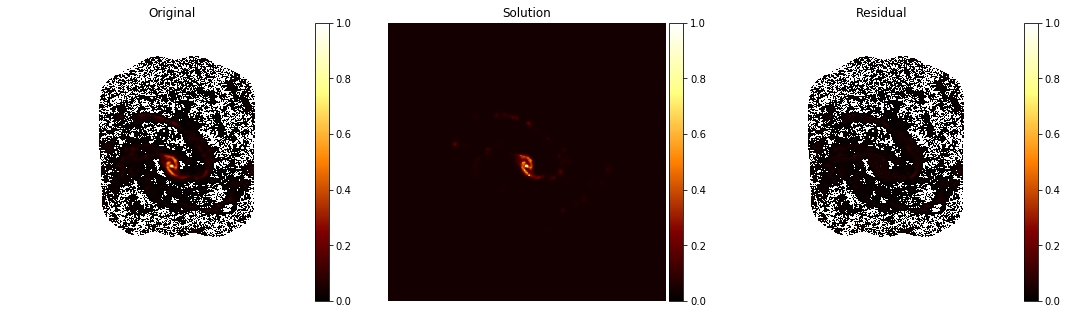

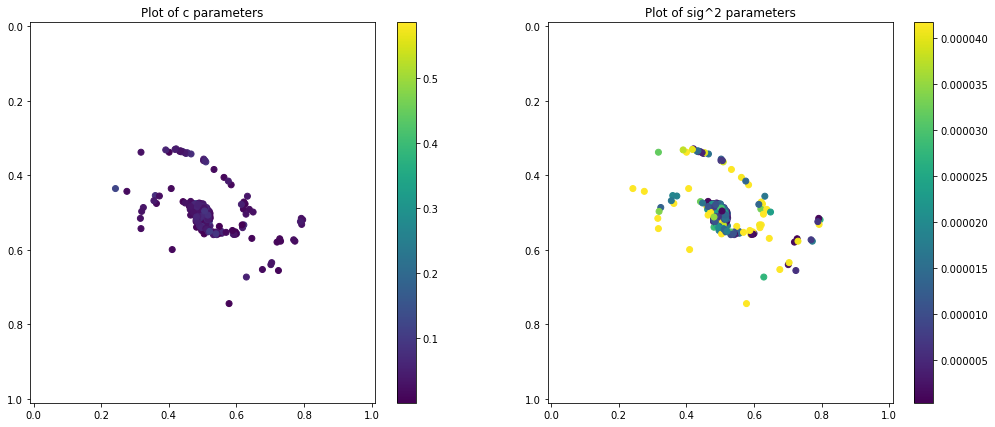

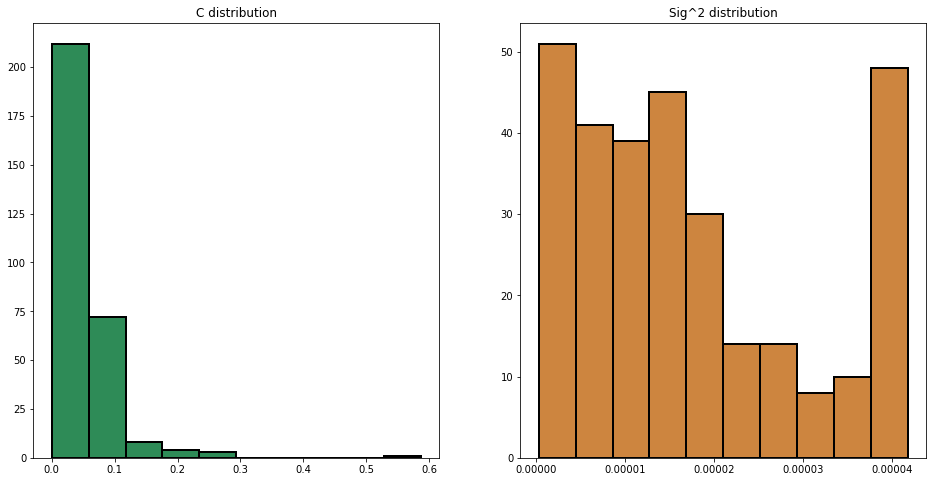

##########################################################################################
Processing example with alpha1: 3.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.022074711971555357
Residual Variance: 0.0004611016317164785
Flux Lost: 0.08303184484747657
Flux Addition: 0.03283715250502254
psi1(u-f): 5.118591583754468
Exceeded Pixels: 4451
Sharpness: 8.044702481212964
psi2(grad u): 0.08222248208868153
Total elapsed time: 391.976389169693 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26613850658954574
Mean min distance between collocation and cen

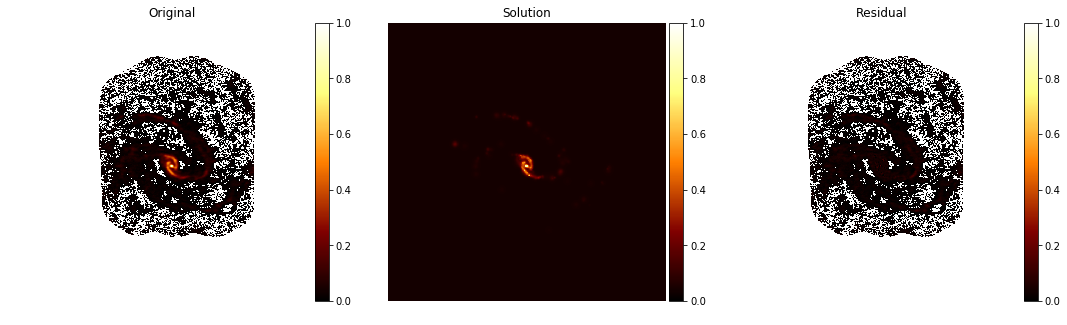

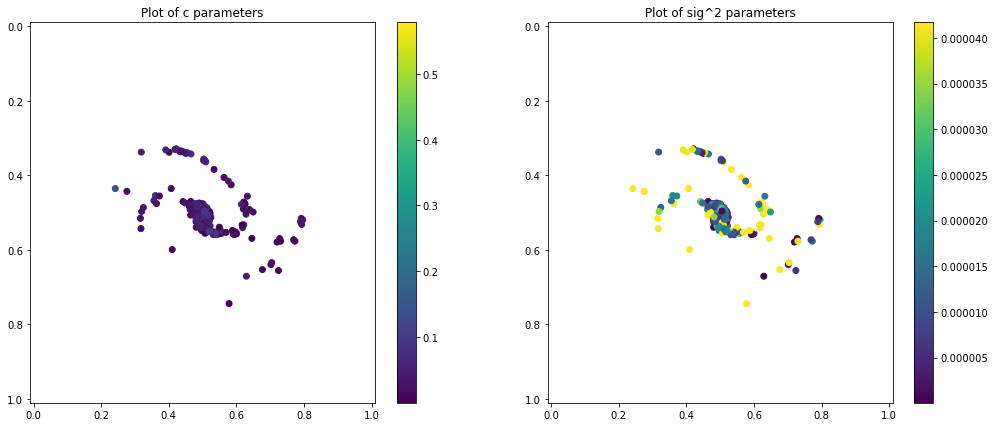

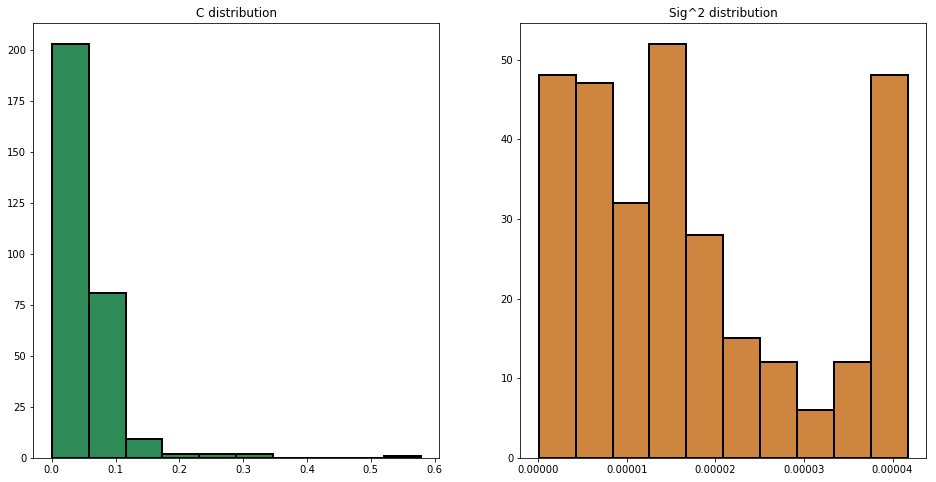

##########################################################################################
Processing example with alpha1: 3.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120108

Residual stats:
Residual RMS: 0.022200173501413917
Residual Variance: 0.0004614832467278554
Flux Lost: 0.08687526319777875
Flux Addition: 0.03194668653442156
psi1(u-f): 4.924401805552241
Exceeded Pixels: 4386
Sharpness: 7.8900470139360745
psi2(grad u): 0.0726207100412639
Total elapsed time: 401.4381835460663 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26606574802626237
Mean min distance between collocation and cen

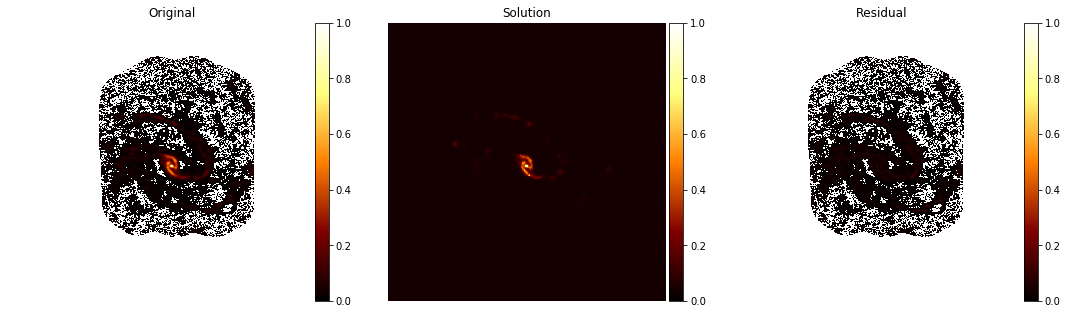

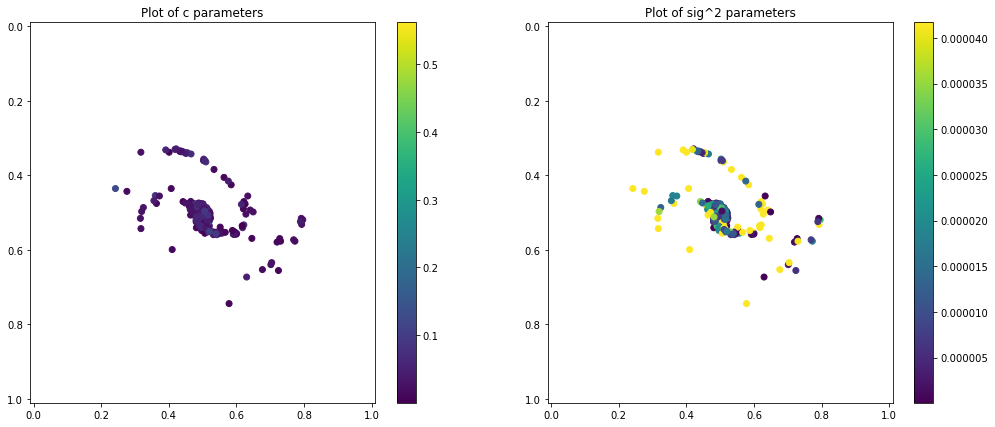

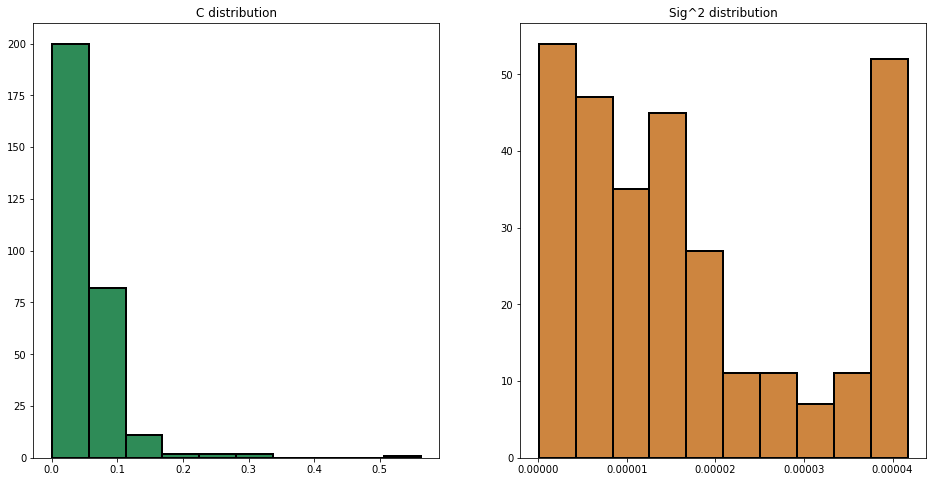

##########################################################################################
Processing example with alpha1: 3.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.02225896331728397
Residual Variance: 0.0004648042541871769
Flux Lost: 0.08653258754120646
Flux Addition: 0.03222685704553334
psi1(u-f): 5.07972653983952
Exceeded Pixels: 4380
Sharpness: 7.956140946265525
psi2(grad u): 0.07959491130584027
Total elapsed time: 388.71700620651245 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26605273344389246
Mean min distance between collocation and cen

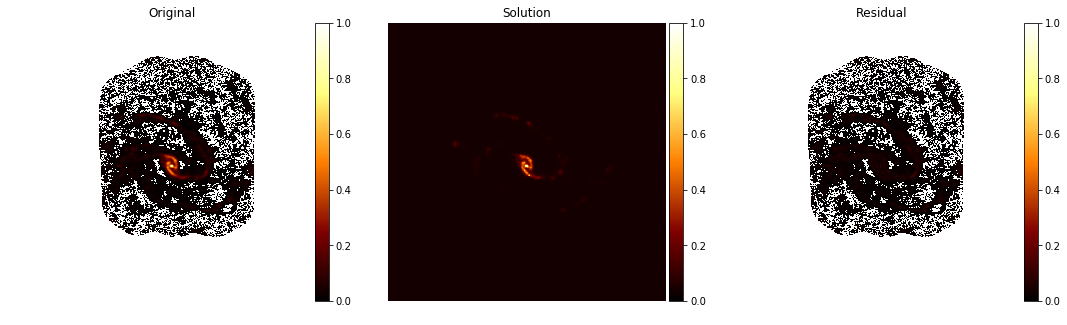

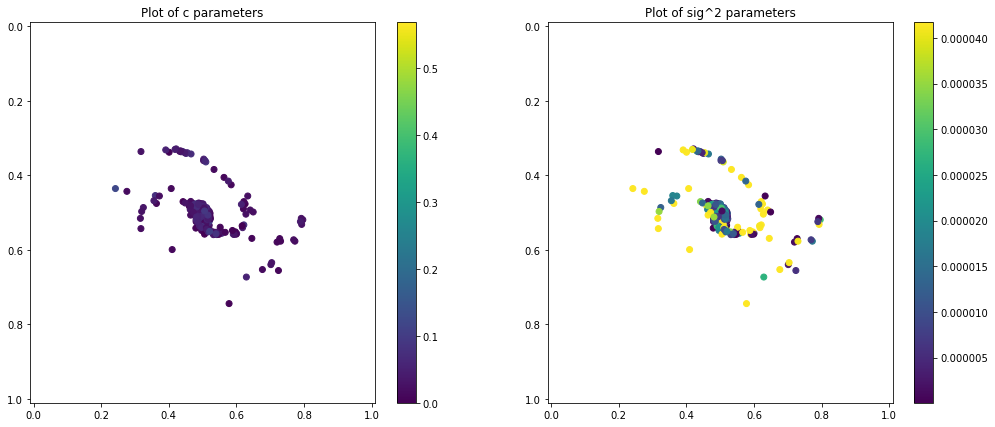

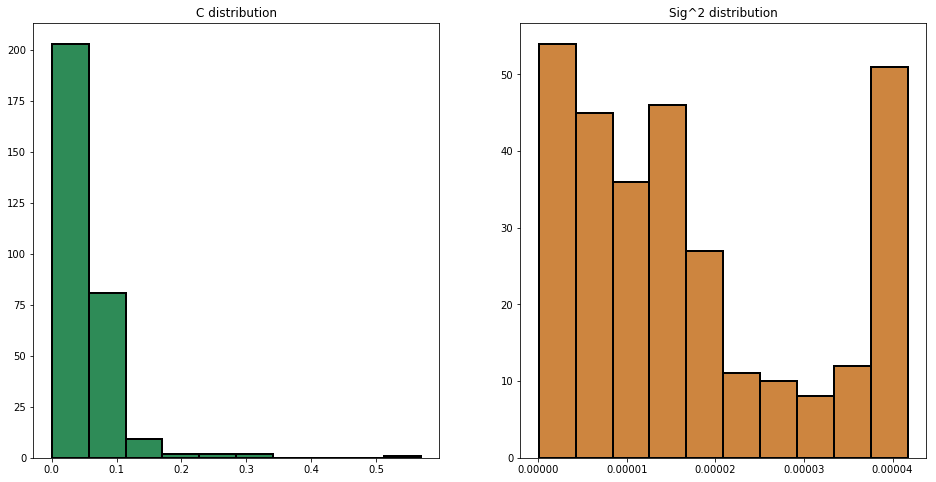

##########################################################################################
Processing example with alpha1: 4.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.022649925156812908
Residual Variance: 0.0004841524634752162
Flux Lost: 0.08526798315561063
Flux Addition: 0.03257198627262876
psi1(u-f): 5.48323019313018
Exceeded Pixels: 4360
Sharpness: 8.157008646886762
psi2(grad u): 0.09786414376445343
Total elapsed time: 385.3359684944153 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.266104824044616
Mean min distance between collocation and center

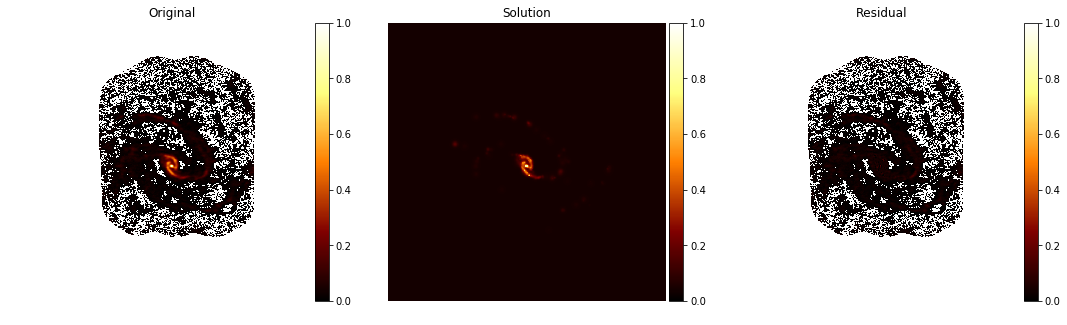

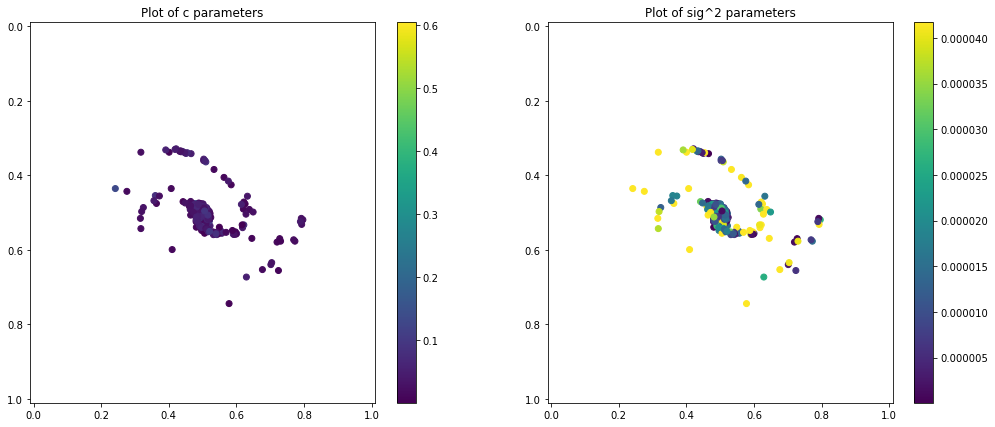

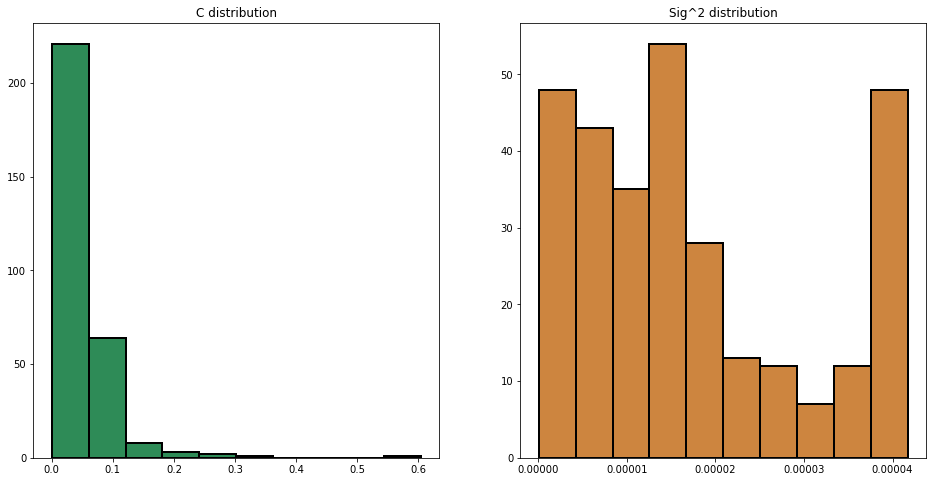

##########################################################################################
Processing example with alpha1: 4.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.022670638003111004
Residual Variance: 0.00048453495920079394
Flux Lost: 0.08558941725243653
Flux Addition: 0.03238815160183046
psi1(u-f): 5.490936546783578
Exceeded Pixels: 4315
Sharpness: 8.16568296077892
psi2(grad u): 0.09714330579310958
Total elapsed time: 367.3195610046387 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26610317149765705
Mean min distance between collocation and ce

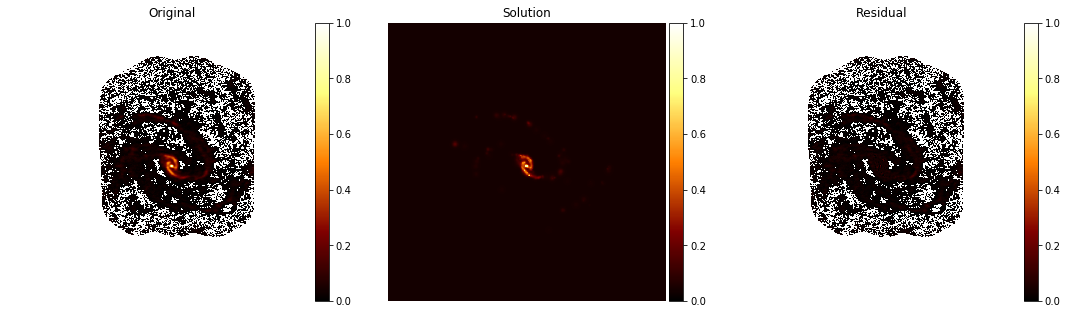

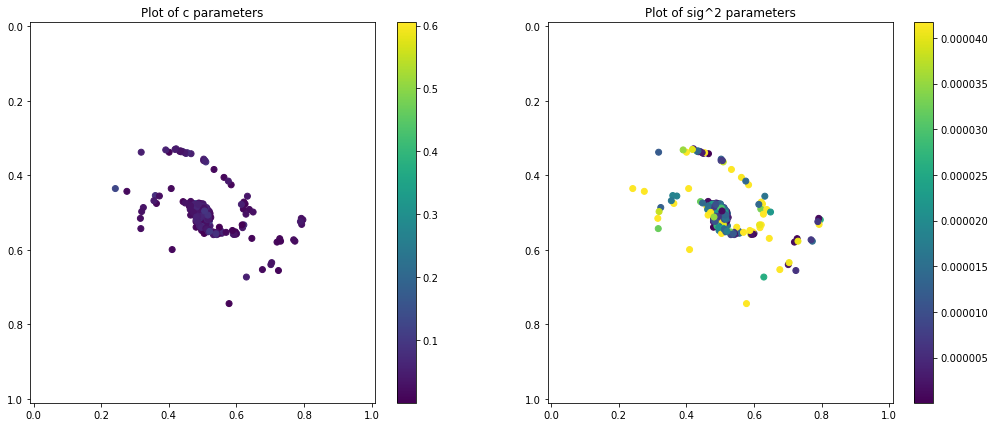

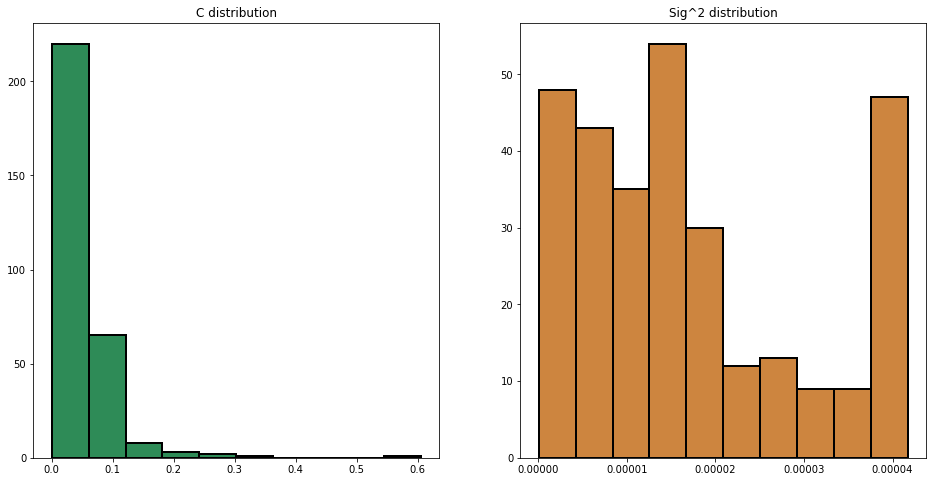

##########################################################################################
Processing example with alpha1: 4.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.022656554481421055
Residual Variance: 0.0004823315852656441
Flux Lost: 0.08669129828970516
Flux Addition: 0.03209347064602967
psi1(u-f): 5.384003315996151
Exceeded Pixels: 4275
Sharpness: 8.123780575560257
psi2(grad u): 0.09056175468770068
Total elapsed time: 344.8490445613861 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26610503167083605
Mean min distance between collocation and cen

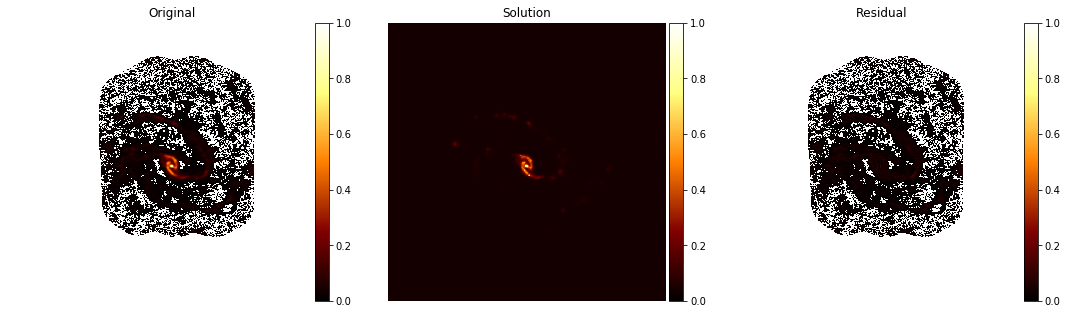

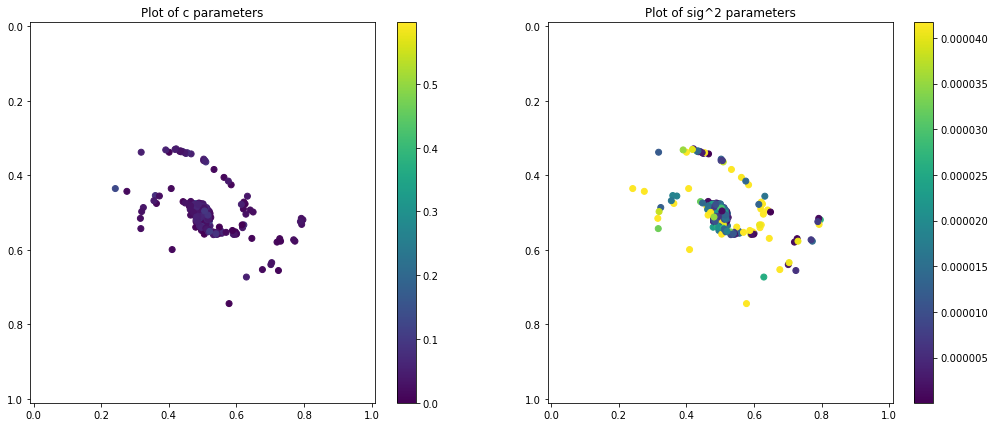

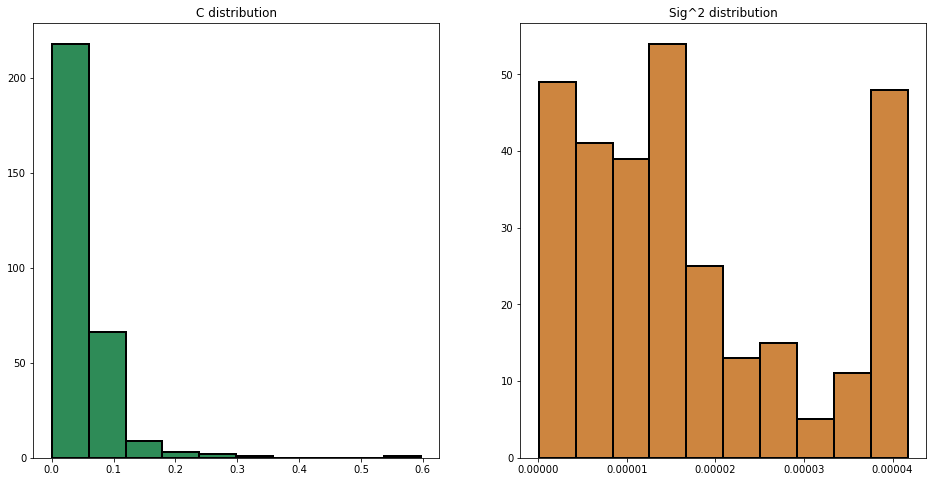

##########################################################################################
Processing example with alpha1: 4.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120109

Residual stats:
Residual RMS: 0.022646924752520826
Residual Variance: 0.0004809889642819234
Flux Lost: 0.08723173460016397
Flux Addition: 0.03184119889185258
psi1(u-f): 5.338063089317718
Exceeded Pixels: 4247
Sharpness: 8.128827819636282
psi2(grad u): 0.0898219593546027
Total elapsed time: 338.3360900878906 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26611292222826244
Mean min distance between collocation and cen

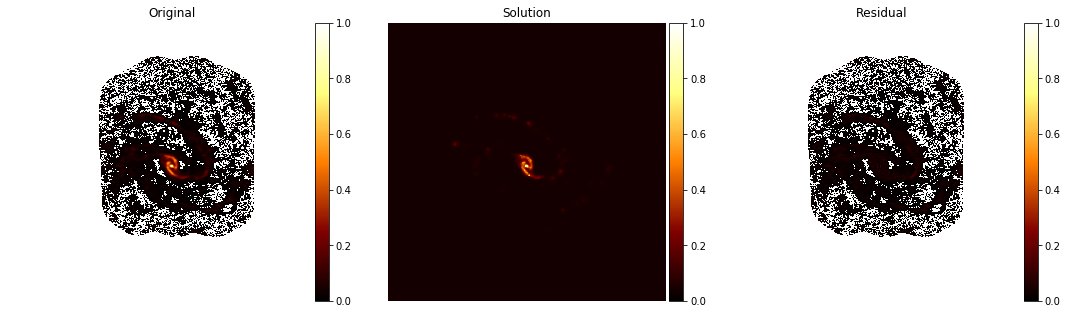

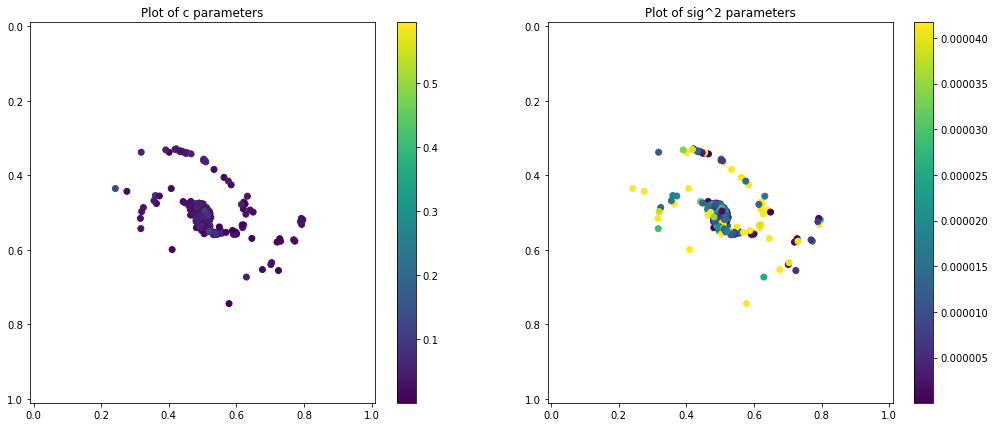

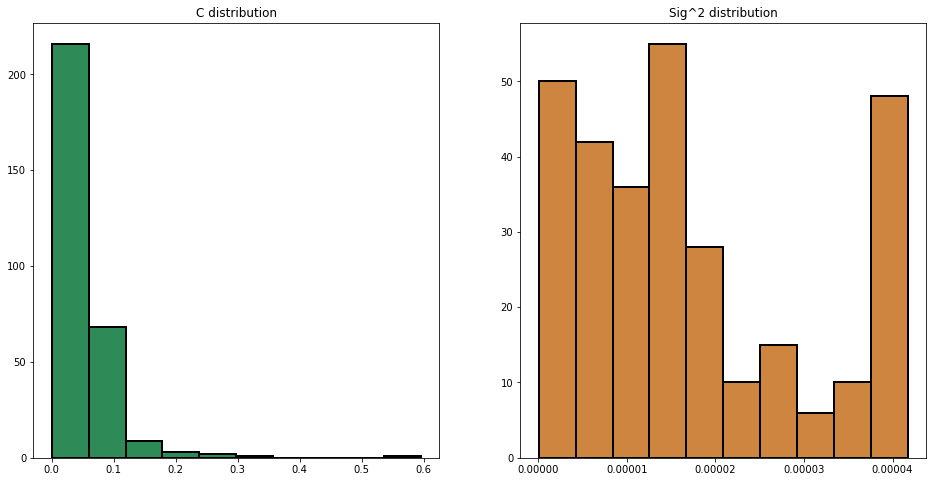

##########################################################################################
Processing example with alpha1: 5.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.022915405808751788
Residual Variance: 0.0004925019873316609
Flux Lost: 0.08768566003953487
Flux Addition: 0.03167374745271503
psi1(u-f): 5.575950074142839
Exceeded Pixels: 4209
Sharpness: 8.190961948523368
psi2(grad u): 0.10137165956952789
Total elapsed time: 332.7857015132904 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26613057703359394
Mean min distance between collocation and cen

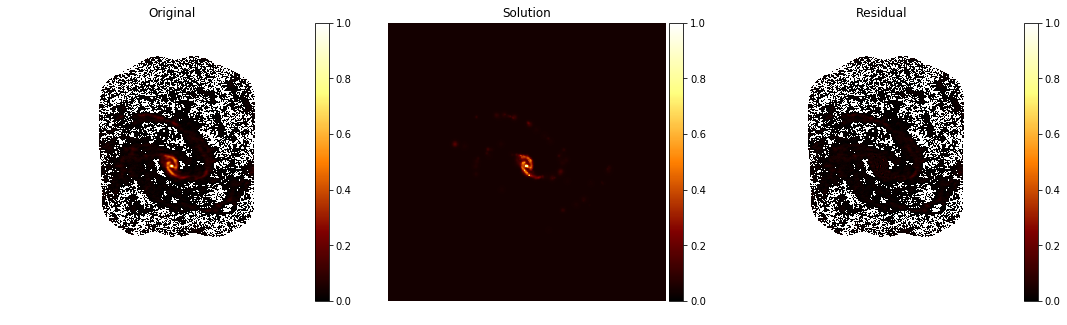

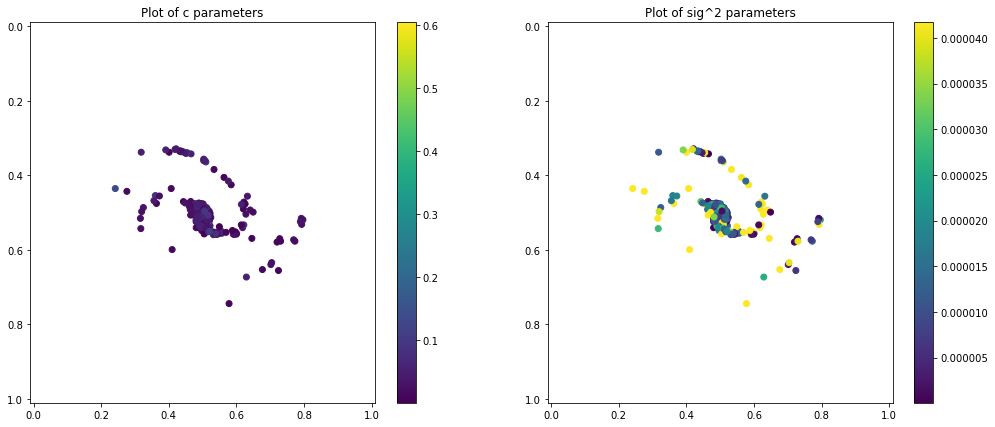

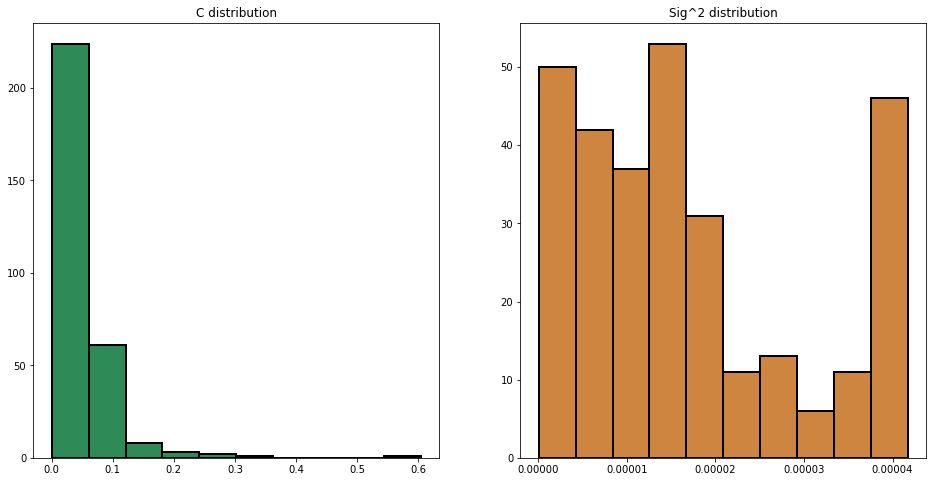

##########################################################################################
Processing example with alpha1: 5.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120109

Residual stats:
Residual RMS: 0.022950627701917276
Residual Variance: 0.0004937658785388179
Flux Lost: 0.08814359522512986
Flux Addition: 0.03183057047539064
psi1(u-f): 5.54745959653063
Exceeded Pixels: 4193
Sharpness: 8.182517336900574
psi2(grad u): 0.09521542040078729
Total elapsed time: 333.1279501914978 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26612724721269443
Mean min distance between collocation and cen

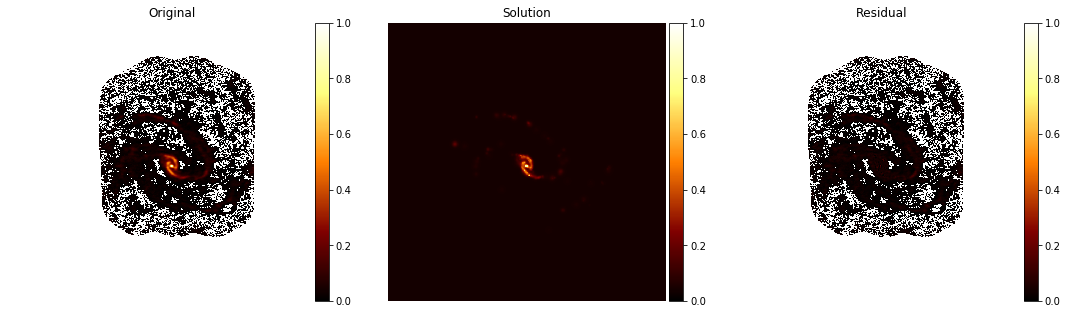

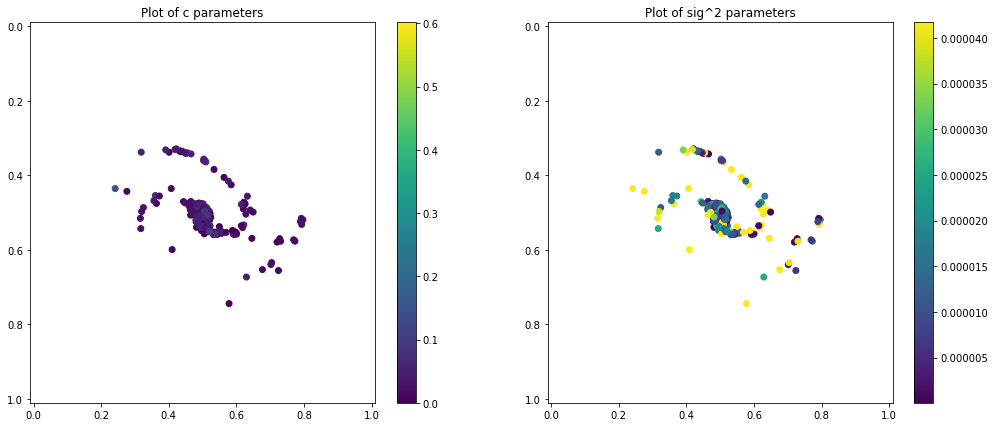

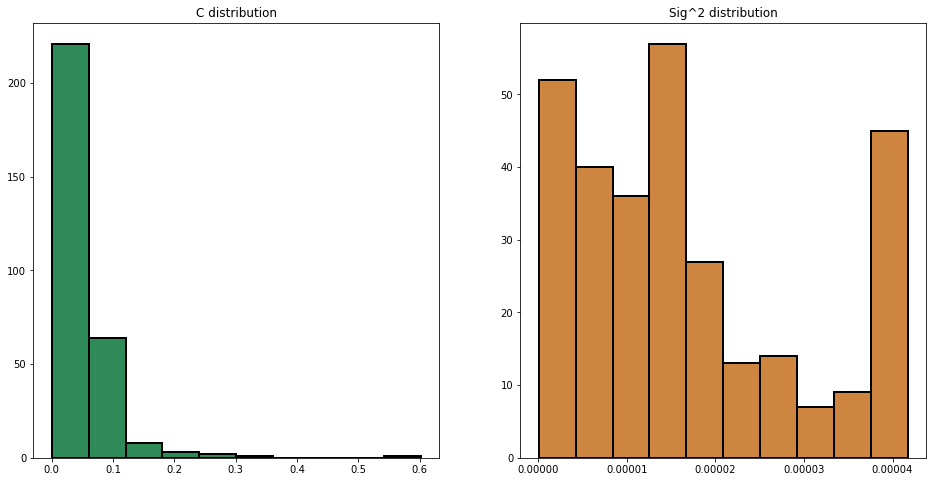

##########################################################################################
Processing example with alpha1: 5.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.022959697965496472
Residual Variance: 0.0004928313518580648
Flux Lost: 0.0889039438350611
Flux Addition: 0.03144863185826917
psi1(u-f): 5.496515663866773
Exceeded Pixels: 4160
Sharpness: 8.182764880919237
psi2(grad u): 0.09266081645387789
Total elapsed time: 346.7847201824188 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2661006463606887
Mean min distance between collocation and cente

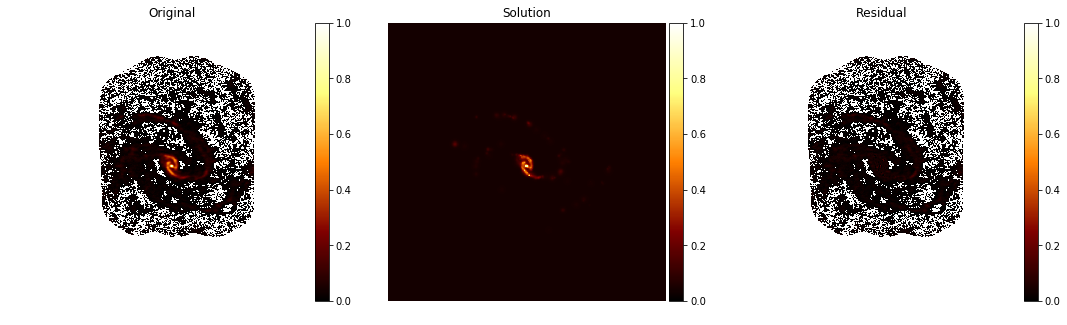

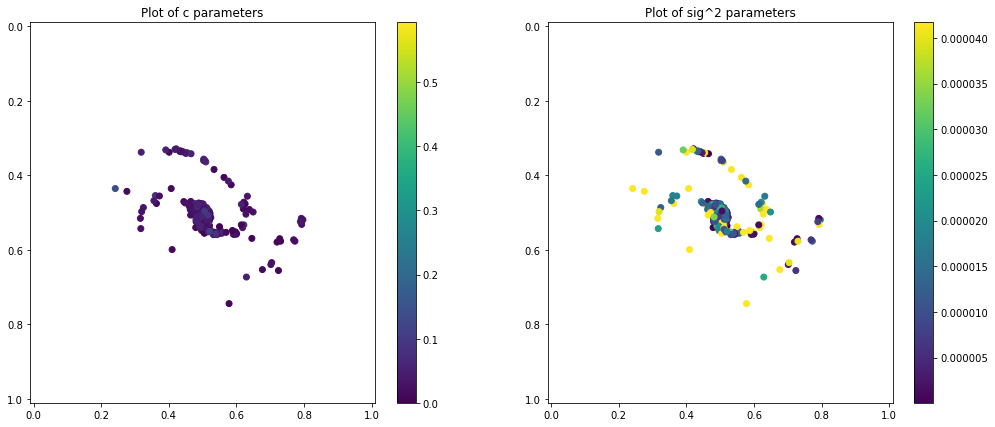

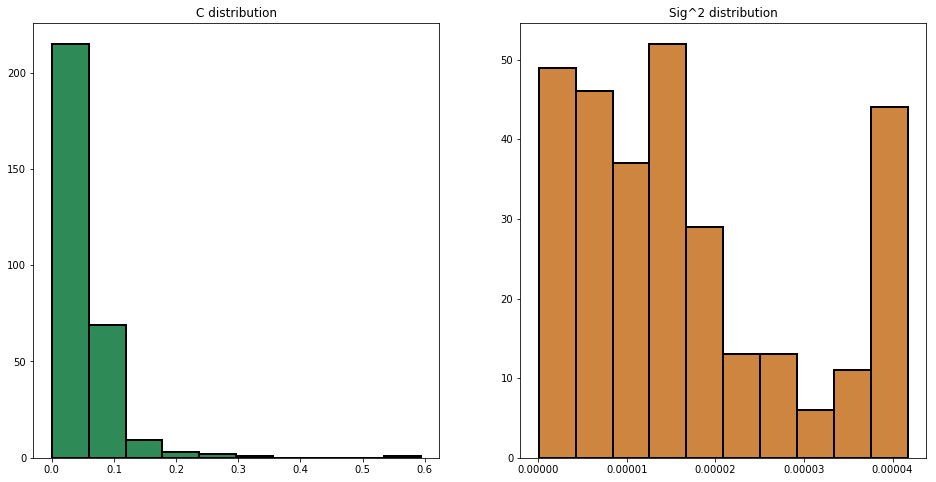

##########################################################################################
Processing example with alpha1: 5.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.022932345986399396
Residual Variance: 0.0004893050338041268
Flux Lost: 0.09009607475491711
Flux Addition: 0.03077000435656428
psi1(u-f): 5.403762394991497
Exceeded Pixels: 4134
Sharpness: 8.174969326287851
psi2(grad u): 0.09328769112784689
Total elapsed time: 338.60858035087585 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26615982693743434
Mean min distance between collocation and c

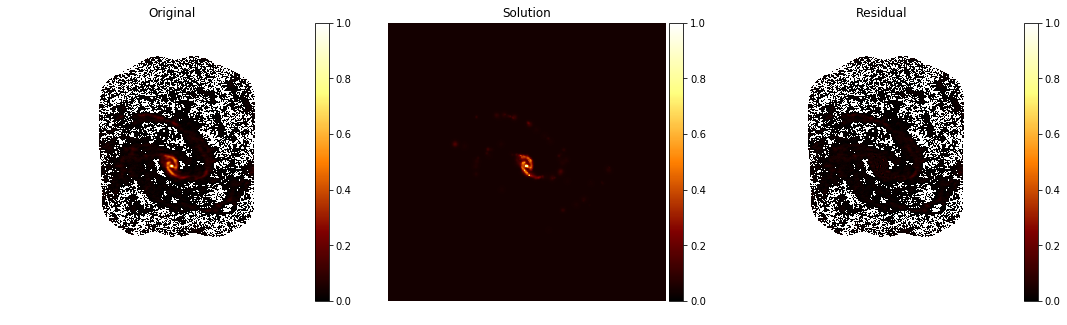

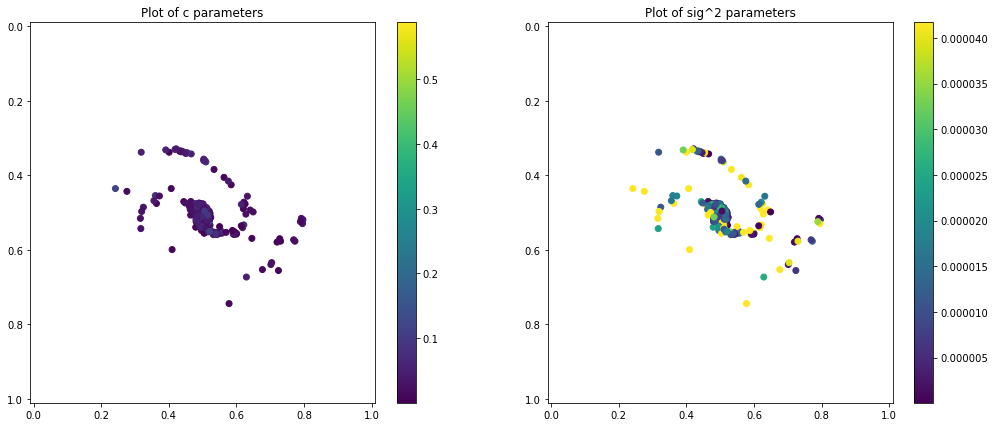

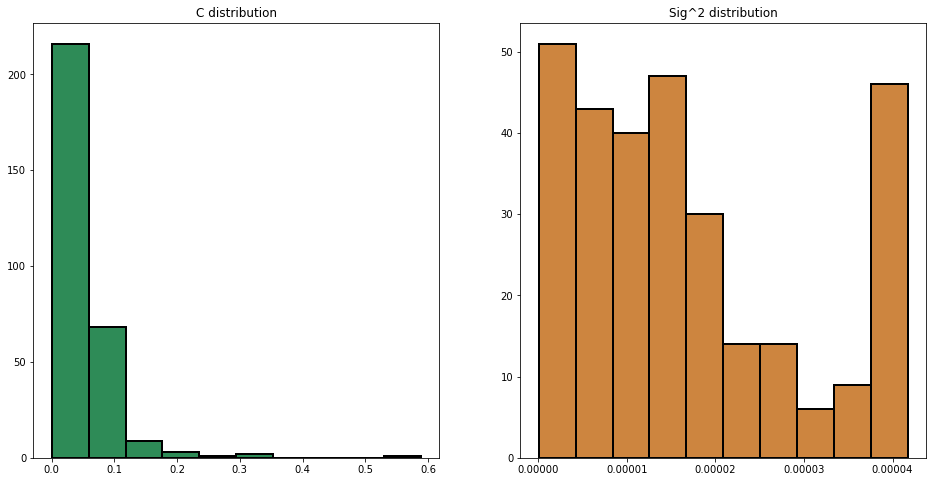

##########################################################################################
Processing example with alpha1: 6.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120109

Residual stats:
Residual RMS: 0.022909606730526628
Residual Variance: 0.00048757985996619973
Flux Lost: 0.09050302115123839
Flux Addition: 0.03062596473167284
psi1(u-f): 5.3383862902707735
Exceeded Pixels: 4105
Sharpness: 8.15595555058985
psi2(grad u): 0.0906380102624642
Total elapsed time: 335.7708568572998 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26614009141394895
Mean min distance between collocation and cen

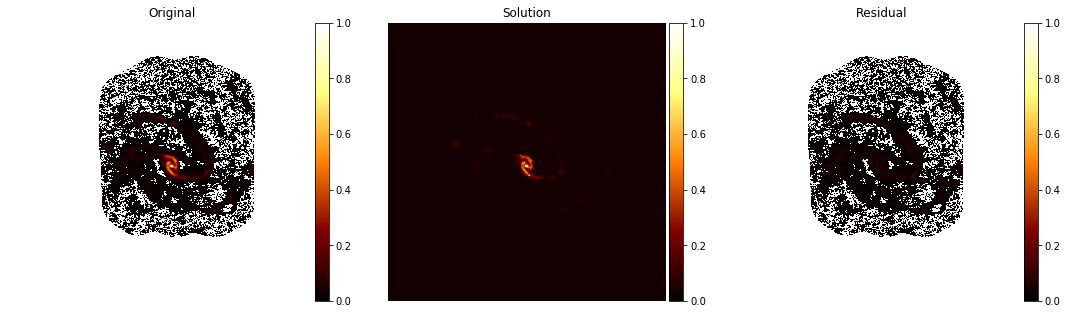

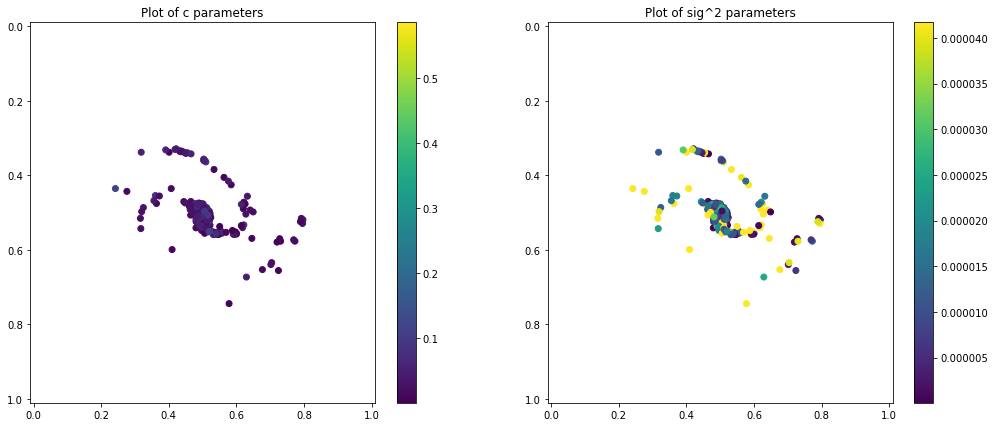

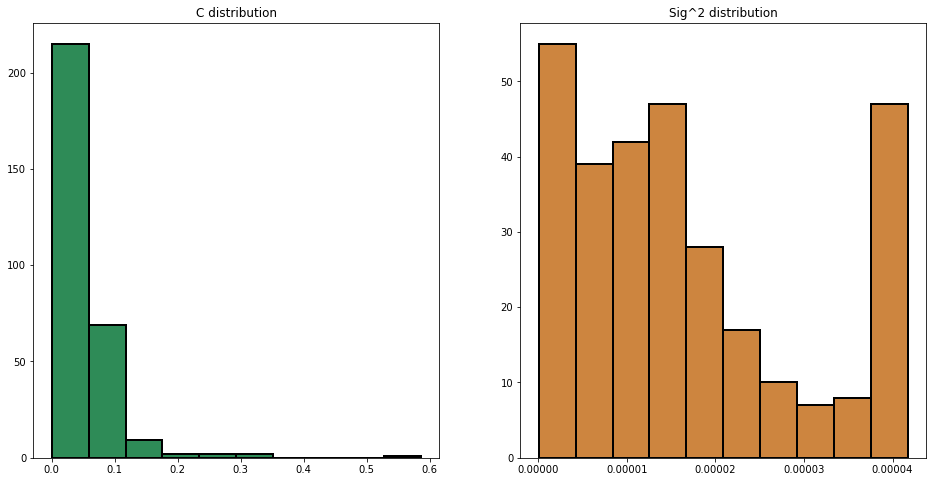

##########################################################################################
Processing example with alpha1: 6.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.023004168093607173
Residual Variance: 0.0004932438729776137
Flux Lost: 0.08986217944377682
Flux Addition: 0.031056931931998797
psi1(u-f): 5.437675081154322
Exceeded Pixels: 4104
Sharpness: 8.186420326660166
psi2(grad u): 0.09175216724592987
Total elapsed time: 343.17861461639404 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26612094649758794
Mean min distance between collocation and 

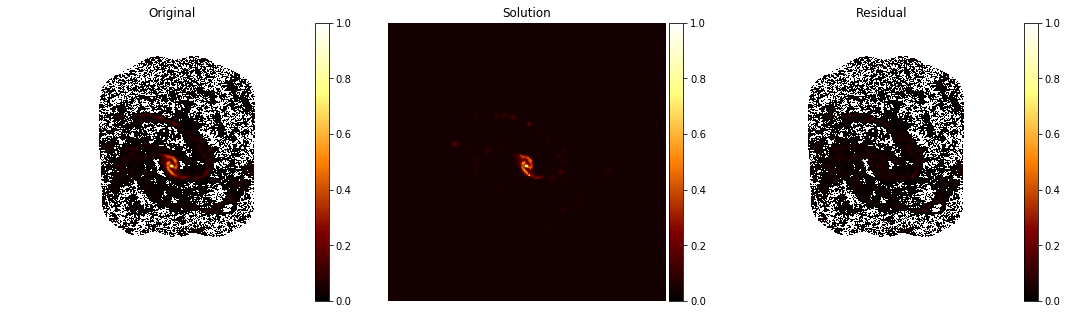

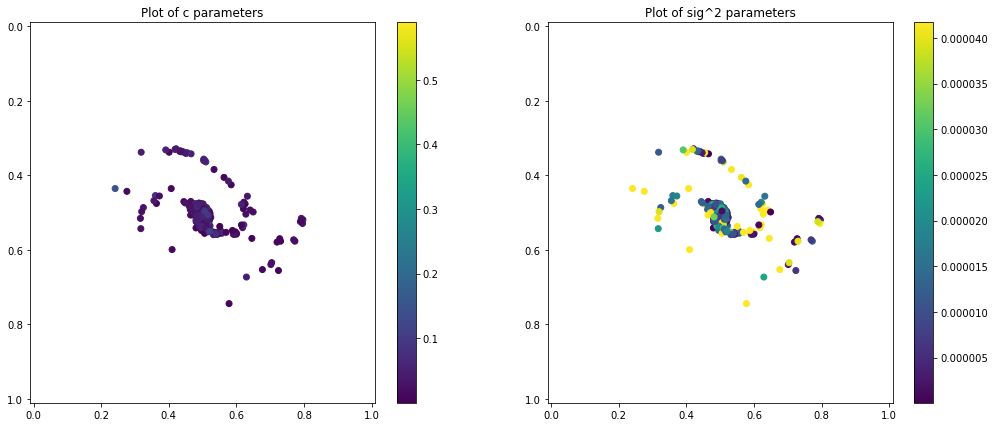

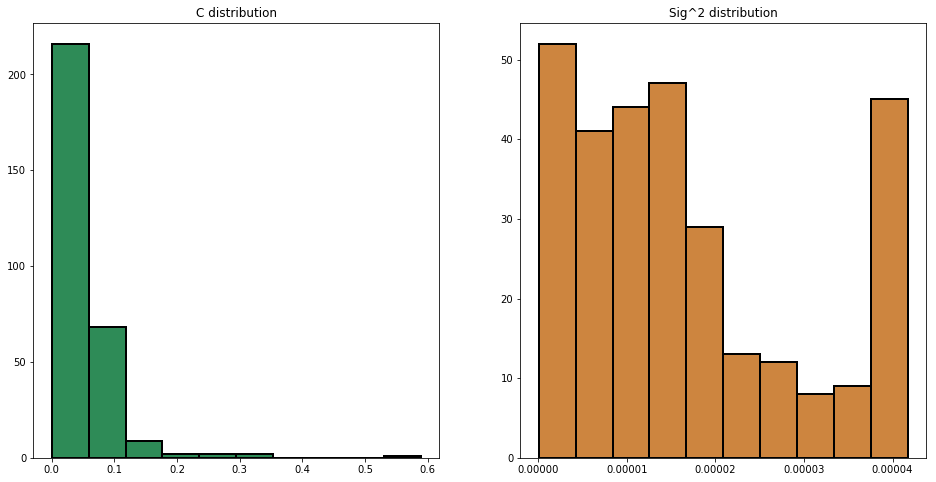

##########################################################################################
Processing example with alpha1: 6.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.022897021425703996
Residual Variance: 0.0004869118439728399
Flux Lost: 0.09047302437883127
Flux Addition: 0.03052249208584308
psi1(u-f): 5.319743299031052
Exceeded Pixels: 4074
Sharpness: 8.161395550116165
psi2(grad u): 0.09133164250869981
Total elapsed time: 338.6408734321594 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2661197269004265
Mean min distance between collocation and cent

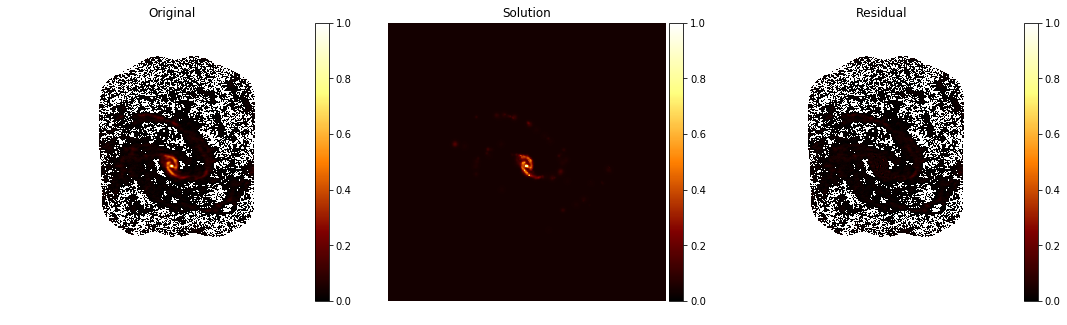

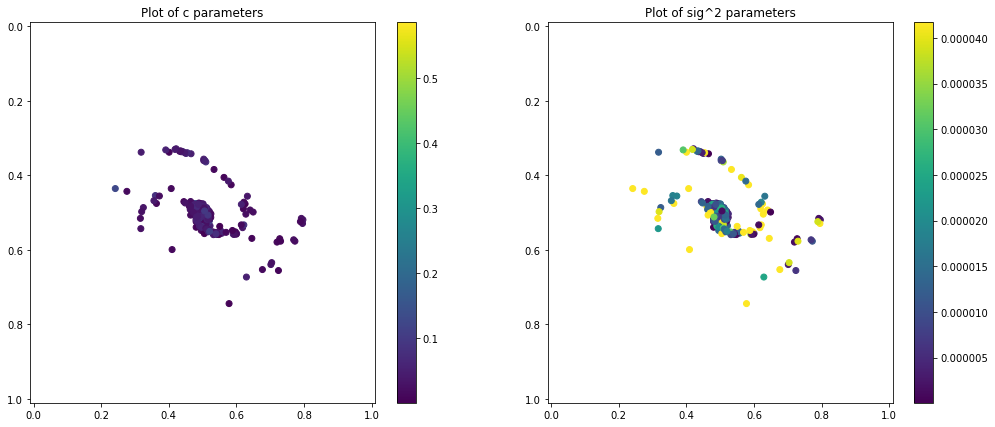

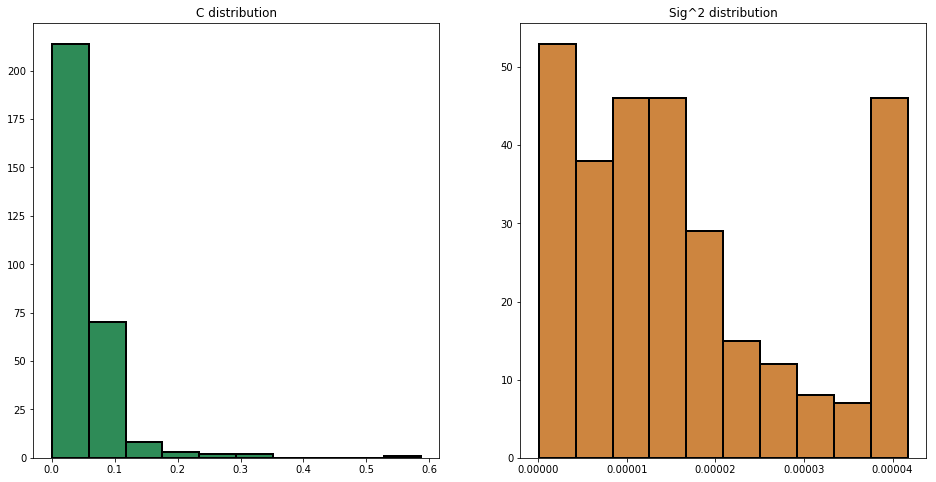

##########################################################################################
Processing example with alpha1: 6.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.02296085235526456
Residual Variance: 0.0004924394461149961
Flux Lost: 0.08901615006224668
Flux Addition: 0.031189580064738726
psi1(u-f): 5.578018356939846
Exceeded Pixels: 4087
Sharpness: 8.21703722282455
psi2(grad u): 0.08991793680268358
Total elapsed time: 325.7200264930725 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.266093330671459
Mean min distance between collocation and cente

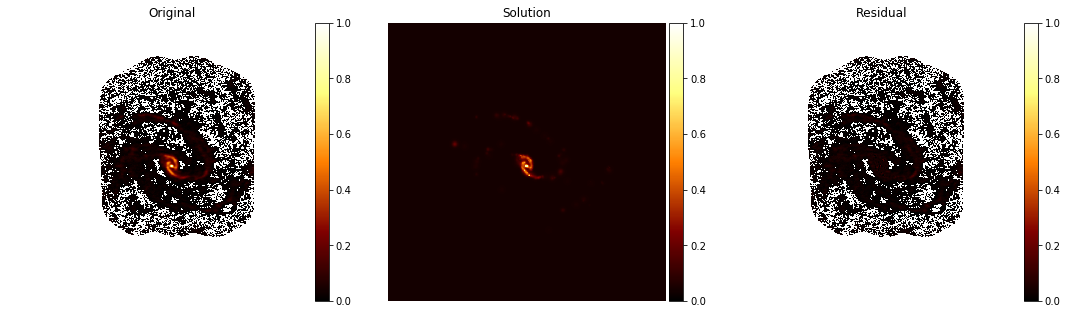

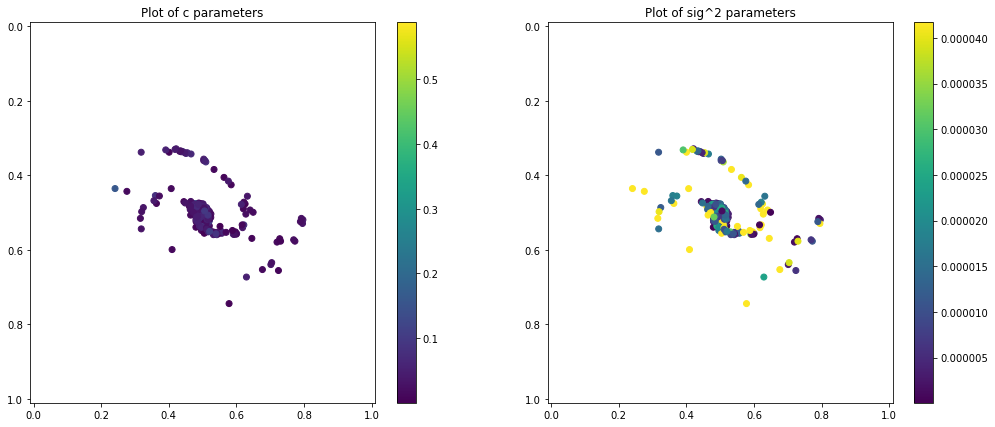

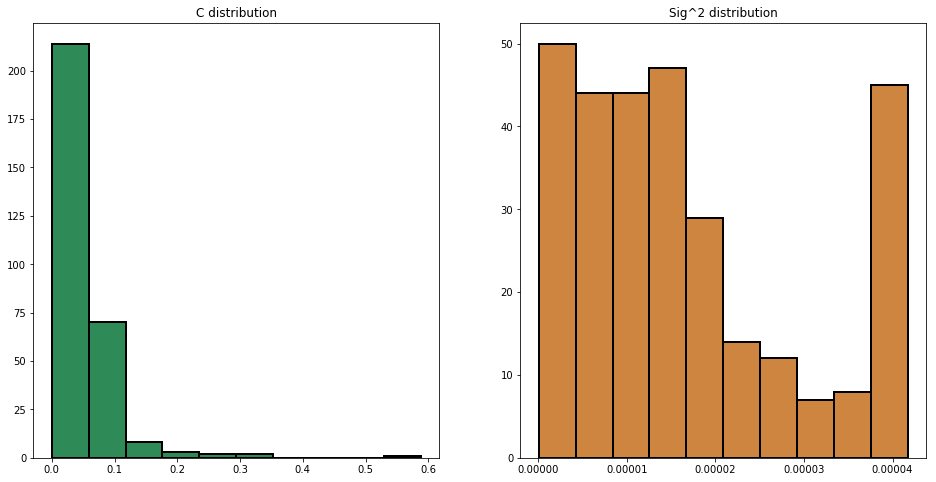

##########################################################################################
Processing example with alpha1: 7.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.02285531733330312
Residual Variance: 0.0004874934268135679
Flux Lost: 0.0887660040683192
Flux Addition: 0.03084734031966358
psi1(u-f): 5.510076228228318
Exceeded Pixels: 4112
Sharpness: 8.192470959591324
psi2(grad u): 0.0892510022357924
Total elapsed time: 309.8416142463684 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.266086979940999
Mean min distance between collocation and center p

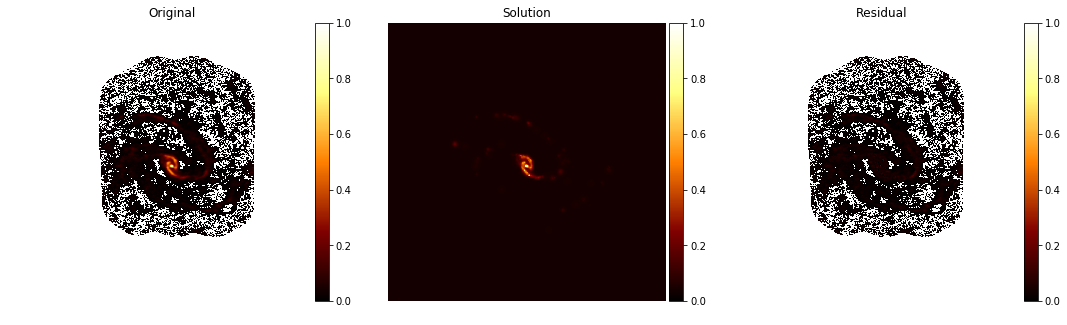

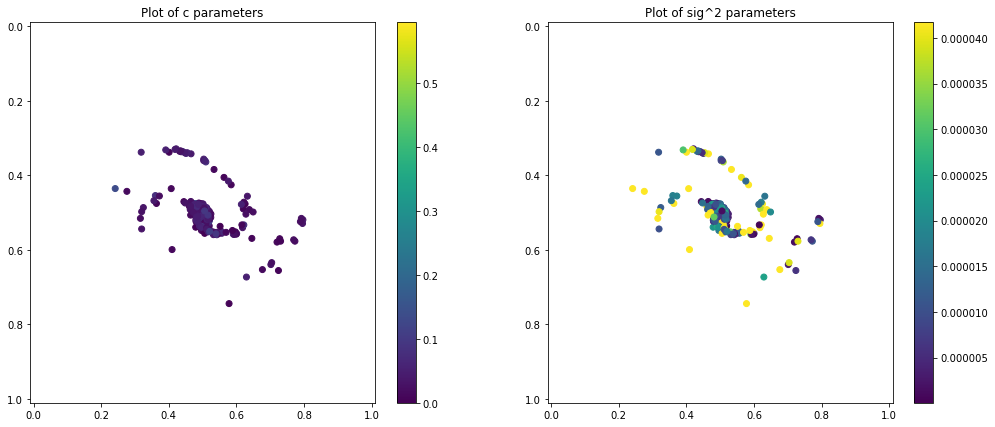

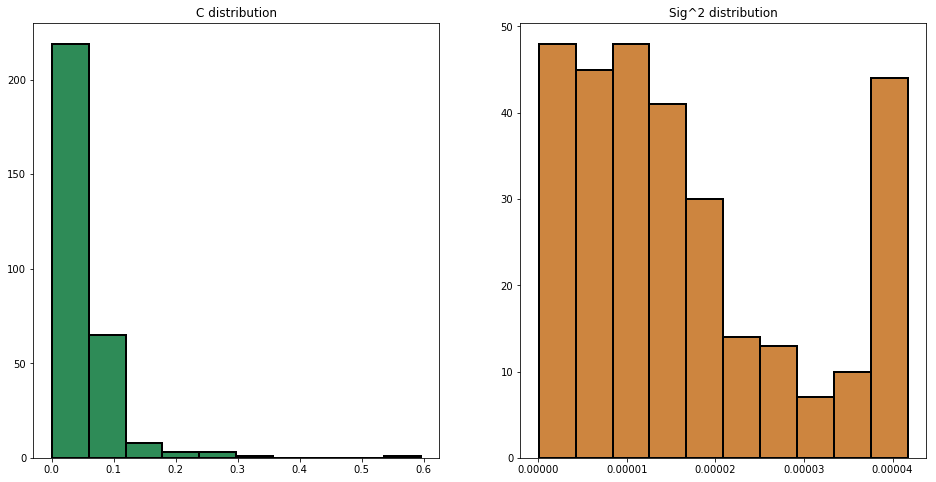

##########################################################################################
Processing example with alpha1: 7.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.023146315839847567
Residual Variance: 0.0005001267809190301
Flux Lost: 0.08942418370775268
Flux Addition: 0.030883492204010005
psi1(u-f): 5.744757590178864
Exceeded Pixels: 4027
Sharpness: 8.246947486679899
psi2(grad u): 0.09435866387436845
Total elapsed time: 304.14715695381165 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2660859582337944
Mean min distance between collocation and c

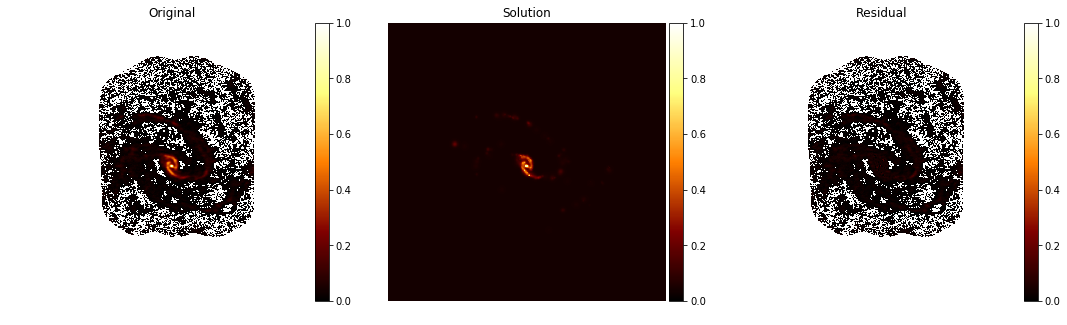

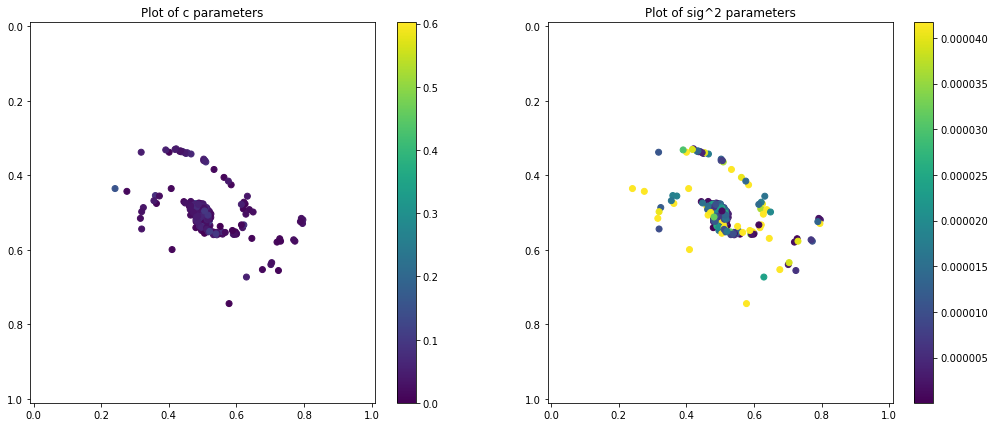

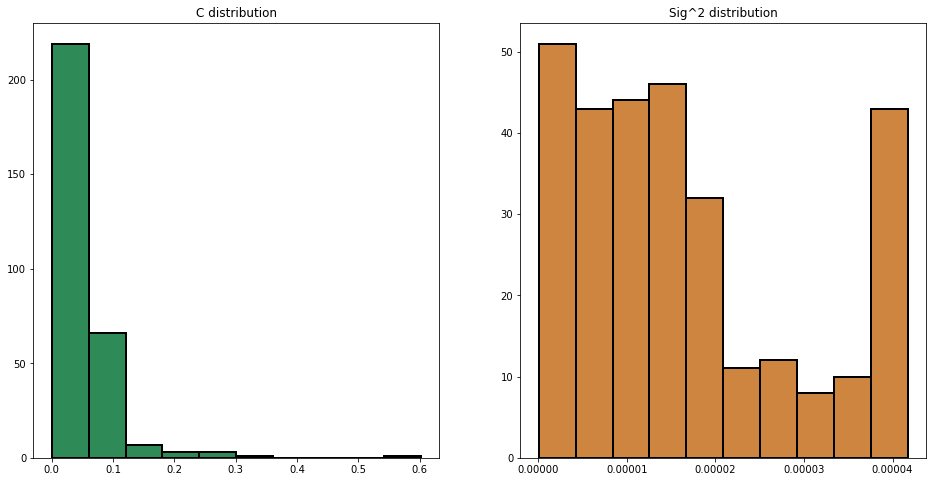

##########################################################################################
Processing example with alpha1: 7.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.023720139568098052
Residual Variance: 0.0005209139824487564
Flux Lost: 0.09313704953526734
Flux Addition: 0.029777941049603407
psi1(u-f): 5.895725810750824
Exceeded Pixels: 3999
Sharpness: 8.257361601243238
psi2(grad u): 0.10836426427046571
Total elapsed time: 307.94657731056213 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26608232817820315
Mean min distance between collocation and c

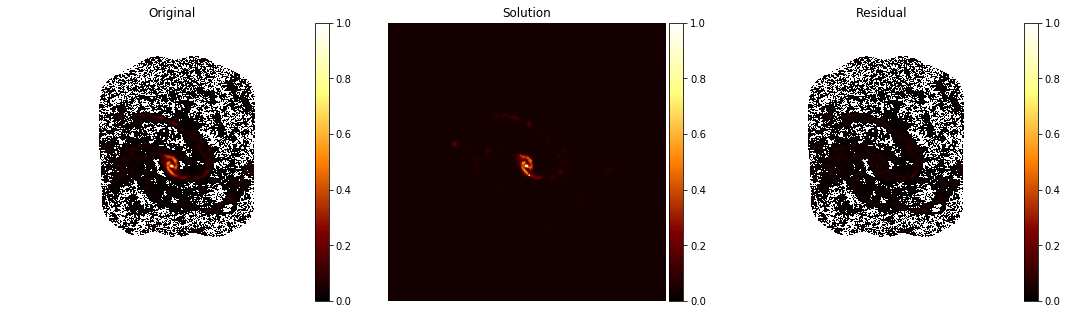

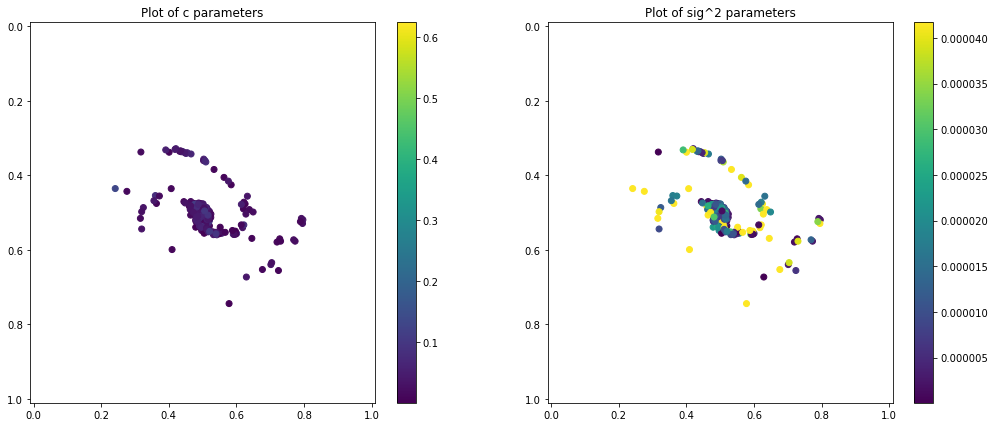

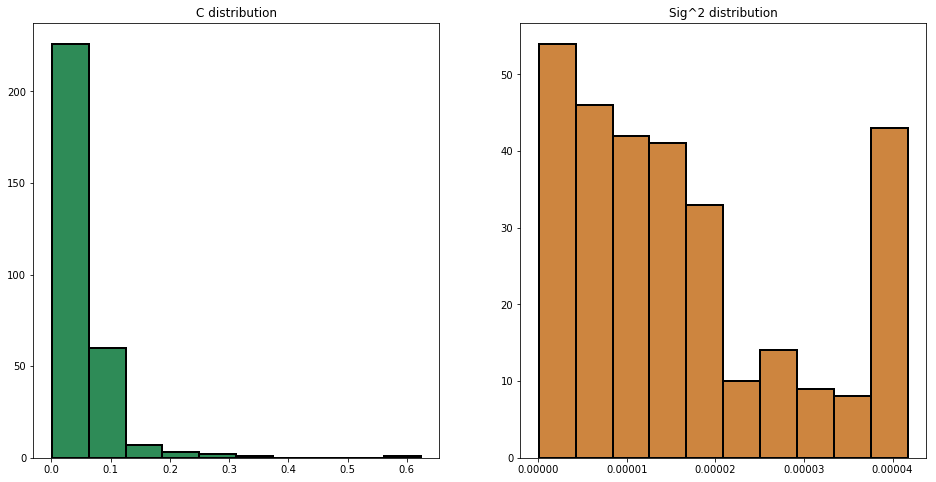

##########################################################################################
Processing example with alpha1: 7.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.024148520637276384
Residual Variance: 0.000541607945276125
Flux Lost: 0.09342559781253226
Flux Addition: 0.030209318623171527
psi1(u-f): 6.291896282321528
Exceeded Pixels: 3969
Sharpness: 8.377459405770367
psi2(grad u): 0.12862783981930198
Total elapsed time: 299.3350124359131 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26607275648814627
Mean min distance between collocation and ce

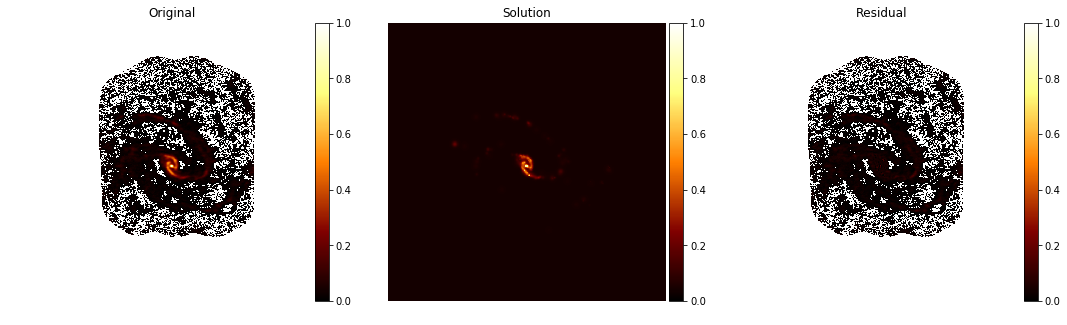

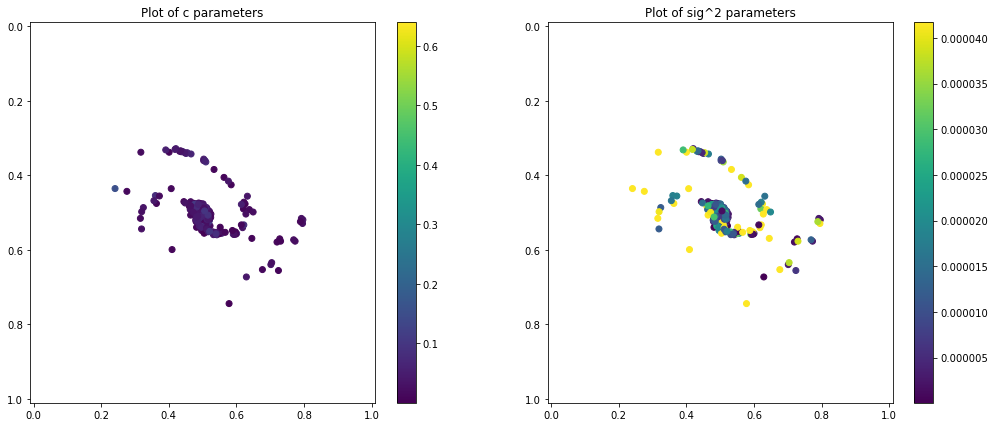

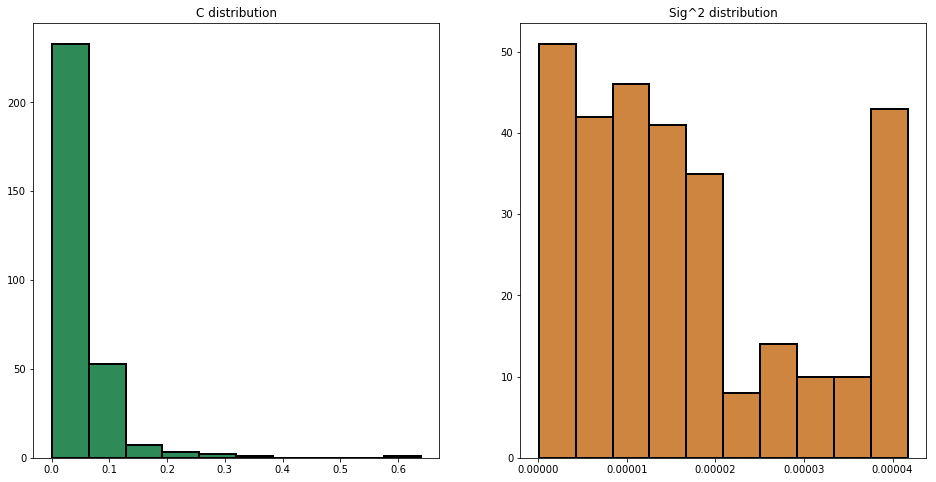

##########################################################################################
Processing example with alpha1: 8.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120109

Residual stats:
Residual RMS: 0.02372571660064093
Residual Variance: 0.0005224852425128729
Flux Lost: 0.0922050104894455
Flux Addition: 0.029845718591942013
psi1(u-f): 6.013782645935799
Exceeded Pixels: 3962
Sharpness: 8.296396116161327
psi2(grad u): 0.11559840901760038
Total elapsed time: 298.1994152069092 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26610164200588177
Mean min distance between collocation and cent

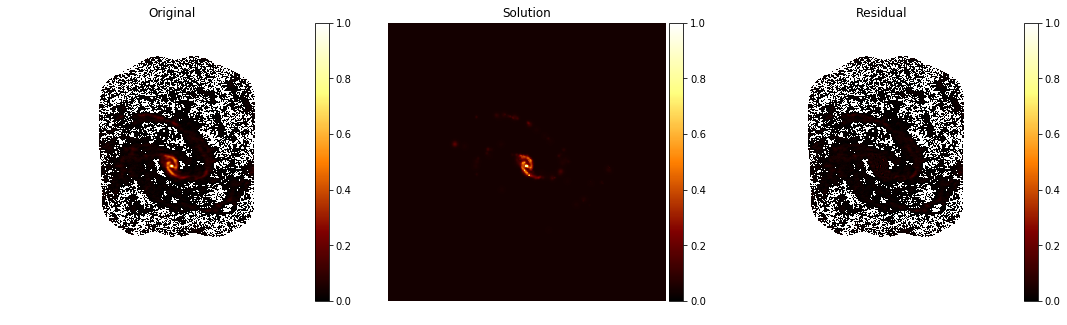

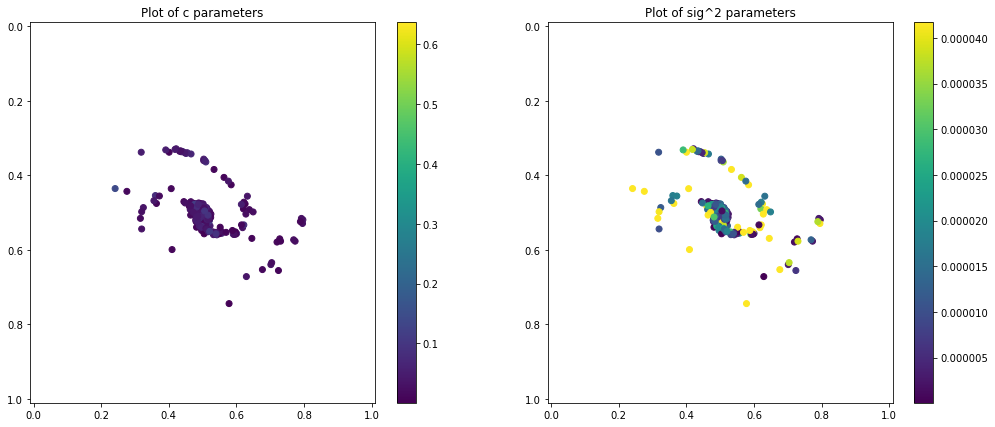

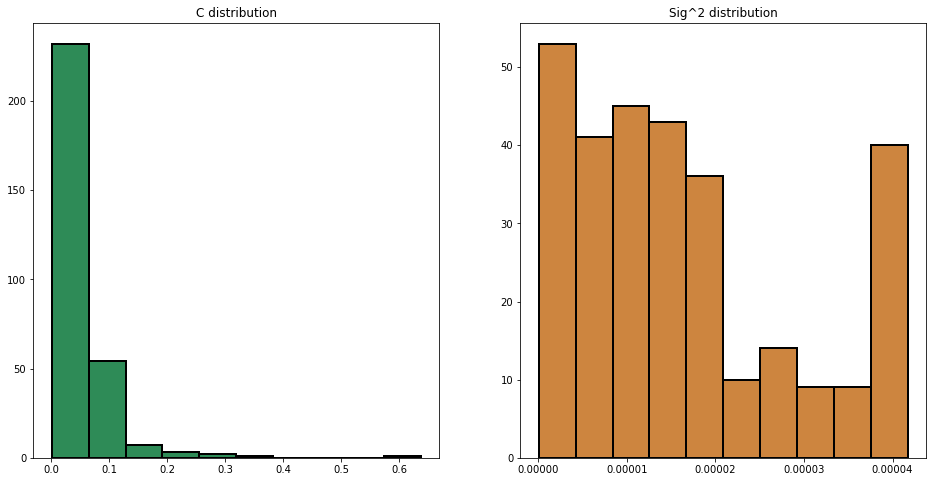

##########################################################################################
Processing example with alpha1: 8.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.023524459639500058
Residual Variance: 0.0005159730665288573
Flux Lost: 0.09034358743455358
Flux Addition: 0.030340616907132634
psi1(u-f): 6.0030535257405795
Exceeded Pixels: 4020
Sharpness: 8.342610395035164
psi2(grad u): 0.11143903023323698
Total elapsed time: 304.25839018821716 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26609209405083106
Mean min distance between collocation and

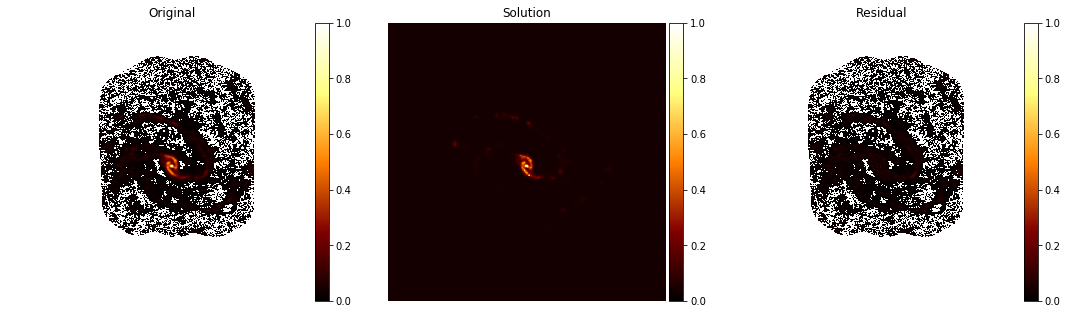

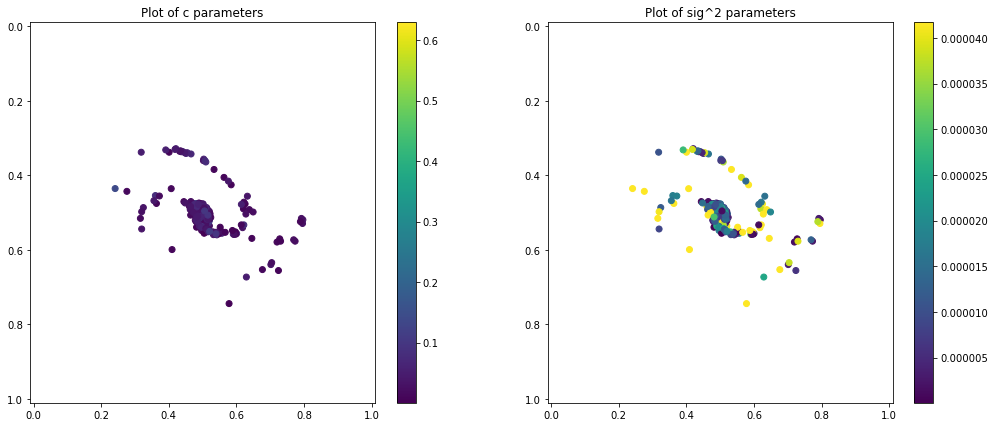

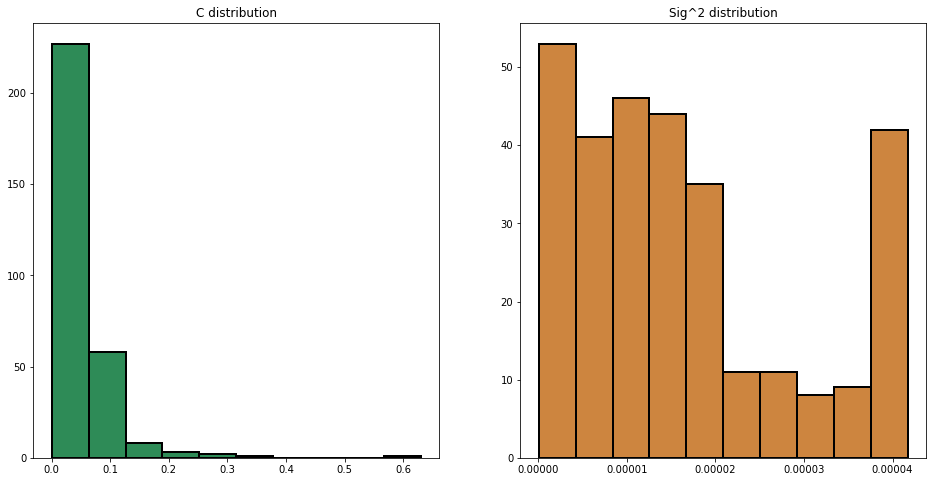

##########################################################################################
Processing example with alpha1: 8.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.02391896843647776
Residual Variance: 0.0005315091836880062
Flux Lost: 0.09249382758583113
Flux Addition: 0.029993175054856564
psi1(u-f): 6.160812519649855
Exceeded Pixels: 3924
Sharpness: 8.398344718057954
psi2(grad u): 0.12122706564553325
Total elapsed time: 303.75195932388306 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26613848226593356
Mean min distance between collocation and ce

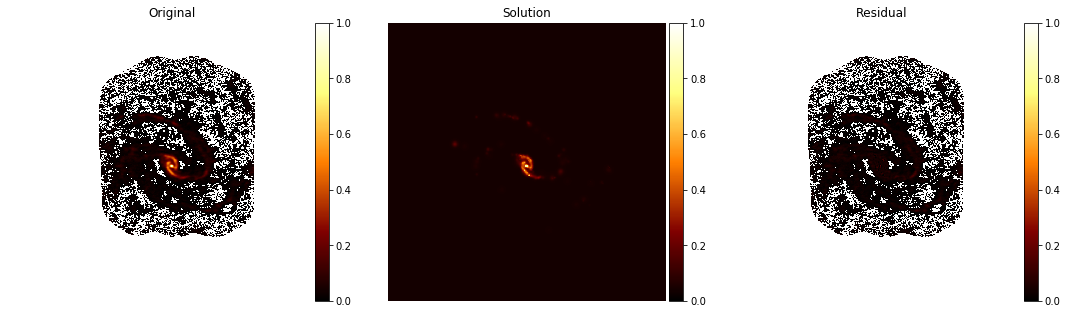

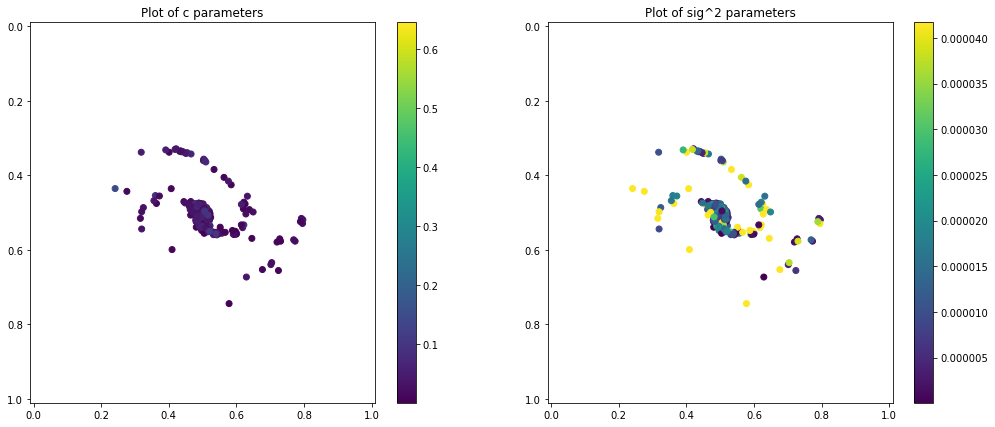

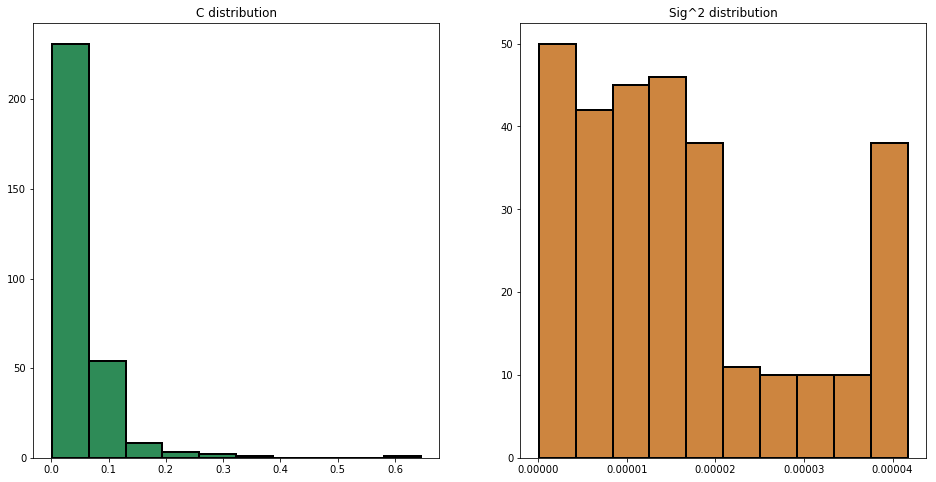

##########################################################################################
Processing example with alpha1: 8.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.023726957464076815
Residual Variance: 0.0005251553477876438
Flux Lost: 0.09065287310817327
Flux Addition: 0.030341257507907855
psi1(u-f): 6.166741273068685
Exceeded Pixels: 3964
Sharpness: 8.387062691313343
psi2(grad u): 0.1176795947098184
Total elapsed time: 303.9656357765198 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26612747677362686
Mean min distance between collocation and ce

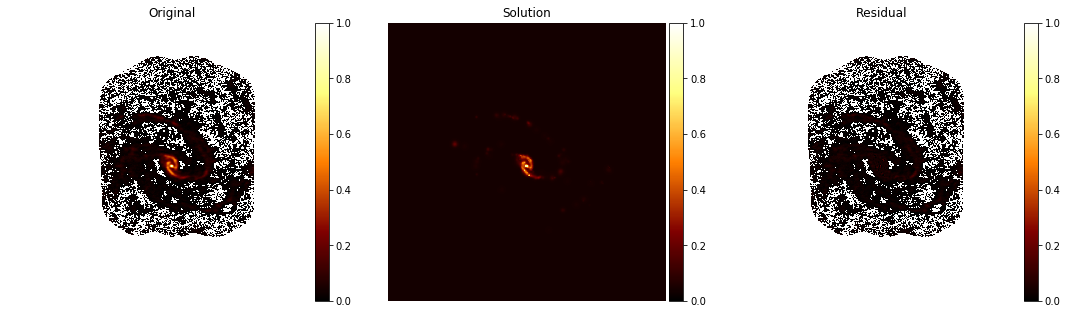

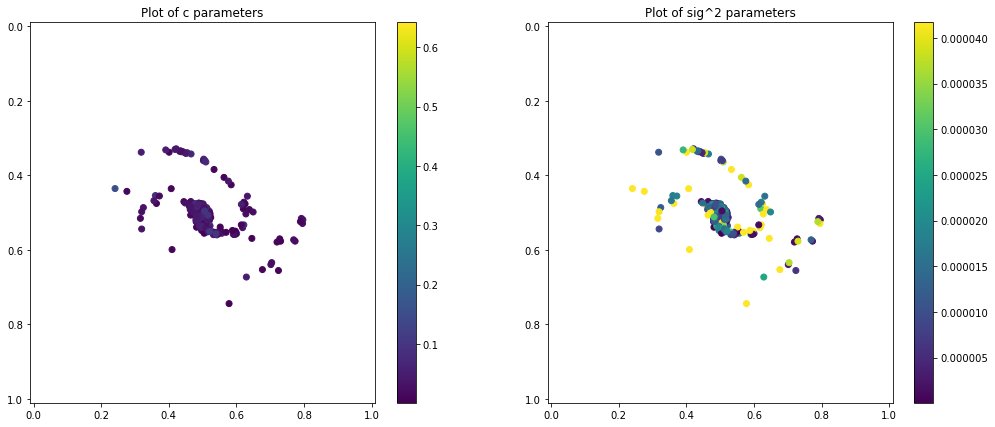

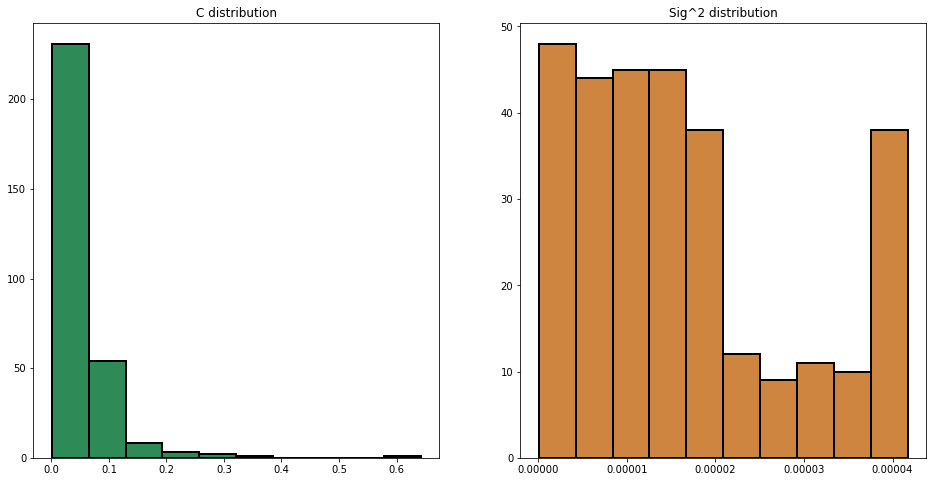

##########################################################################################
Processing example with alpha1: 9.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.02407101505441081
Residual Variance: 0.0005360735871738426
Flux Lost: 0.09404784217044351
Flux Addition: 0.02947873090782287
psi1(u-f): 6.175009852436075
Exceeded Pixels: 3883
Sharpness: 8.352010057607773
psi2(grad u): 0.12307545833650303
Total elapsed time: 304.76977491378784 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.266148603930882
Mean min distance between collocation and cente

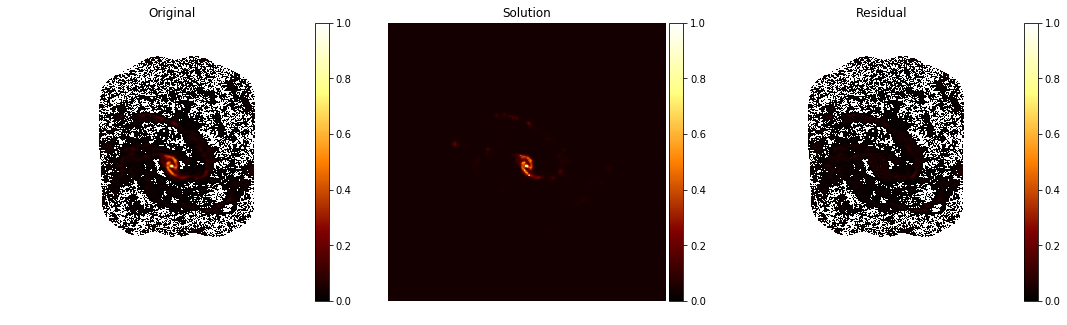

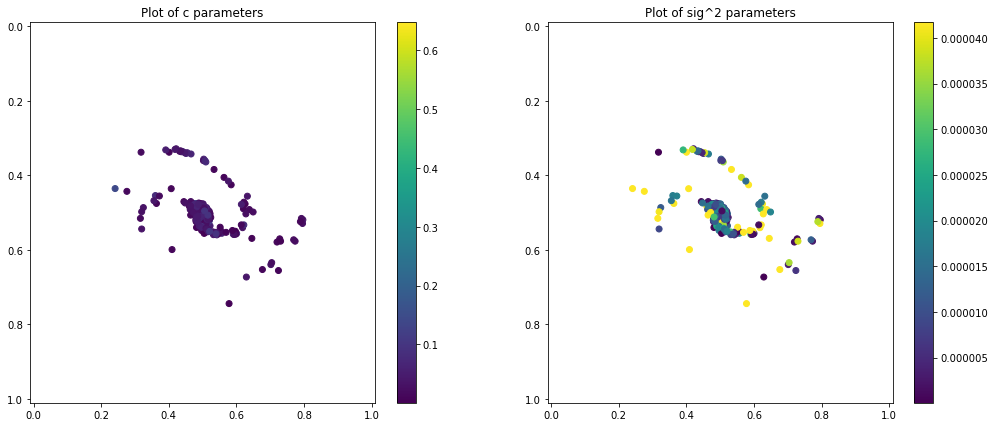

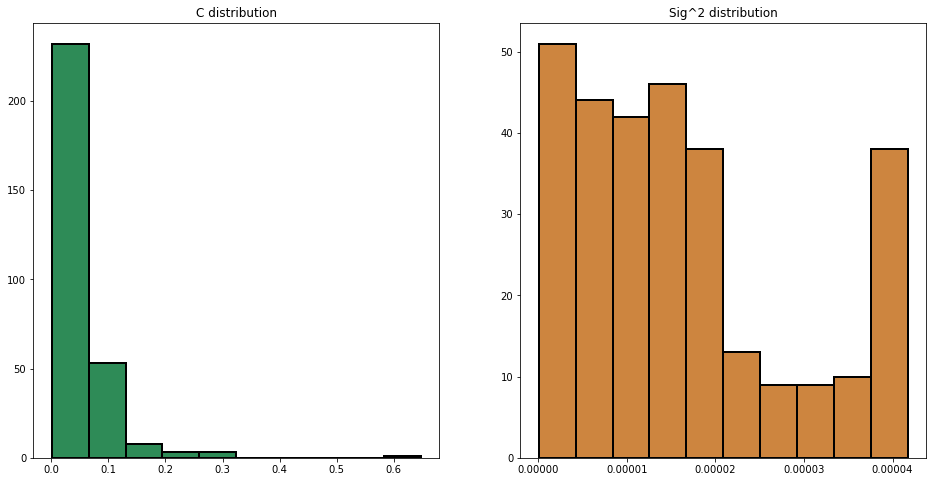

##########################################################################################
Processing example with alpha1: 9.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.02403569067661252
Residual Variance: 0.0005342107998006795
Flux Lost: 0.09401641180238506
Flux Addition: 0.029325661034430777
psi1(u-f): 6.146941179446554
Exceeded Pixels: 3892
Sharpness: 8.33159366694912
psi2(grad u): 0.12121993991929848
Total elapsed time: 308.7892498970032 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26611650352606087
Mean min distance between collocation and cen

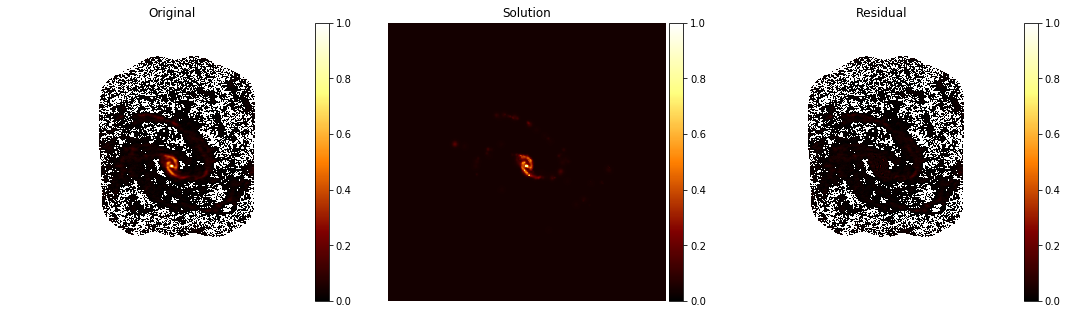

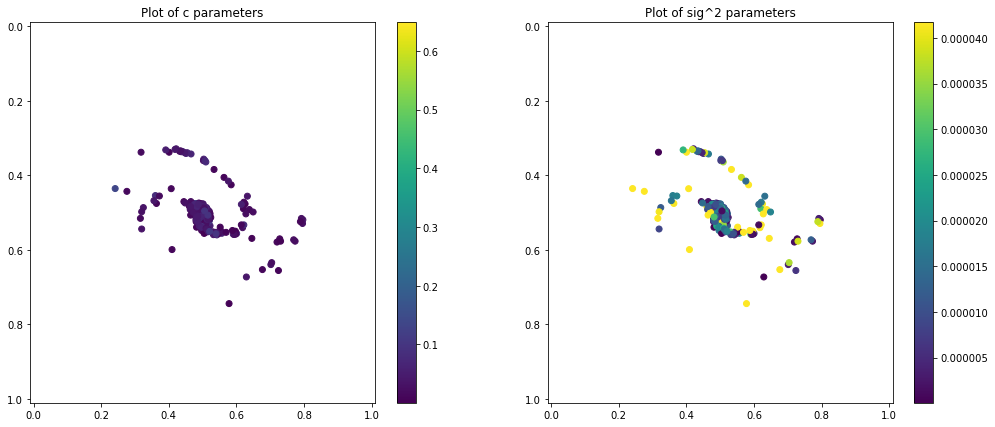

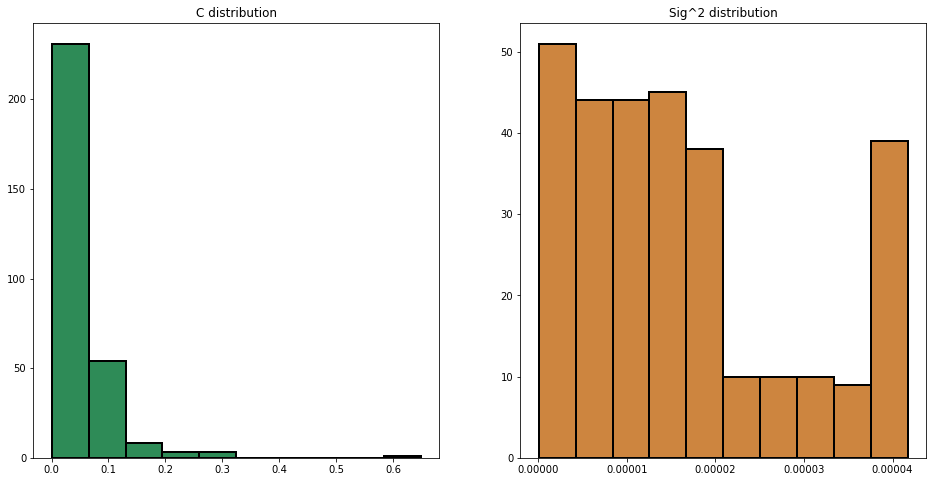

##########################################################################################
Processing example with alpha1: 9.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.02376634639819155
Residual Variance: 0.0005220684519194099
Flux Lost: 0.09312790520427316
Flux Addition: 0.028984355378122714
psi1(u-f): 6.122400765404575
Exceeded Pixels: 3868
Sharpness: 8.287435967089275
psi2(grad u): 0.12430294402697259
Total elapsed time: 303.5766360759735 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2661196064947759
Mean min distance between collocation and cent

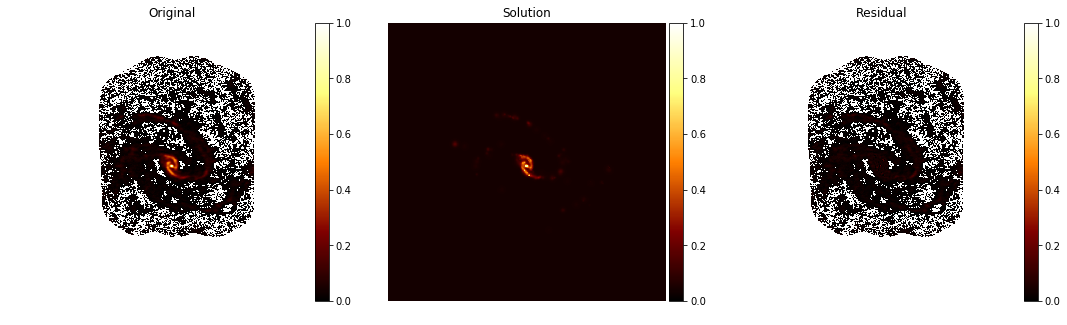

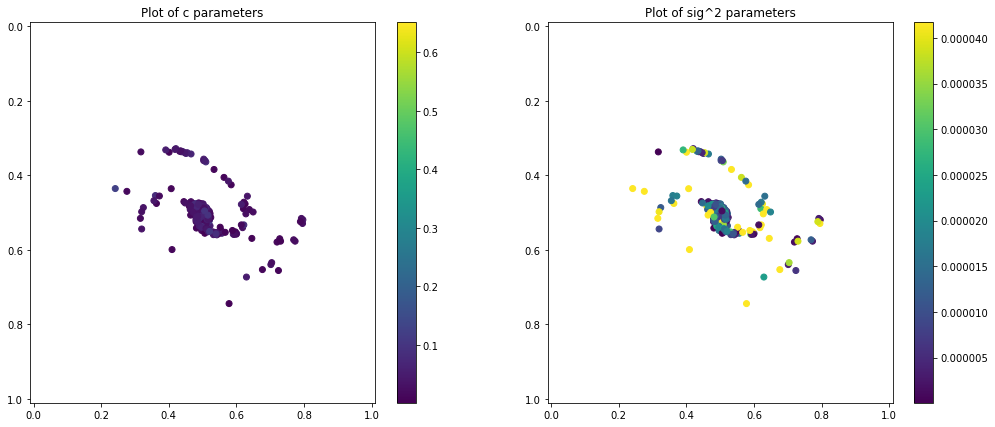

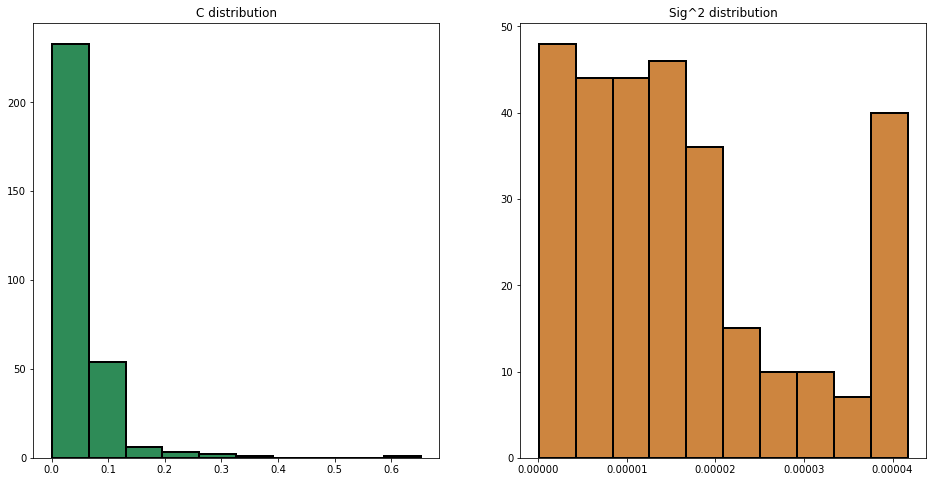

##########################################################################################
Processing example with alpha1: 9.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.023877942769643955
Residual Variance: 0.0005272687650885291
Flux Lost: 0.09327519717117458
Flux Addition: 0.029044261585726906
psi1(u-f): 6.218501557158701
Exceeded Pixels: 3871
Sharpness: 8.308559650606746
psi2(grad u): 0.12673082140063863
Total elapsed time: 302.78657746315 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.266132562872731
Mean min distance between collocation and cente

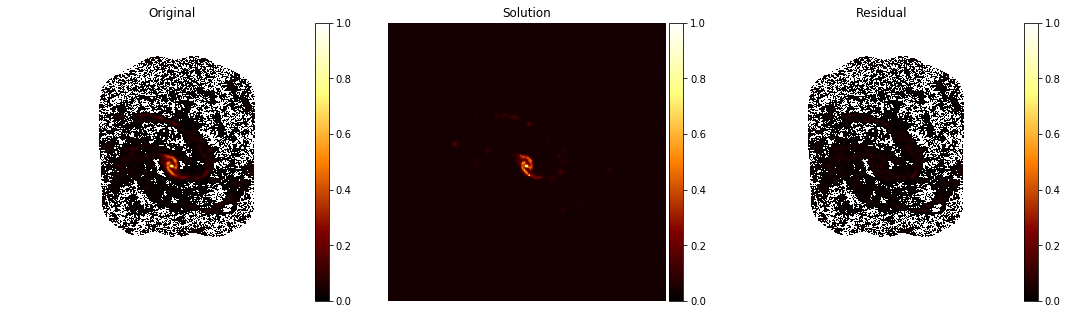

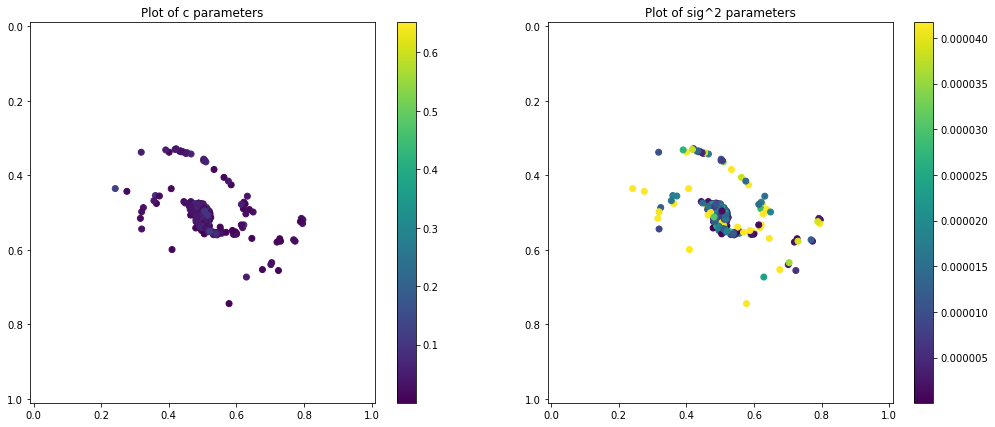

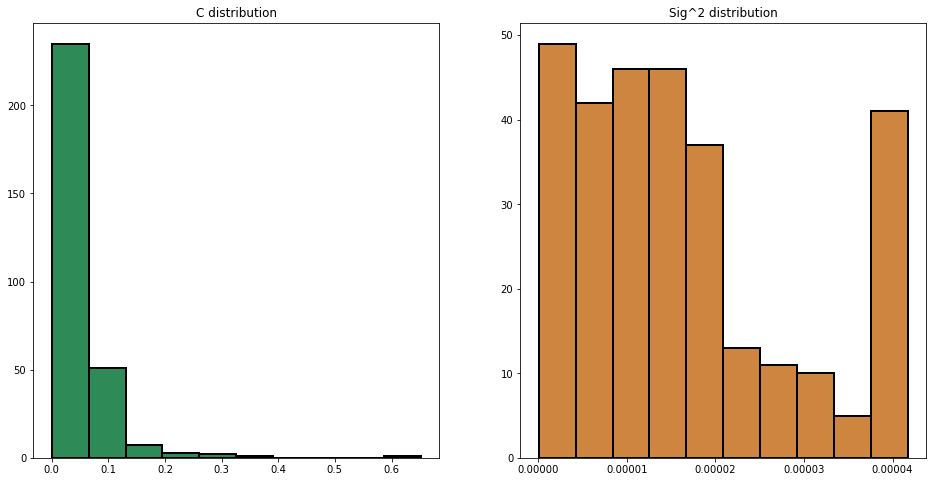

##########################################################################################
Processing example with alpha1: 10.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.023943790617359063
Residual Variance: 0.000533616646591888
Flux Lost: 0.09176605848106258
Flux Addition: 0.029976997068435002
psi1(u-f): 6.3139068091807955
Exceeded Pixels: 3921
Sharpness: 8.458530709129327
psi2(grad u): 0.12845907910497806
Total elapsed time: 302.10155415534973 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2661058334502764
Mean min distance between collocation and c

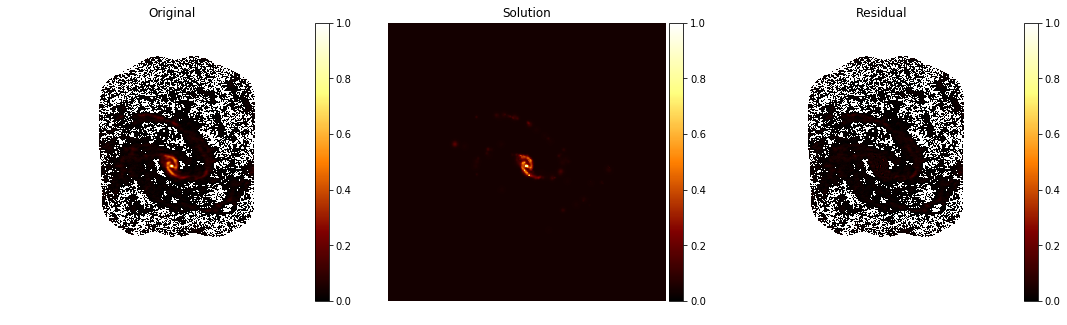

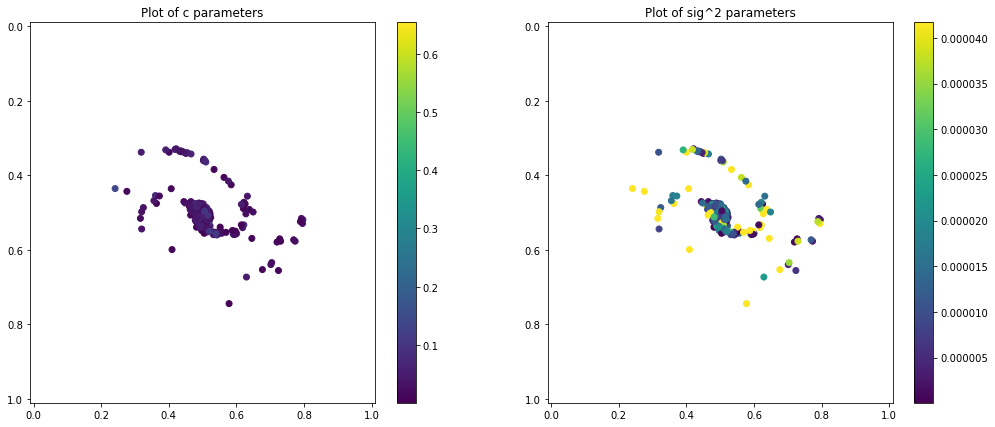

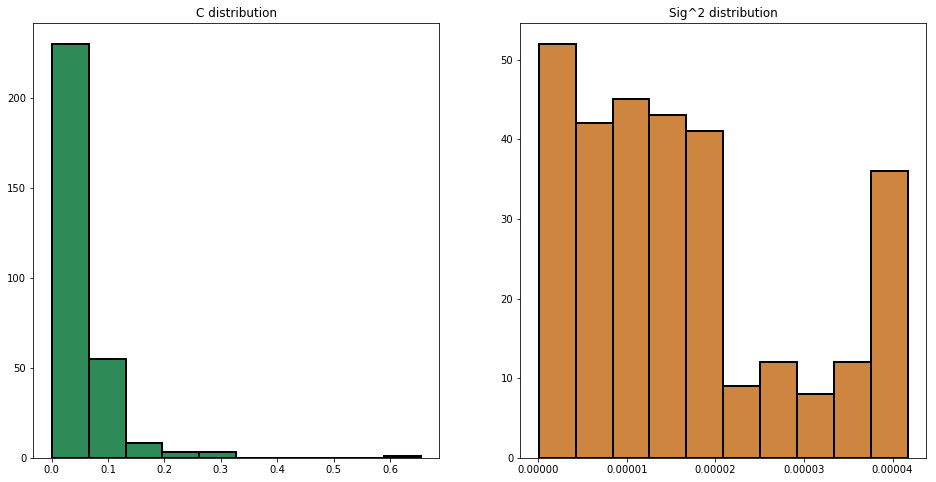

In [5]:
for elm in elm_list:
    print('#'*90)
    print('Processing example with alpha1: {0}'.format(elm.a))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    del elm.data; del elm.mask; del elm.dfunc
    
#pickling results
target = open("exp02_alpha1_m100.pkl", "wb")
pickle.dump(elm_list, target)
target.close()

## `Case 2 `:   $\alpha_2 = [10^{-10},10^0]$ 

In [6]:
elm_list = list()
#alpha2 = np.array([10**-n for n in range(0,11)])
alpha2 = np.linspace(1e-5, 1e-3, 20)

for a2 in alpha2:
    # common parameters
    minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
    maxsig = 30*minsig

    # number of points of each type
    Nc = 300
    #Nb = int(0.2* np.sum(boundary_map(data, base_level))) #20% of boundary pixels
    Nb = int(0.2*Nc)
    Ne = 4*Nc-Nb

    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_points_generation(data, base_level, Nb)

    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]

    ## visualizing the choosen points
    #points_plot(data, center_points=center_points, title="Center Points")
    #points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


    #solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
    #params_plot(c0, sig0, xc, yc)
    #params_distribution_plot(c0, sig0)
    elm_list.append( ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0, lamb1=1., b=a2, lamb2=1.,
                    d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.) )

../lib/points_generation.py:29: RuntimeWarning: invalid value encountered in less_equal
  mask = data <= base_level
../lib/points_generation.py:128: RuntimeWarning: invalid value encountered in greater
  pixel_map = data > base_level
../lib/variational.py:79: RuntimeWarning: invalid value encountered in greater
  self.mask = data > base_level


##########################################################################################
Processing example with alpha2: 1e-05
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 42050

Residual stats:
Residual RMS: 0.02095667842573589
Residual Variance: 0.00041496690141818474
Flux Lost: 0.08627214818883483
Flux Addition: 0.038007860064766585
psi1(u-f): 3.5122581641060227
Exceeded Pixels: 4759
Sharpness: 7.35362446856287
psi2(grad u): 0.0359885088527433
Total elapsed time: 141.5634322166443 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26502885852273617
Mean min distance between coll

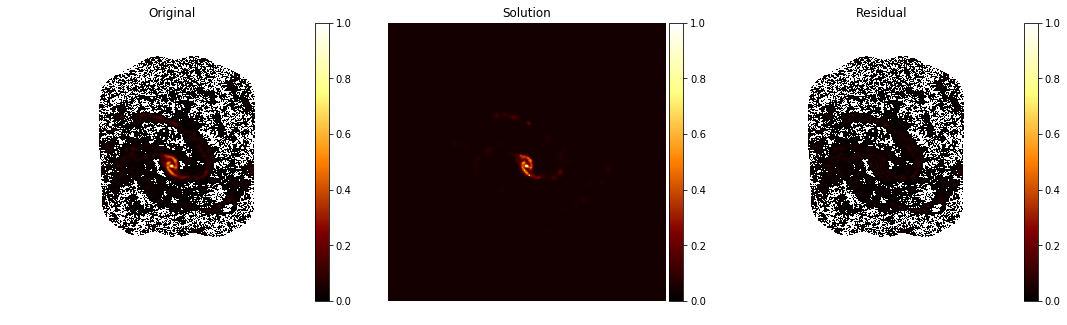

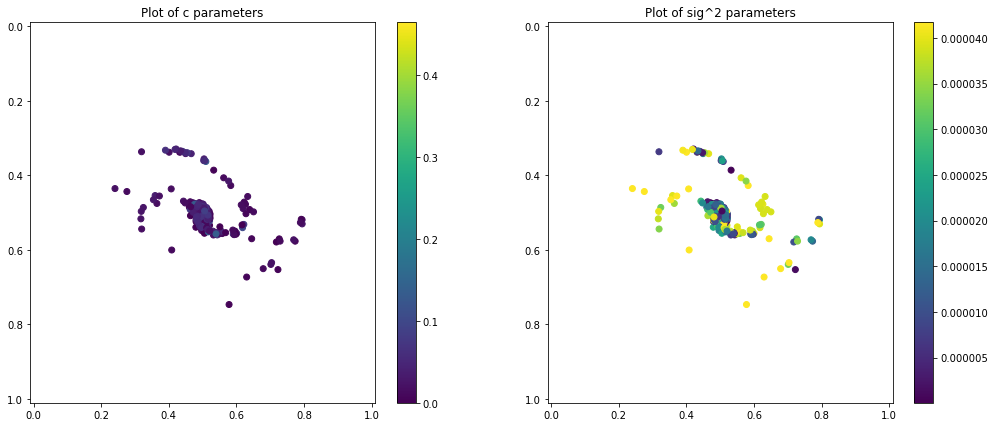

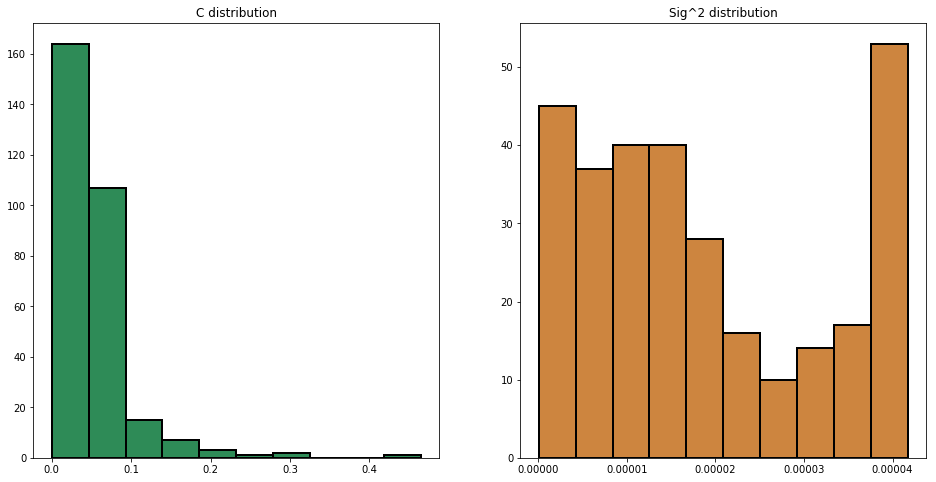

##########################################################################################
Processing example with alpha2: 6.210526315789474e-05
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 38447

Residual stats:
Residual RMS: 0.03592401874064046
Residual Variance: 0.0012364600736063502
Flux Lost: 0.114062627081018
Flux Addition: 0.04193893993436307
psi1(u-f): 14.976366639451578
Exceeded Pixels: 3925
Sharpness: 11.2906222558251
psi2(grad u): 0.8911143505879456
Total elapsed time: 133.2061266899109 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26550956096084577
Mean min distance 

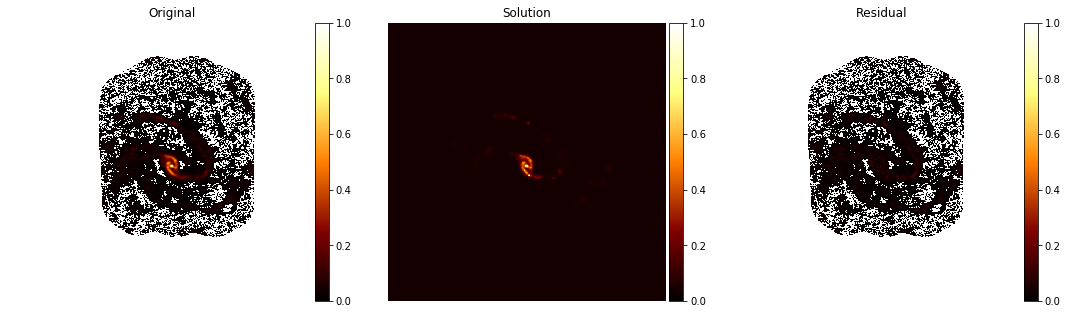

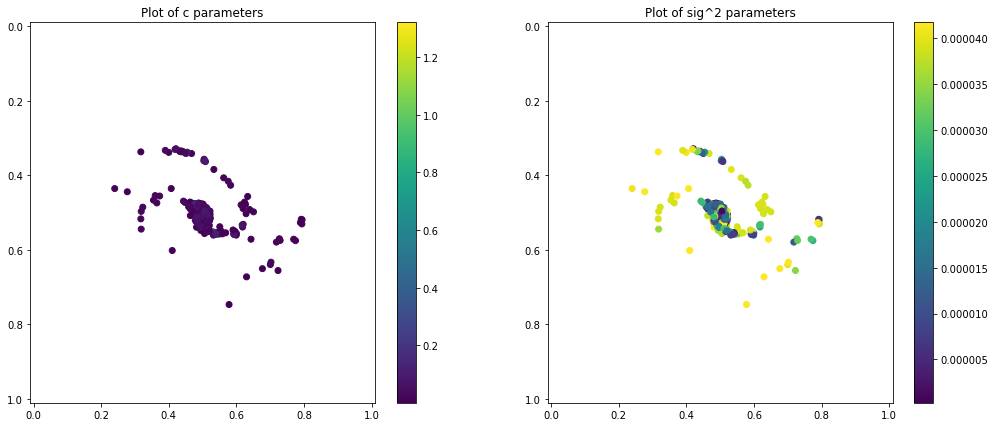

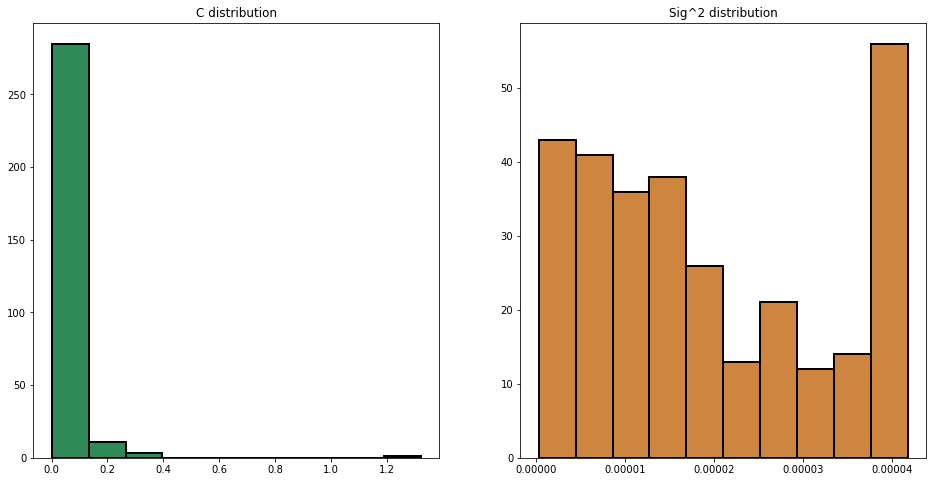

##########################################################################################
Processing example with alpha2: 0.00011421052631578947
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 22833

Residual stats:
Residual RMS: 0.034972404101369634
Residual Variance: 0.0011736600730879619
Flux Lost: 0.11070088169898751
Flux Addition: 0.04175911869434896
psi1(u-f): 14.809223654965992
Exceeded Pixels: 4067
Sharpness: 10.812833404974533
psi2(grad u): 0.6758232029791372
Total elapsed time: 85.89256024360657 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26545599355547167
Mean min dis

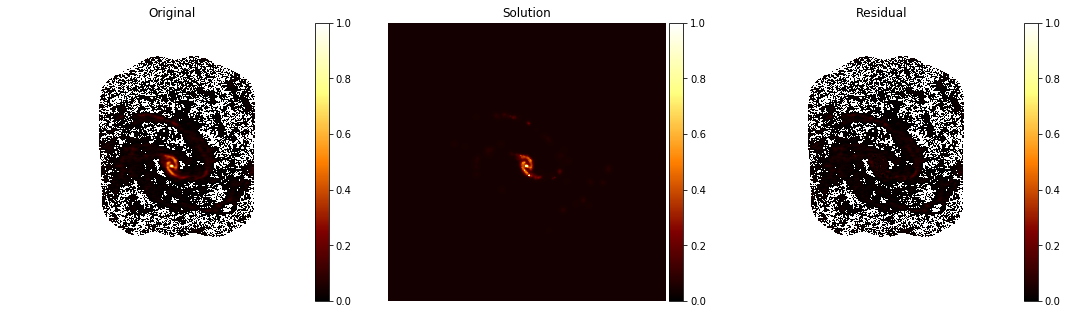

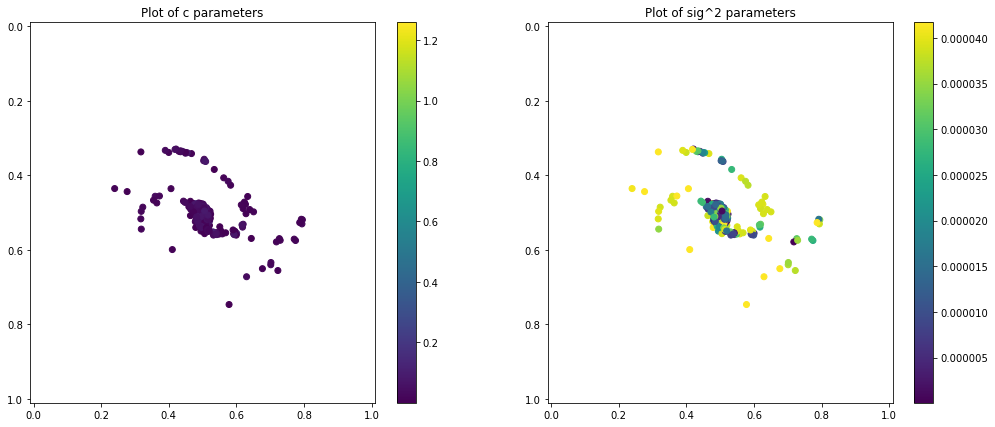

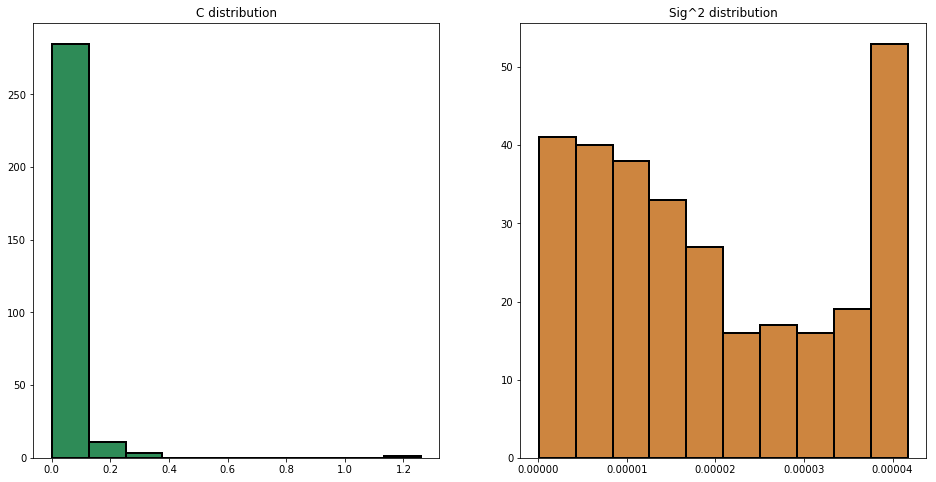

##########################################################################################
Processing example with alpha2: 0.0001663157894736842
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 25236

Residual stats:
Residual RMS: 0.02625045401123392
Residual Variance: 0.0006133495305558586
Flux Lost: 0.11997815351662694
Flux Addition: 0.03462237037795842
psi1(u-f): 4.320014285047473
Exceeded Pixels: 3883
Sharpness: 7.579206046173178
psi2(grad u): 0.059172381148378875
Total elapsed time: 90.00012230873108 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2655559885384114
Mean min distan

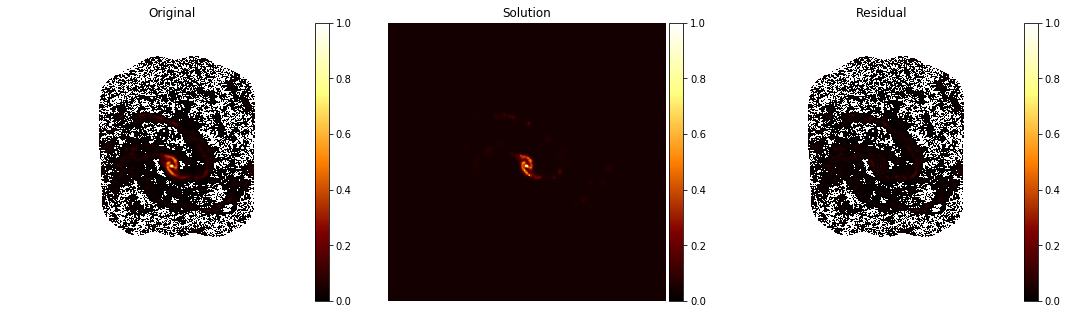

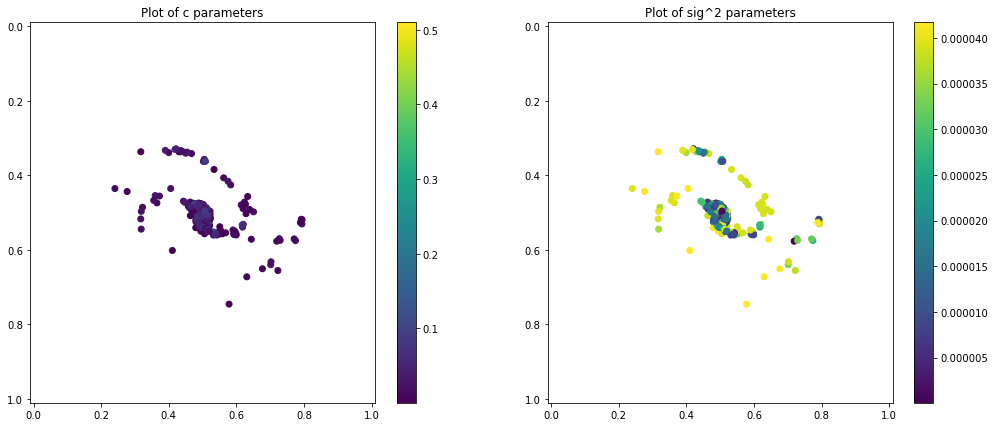

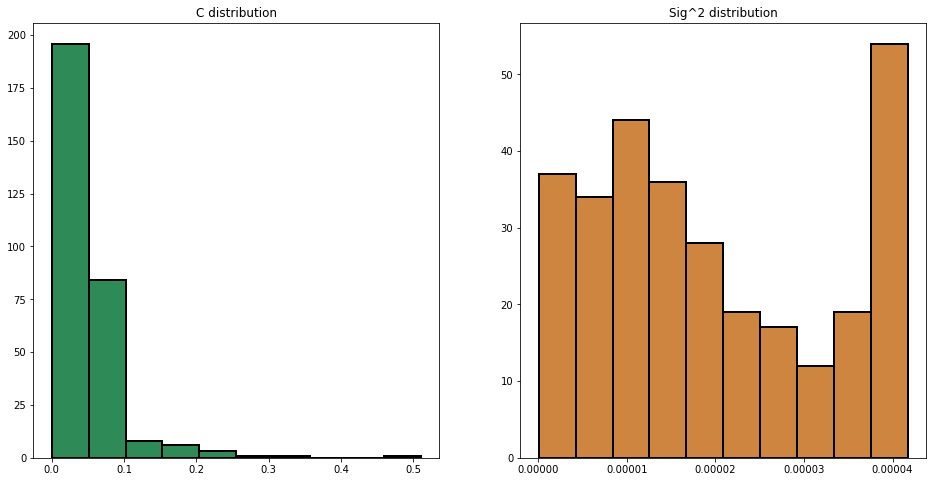

##########################################################################################
Processing example with alpha2: 0.00021842105263157895
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 36049

Residual stats:
Residual RMS: 0.02494971293401879
Residual Variance: 0.0005570473515233903
Flux Lost: 0.11375445089504362
Flux Addition: 0.03441232368231809
psi1(u-f): 3.800734857026398
Exceeded Pixels: 3912
Sharpness: 7.32471980900226
psi2(grad u): 0.03740940685657322
Total elapsed time: 129.50129294395447 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.265413972377282
Mean min distanc

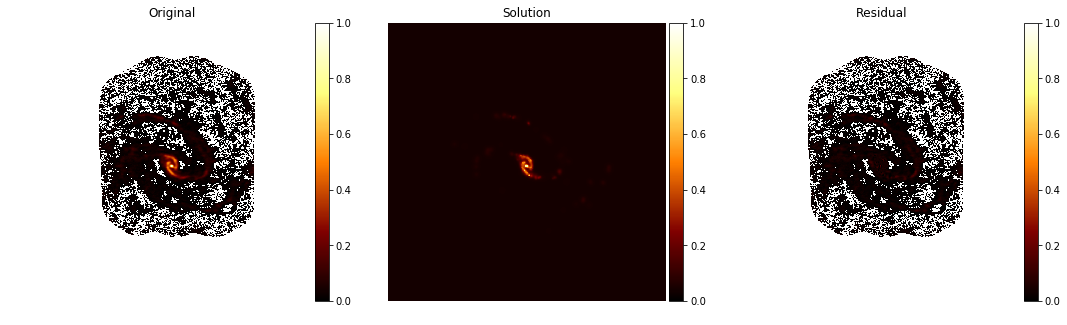

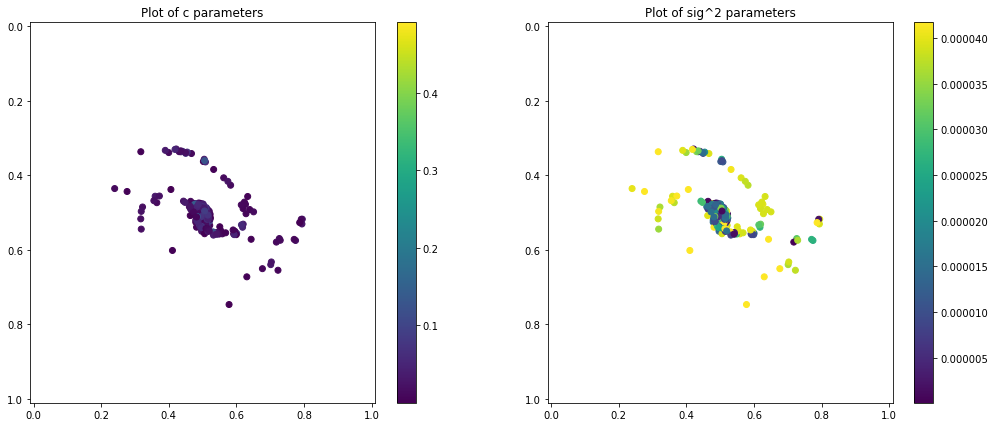

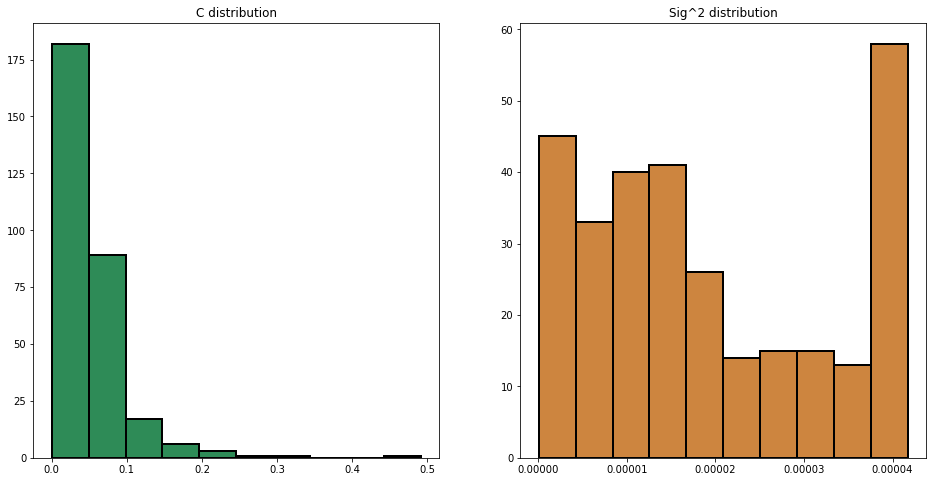

##########################################################################################
Processing example with alpha2: 0.0002705263157894737
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 22833

Residual stats:
Residual RMS: 0.025266414058134512
Residual Variance: 0.0005679007611451962
Flux Lost: 0.11624526911241322
Flux Addition: 0.03389859856466069
psi1(u-f): 3.509742339714877
Exceeded Pixels: 3952
Sharpness: 7.215917771240976
psi2(grad u): 0.03385965969722351
Total elapsed time: 85.83970832824707 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2653741656920197
Mean min distan

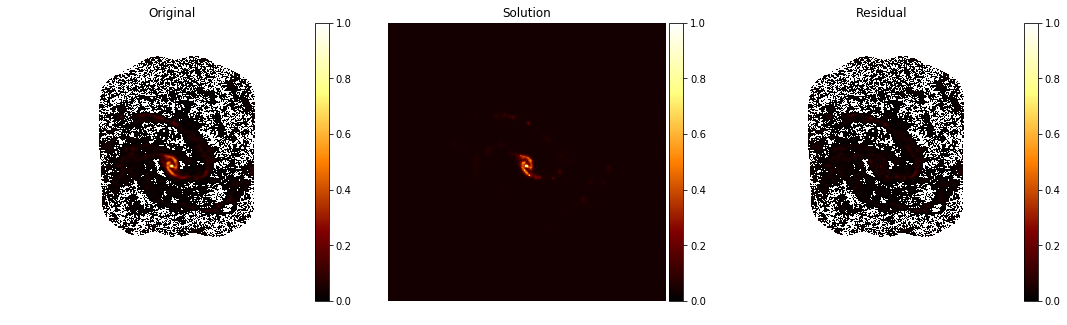

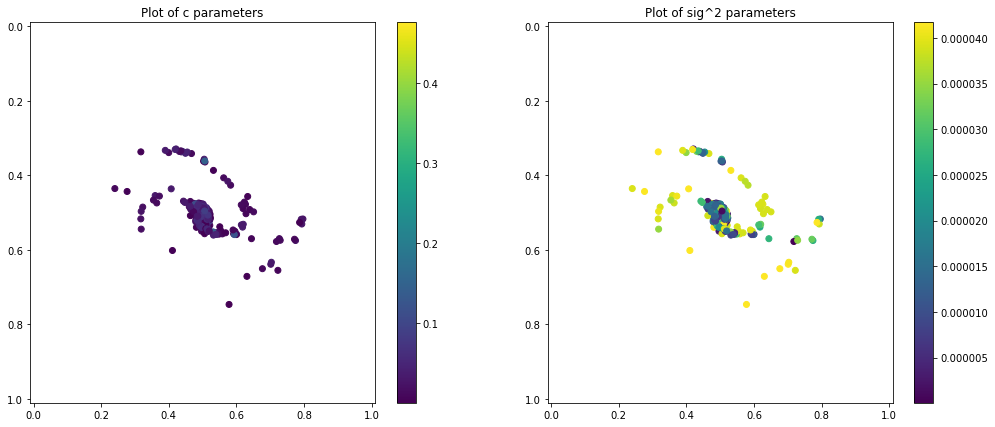

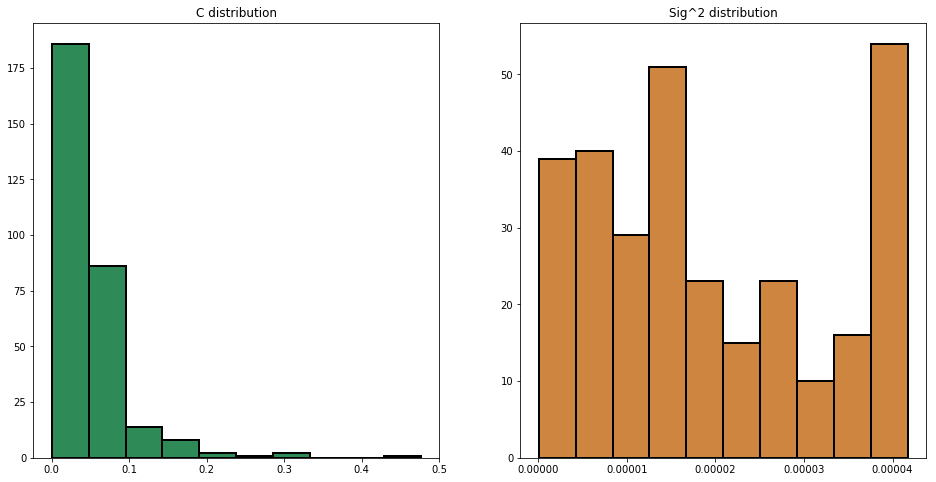

##########################################################################################
Processing example with alpha2: 0.00032263157894736843
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 27640

Residual stats:
Residual RMS: 0.03104497045178721
Residual Variance: 0.0008963277831273547
Flux Lost: 0.12225075676053183
Flux Addition: 0.041692441063918284
psi1(u-f): 10.419096691294813
Exceeded Pixels: 3806
Sharpness: 8.547208274583168
psi2(grad u): 0.08793500667873967
Total elapsed time: 100.1288731098175 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2655712384626474
Mean min dist

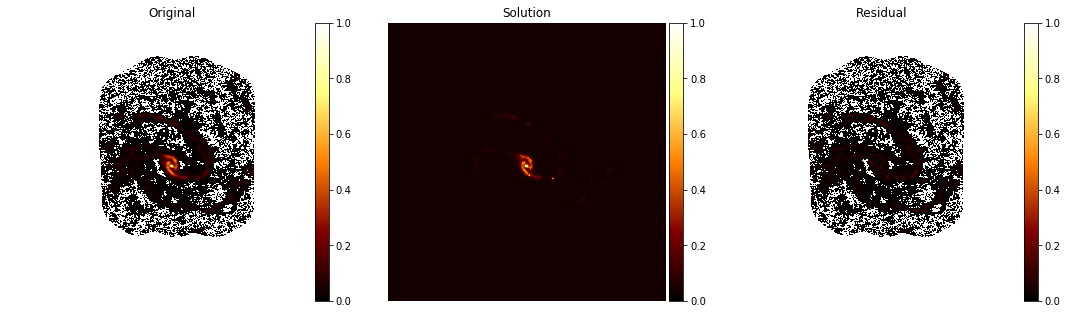

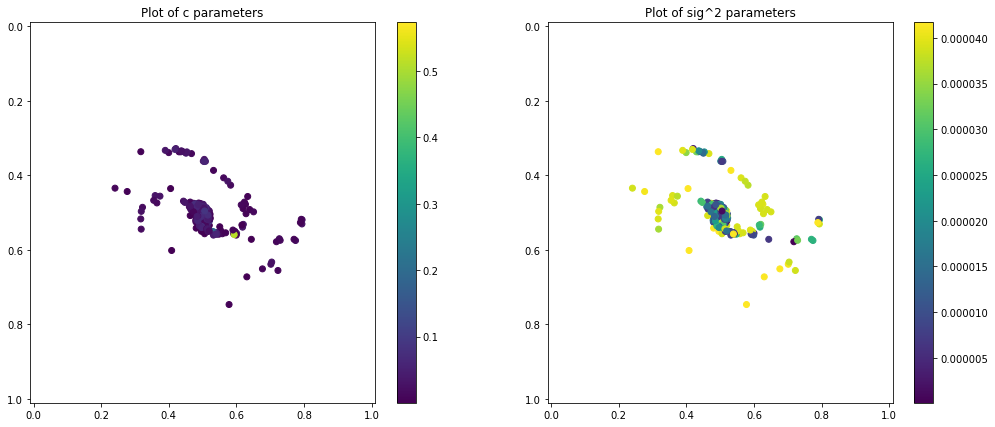

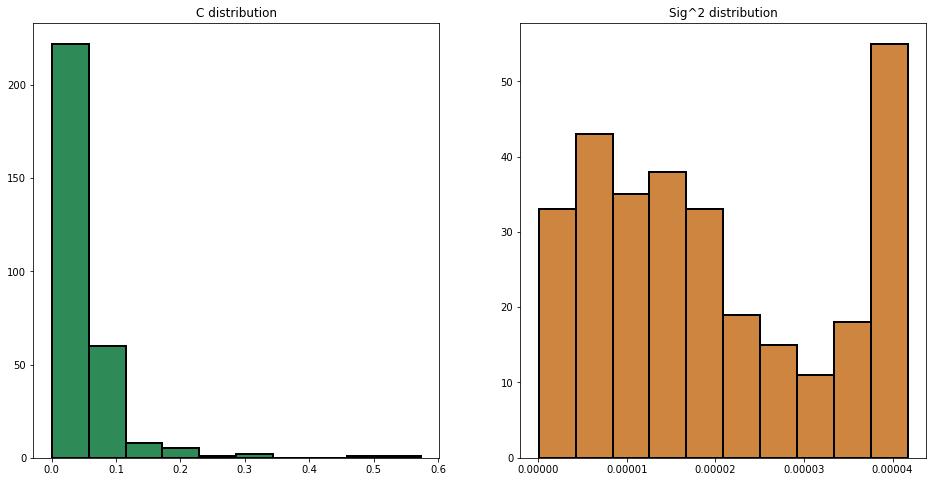

##########################################################################################
Processing example with alpha2: 0.0003747368421052632
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 26436

Residual stats:
Residual RMS: 0.033005735850418334
Residual Variance: 0.001030547463309288
Flux Lost: 0.12215664876008016
Flux Addition: 0.04692803194866969
psi1(u-f): 13.793798943017904
Exceeded Pixels: 3921
Sharpness: 8.995828457629328
psi2(grad u): 0.11618968695140001
Total elapsed time: 92.5156660079956 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26554586842832123
Mean min distan

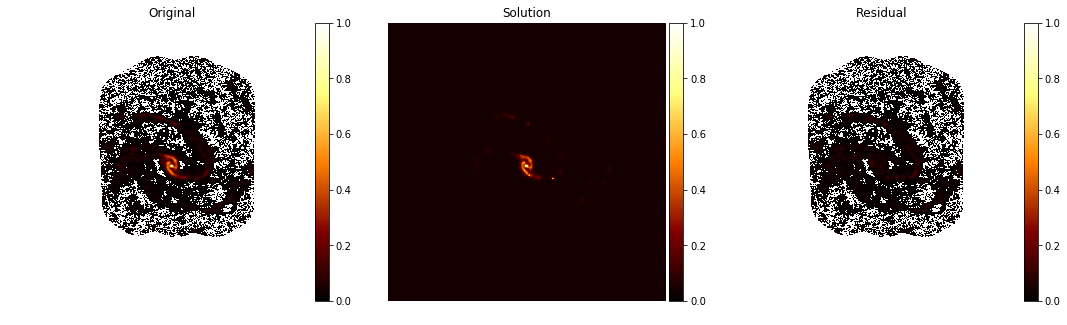

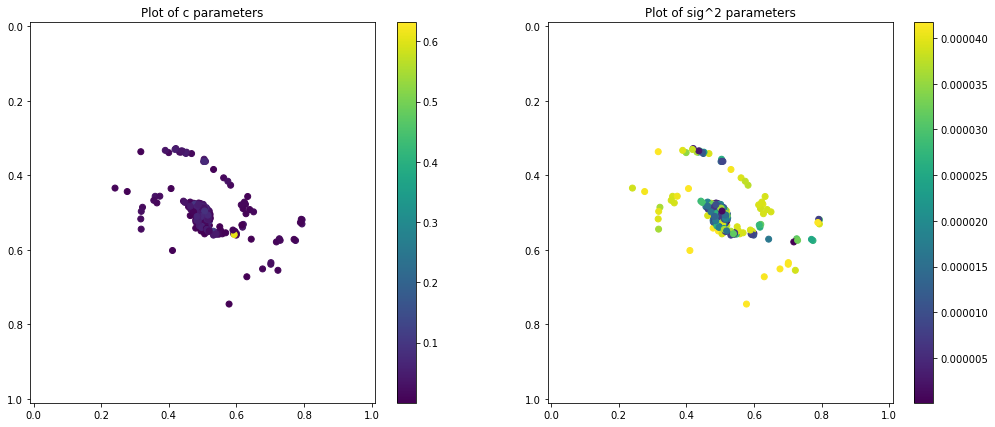

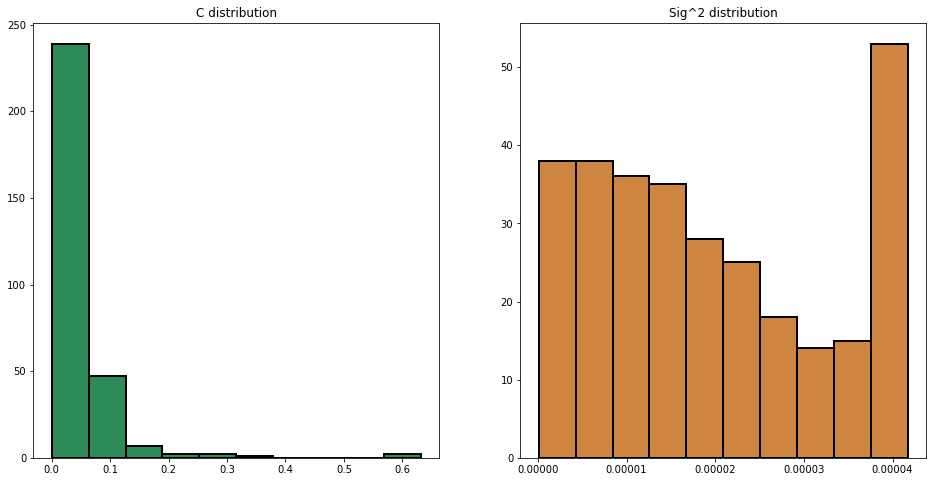

##########################################################################################
Processing example with alpha2: 0.0004268421052631579
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 18030

Residual stats:
Residual RMS: 0.03234741703675921
Residual Variance: 0.0009200635027463683
Flux Lost: 0.14283328704824616
Flux Addition: 0.03261156667151093
psi1(u-f): 8.272393484687875
Exceeded Pixels: 3381
Sharpness: 9.244887336077737
psi2(grad u): 0.41886246272202
Total elapsed time: 70.34731721878052 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.265546158407404
Mean min distance be

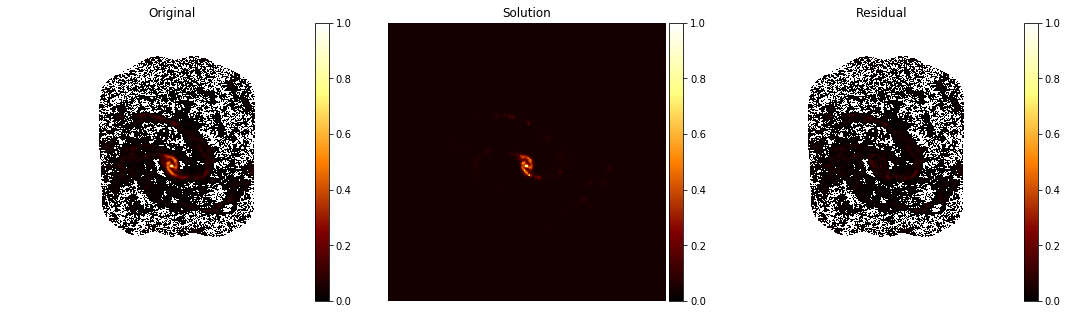

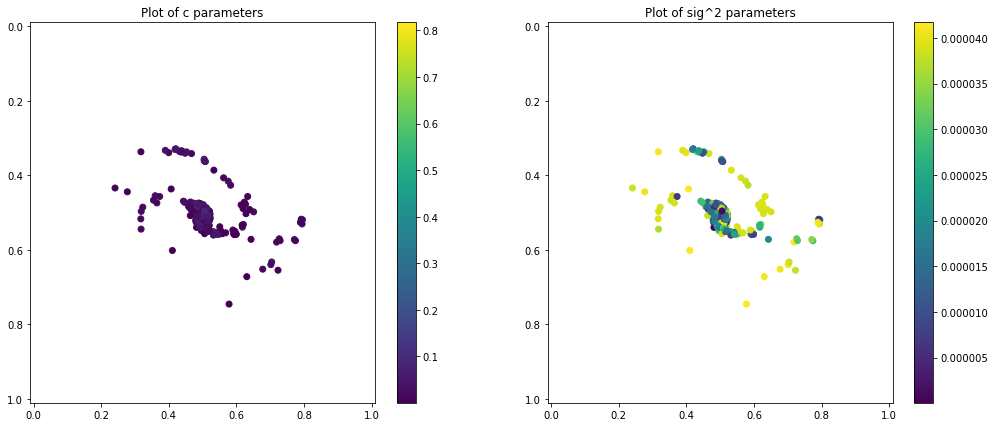

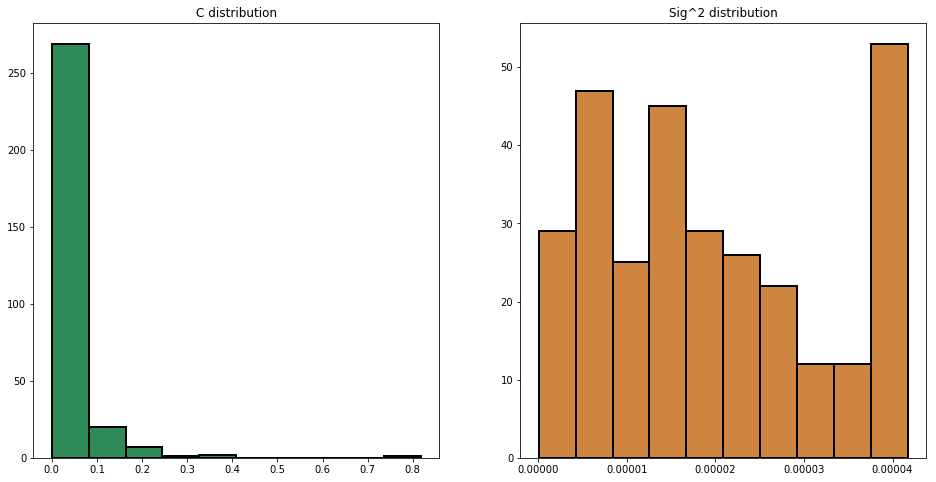

##########################################################################################
Processing example with alpha2: 0.00047894736842105264
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 21632

Residual stats:
Residual RMS: 0.03117481915648188
Residual Variance: 0.0008781298411395843
Flux Lost: 0.13112469391641207
Flux Addition: 0.03616467419873574
psi1(u-f): 8.460817763831901
Exceeded Pixels: 3588
Sharpness: 9.105782235427096
psi2(grad u): 0.3210769424315519
Total elapsed time: 83.79675602912903 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2655668203718236
Mean min distanc

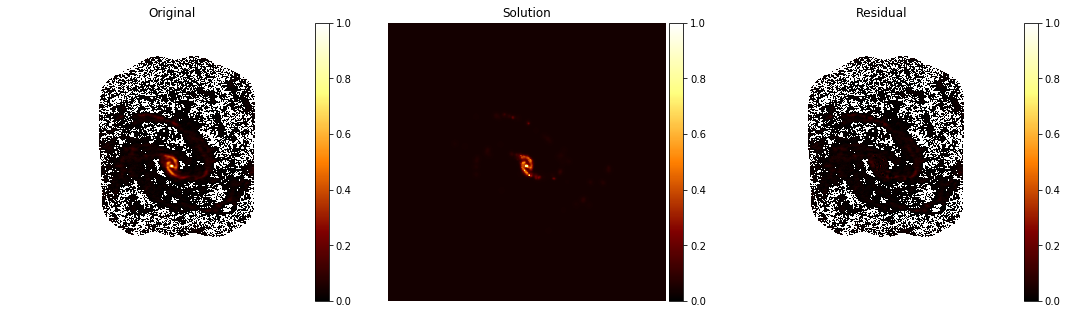

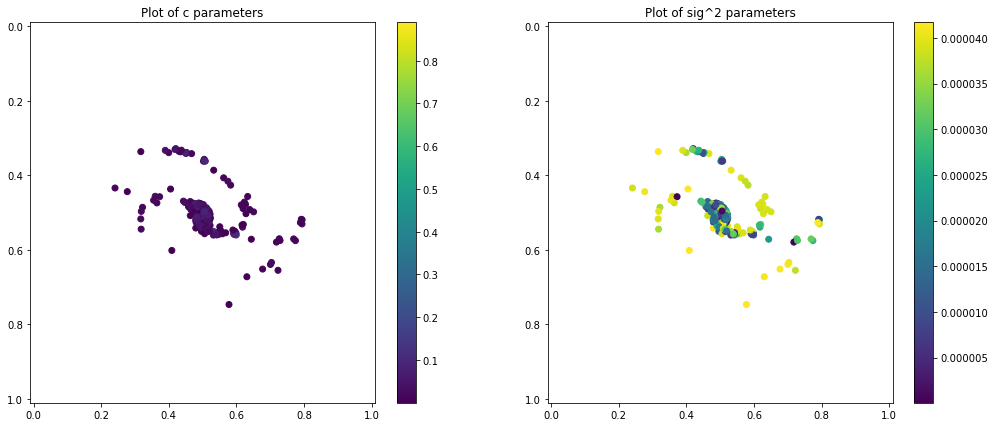

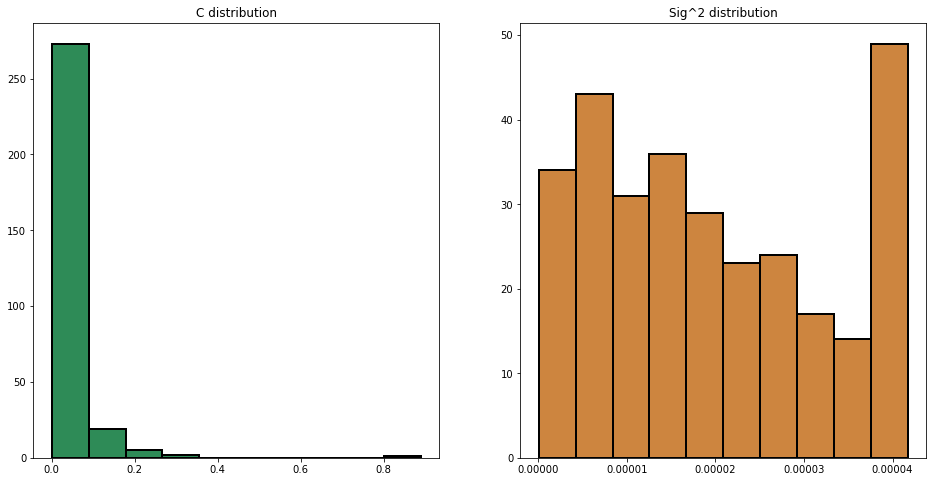

##########################################################################################
Processing example with alpha2: 0.0005310526315789474
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 25236

Residual stats:
Residual RMS: 0.02821806600092674
Residual Variance: 0.0007176865741055998
Flux Lost: 0.1233906840932958
Flux Addition: 0.03645156623185475
psi1(u-f): 6.112503279174039
Exceeded Pixels: 3803
Sharpness: 8.119346018742227
psi2(grad u): 0.10369067923432199
Total elapsed time: 93.23779296875 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2654772881885932
Mean min distance be

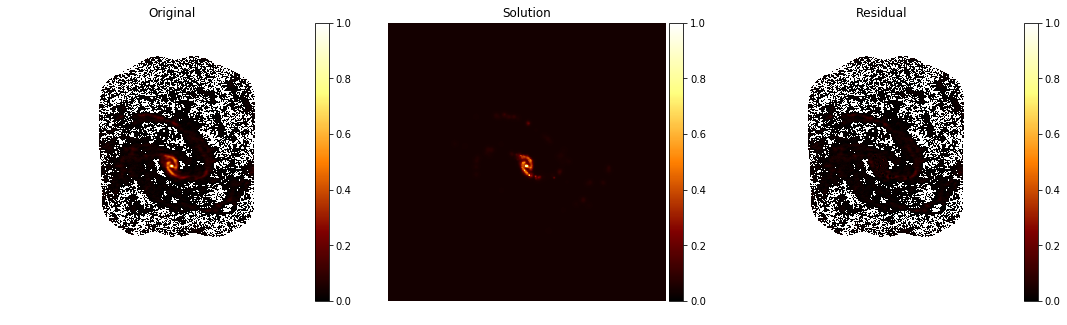

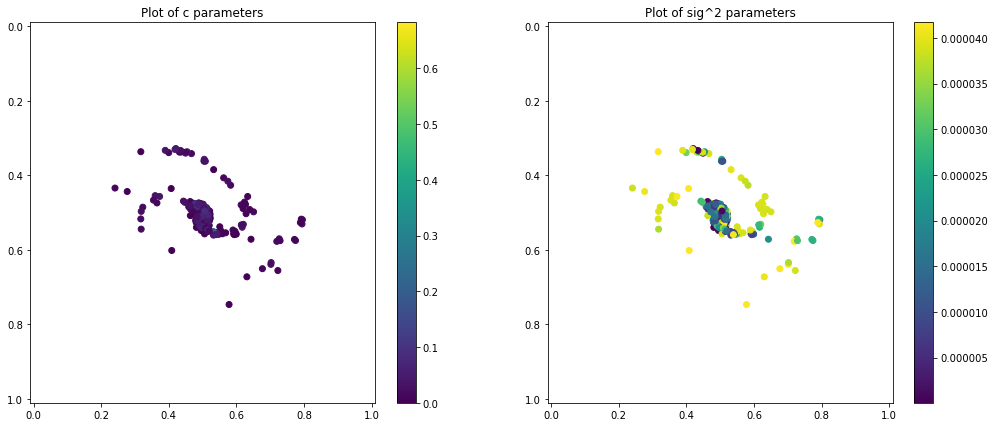

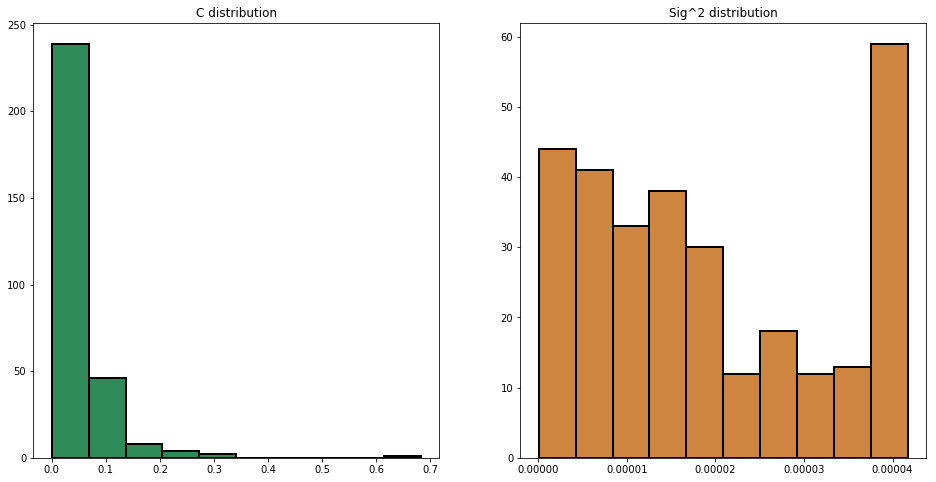

##########################################################################################
Processing example with alpha2: 0.0005831578947368422
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 28841

Residual stats:
Residual RMS: 0.032551534149175596
Residual Variance: 0.0009696784609411027
Flux Lost: 0.13028208526112184
Flux Addition: 0.037274779774684796
psi1(u-f): 9.759199709652673
Exceeded Pixels: 3652
Sharpness: 9.699197434683883
psi2(grad u): 0.5233002518032503
Total elapsed time: 106.95148301124573 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2656289289724662
Mean min dista

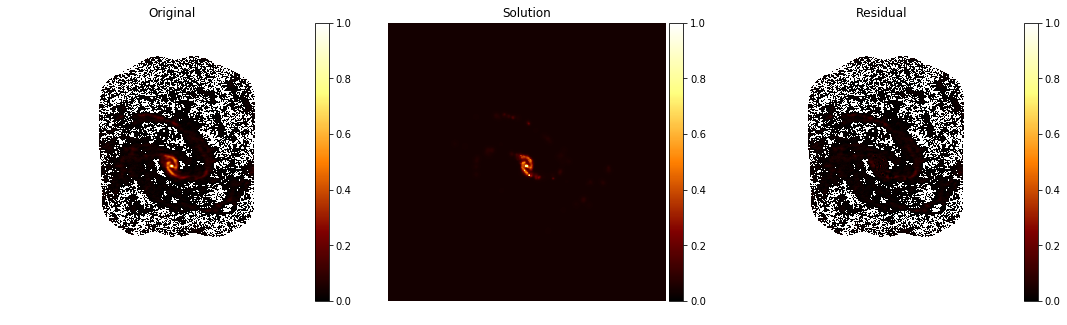

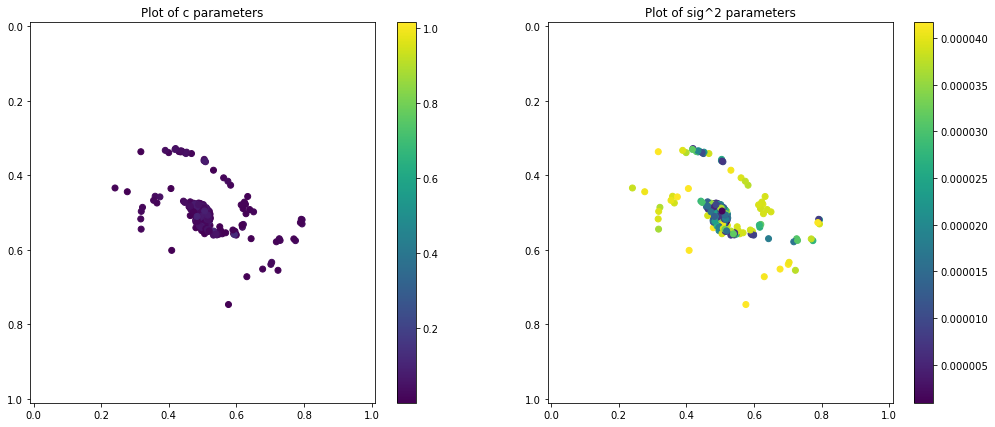

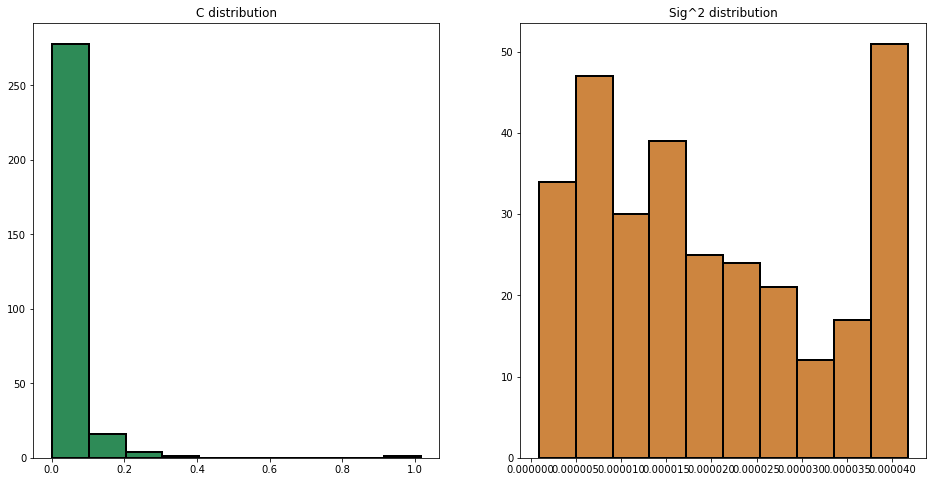

##########################################################################################
Processing example with alpha2: 0.0006352631578947368
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 27641

Residual stats:
Residual RMS: 0.02971767138548863
Residual Variance: 0.0007996796200606975
Flux Lost: 0.126137921713953
Flux Addition: 0.03653552634432139
psi1(u-f): 7.471021836932359
Exceeded Pixels: 3789
Sharpness: 8.7700029235303
psi2(grad u): 0.2651733500743021
Total elapsed time: 102.07058620452881 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26556340325635147
Mean min distance b

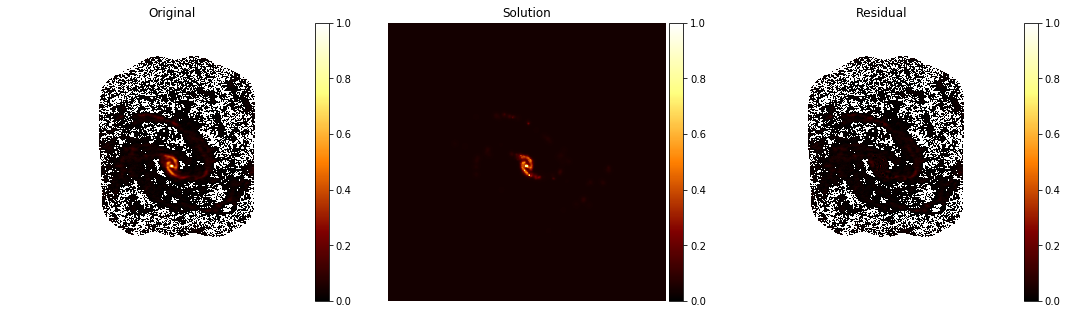

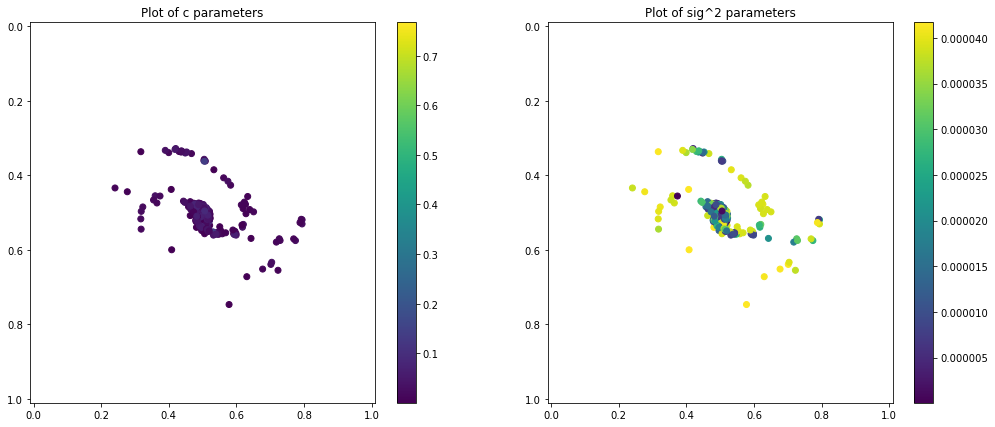

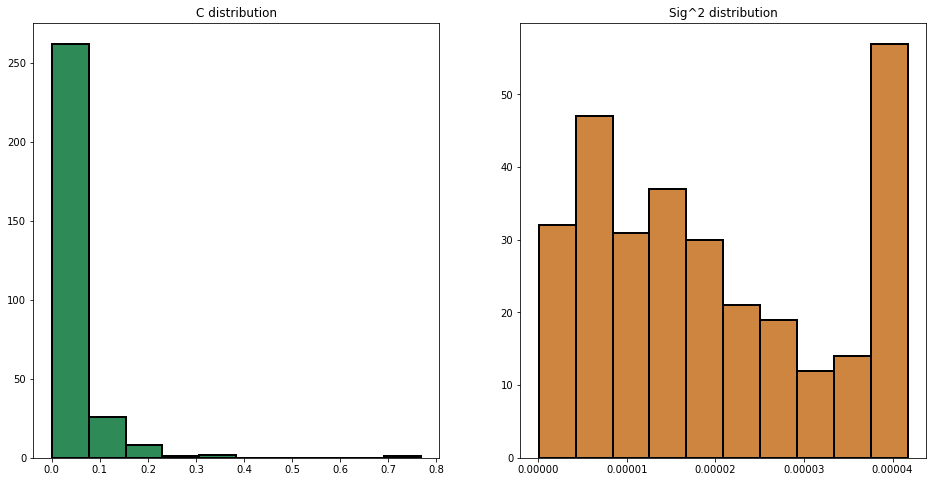

##########################################################################################
Processing example with alpha2: 0.0006873684210526316
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 30045

Residual stats:
Residual RMS: 0.0382164396230291
Residual Variance: 0.0013743329371670796
Flux Lost: 0.13405418436462152
Flux Addition: 0.043012418331433565
psi1(u-f): 14.70290500546933
Exceeded Pixels: 3598
Sharpness: 11.276558997213593
psi2(grad u): 1.2002822785787206
Total elapsed time: 110.87118220329285 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2654997730209079
Mean min distan

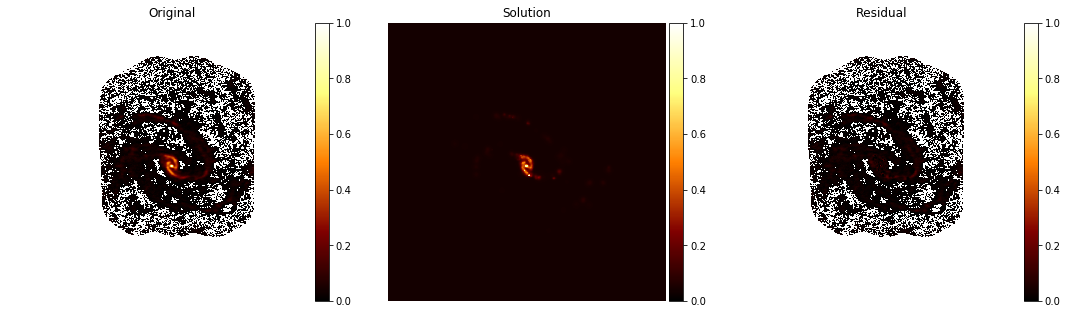

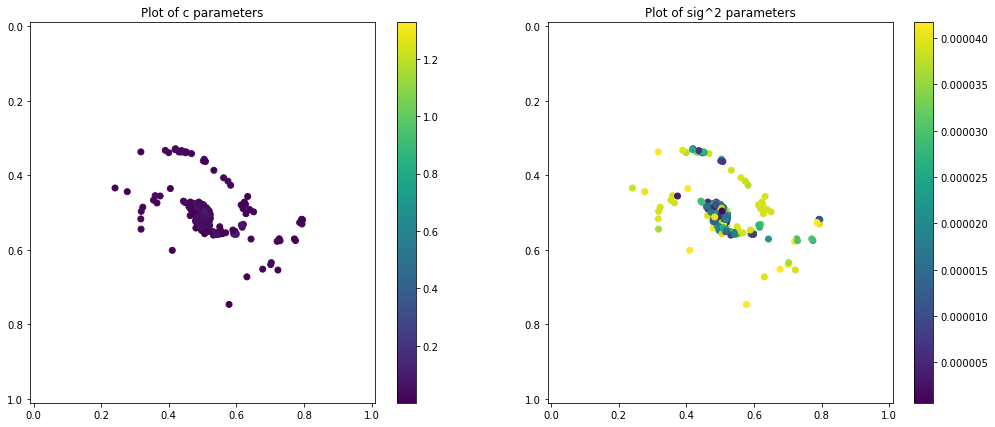

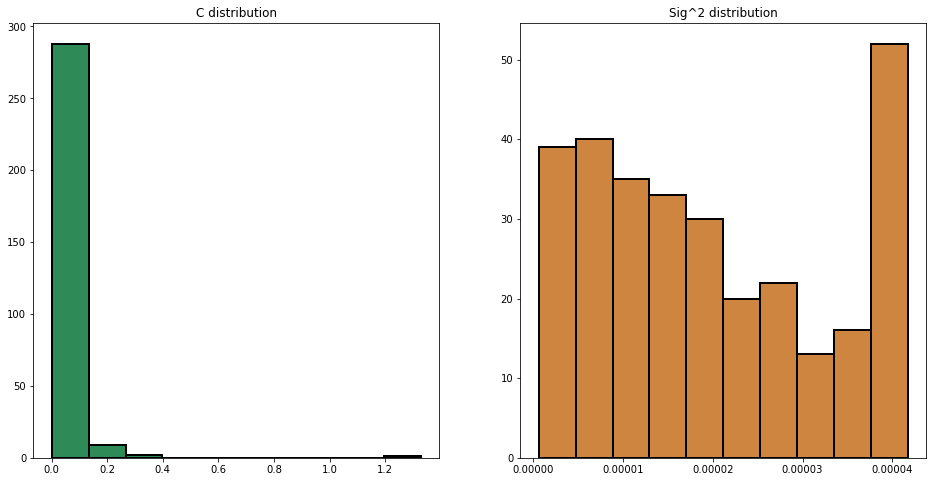

##########################################################################################
Processing example with alpha2: 0.0007394736842105264
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 26439

Residual stats:
Residual RMS: 0.06719820924813062
Residual Variance: 0.004478312342000289
Flux Lost: 0.13552521233082762
Flux Addition: 0.07563469153391539
psi1(u-f): 59.359132564541596
Exceeded Pixels: 3653
Sharpness: 20.38276803105945
psi2(grad u): 3.225377436566665
Total elapsed time: 98.85022377967834 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26552218688788837
Mean min distance

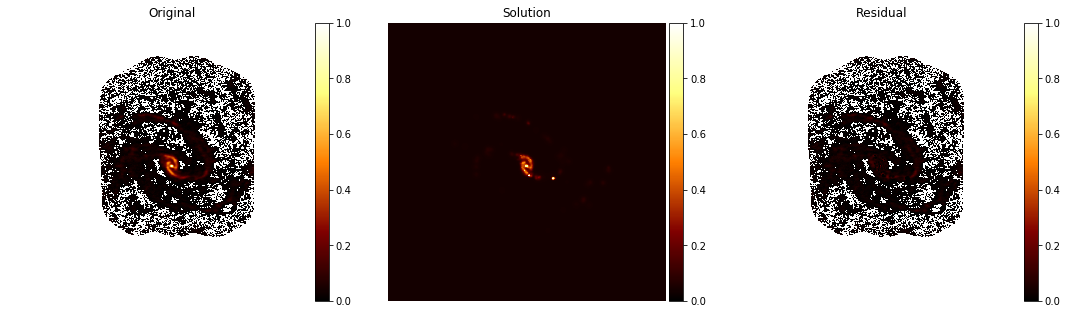

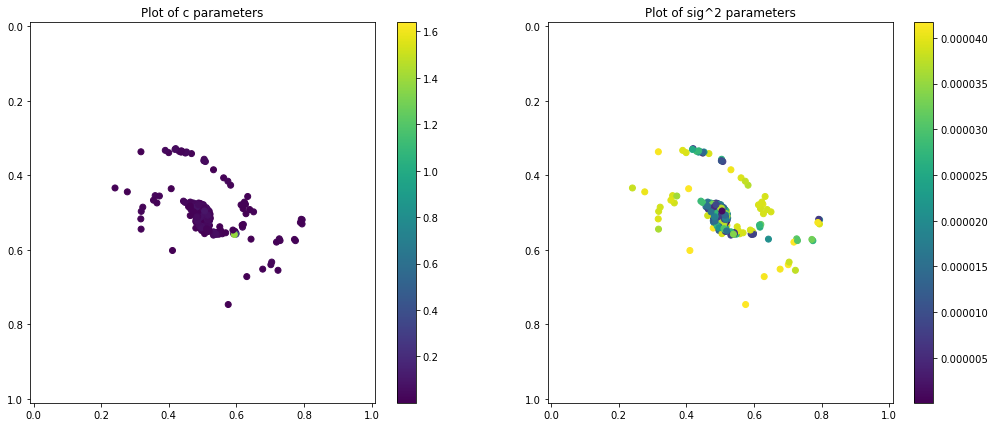

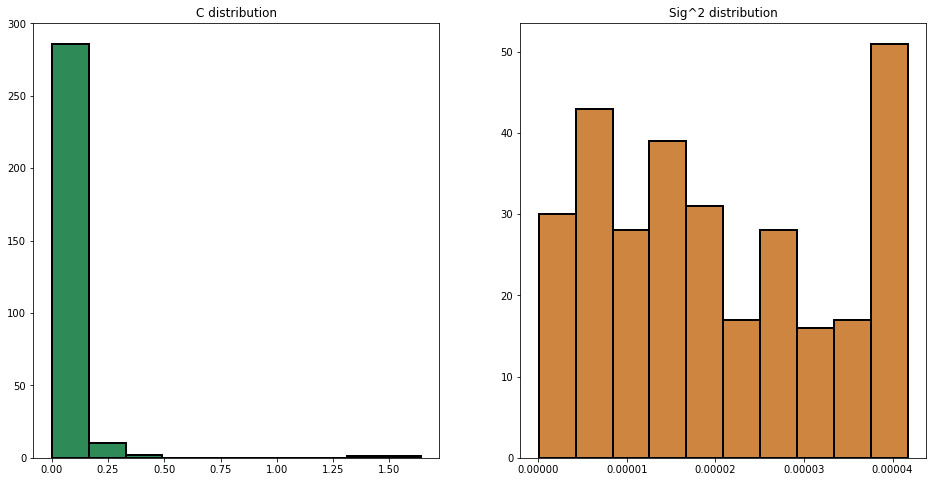

##########################################################################################
Processing example with alpha2: 0.000791578947368421
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 55269

Residual stats:
Residual RMS: 0.040109508121692956
Residual Variance: 0.0015149390192100197
Flux Lost: 0.1345647394043866
Flux Addition: 0.039557061823270144
psi1(u-f): 15.9192873204473
Exceeded Pixels: 3616
Sharpness: 12.31322063728039
psi2(grad u): 1.6126072266917588
Total elapsed time: 192.0050973892212 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26552870479699425
Mean min distance

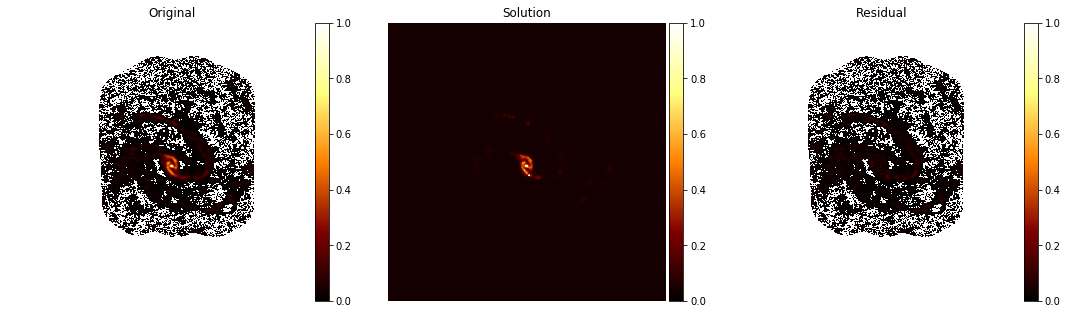

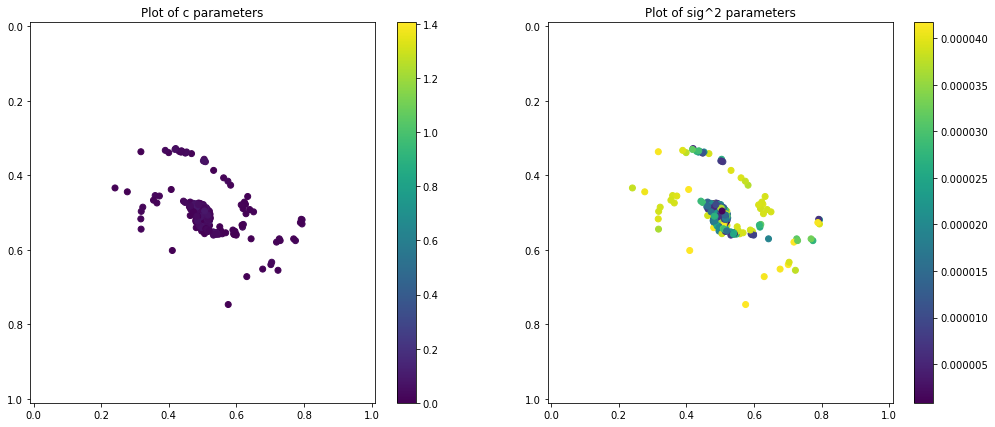

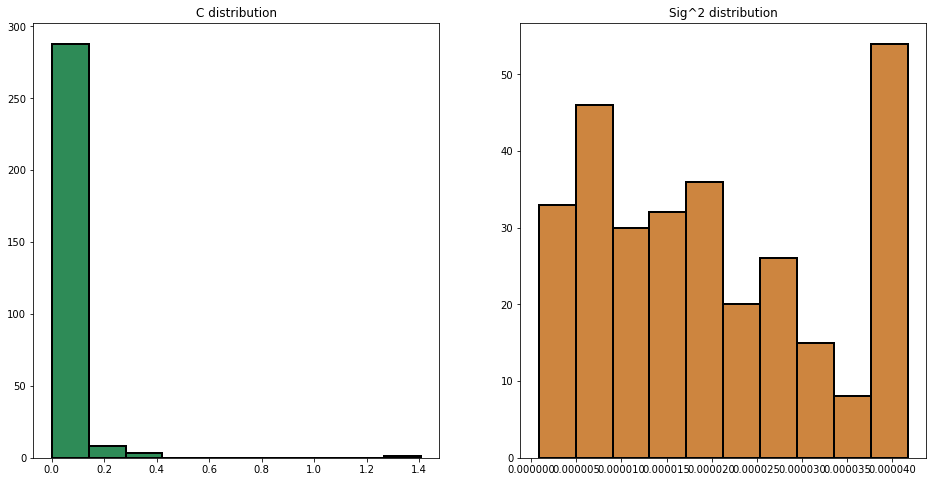

##########################################################################################
Processing example with alpha2: 0.0008436842105263158
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 90108

Residual stats:
Residual RMS: 1.6023334561886817
Residual Variance: 2.567337809768125
Flux Lost: 0.1244944890132287
Flux Addition: 0.23832410848275637
psi1(u-f): 30.470188031070855
Exceeded Pixels: 3625
Sharpness: 36190.69308084012
psi2(grad u): 21.36357978832243
Total elapsed time: 285.6188454627991 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26544260095559336
Mean min distance betw

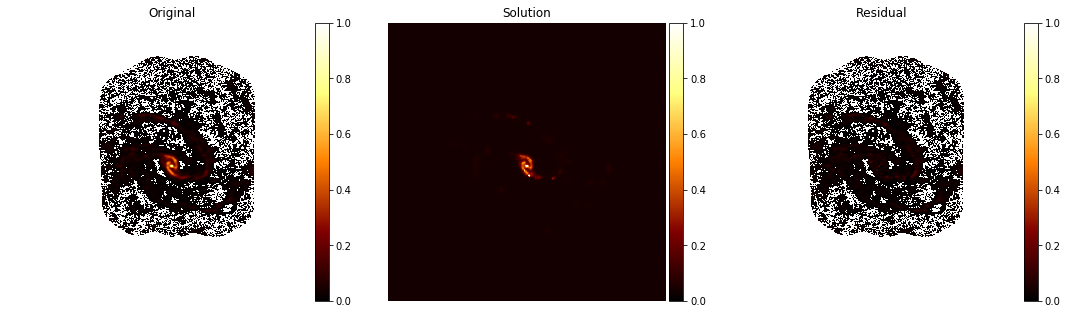

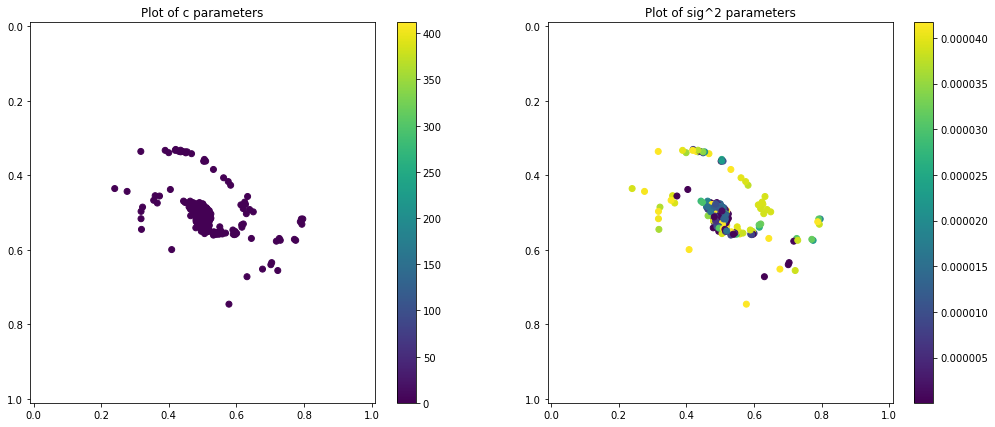

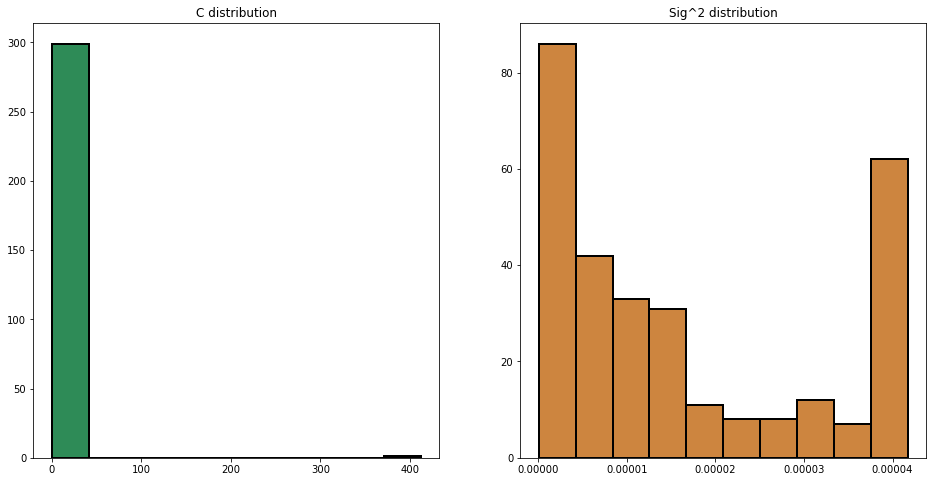

##########################################################################################
Processing example with alpha2: 0.0008957894736842106
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 55267

Residual stats:
Residual RMS: 0.12513727205139205
Residual Variance: 0.01562288024152201
Flux Lost: 0.12505270106919342
Flux Addition: 0.06583280632368034
psi1(u-f): 17.248780072147056
Exceeded Pixels: 3718
Sharpness: 215.49584103528844
psi2(grad u): 11.048916444851436
Total elapsed time: 181.05774784088135 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2656527337607989
Mean min distanc

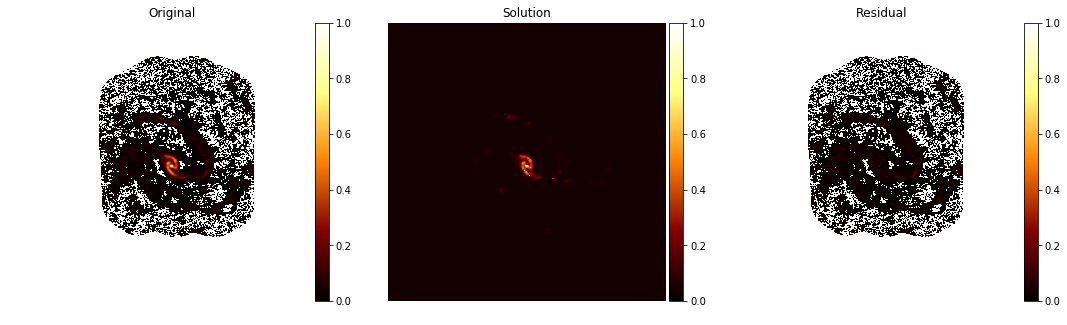

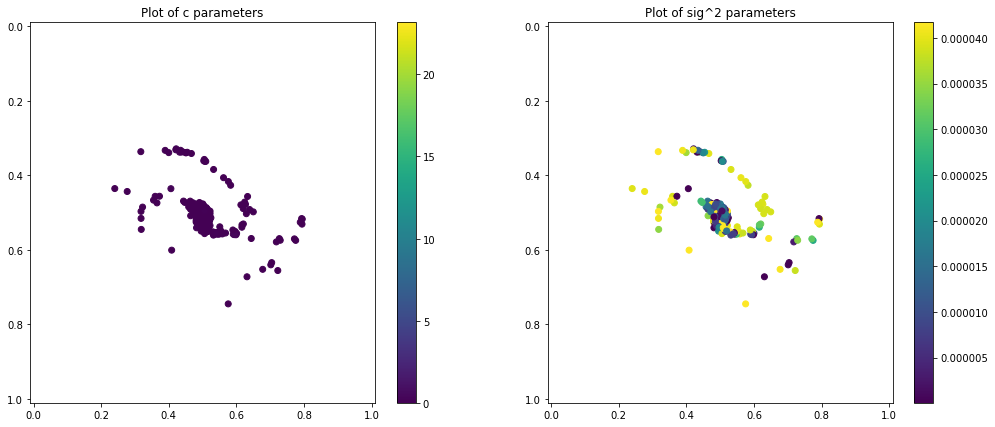

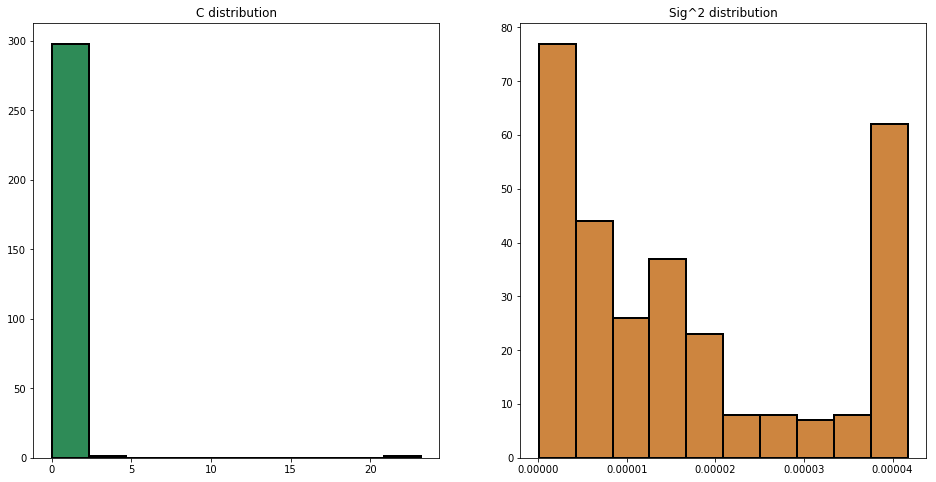

##########################################################################################
Processing example with alpha2: 0.0009478947368421053
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 22832

Residual stats:
Residual RMS: 0.17703197443958624
Residual Variance: 0.03131177166192872
Flux Lost: 0.12366481597953773
Flux Addition: 0.07126018367082829
psi1(u-f): 12.358958313327122
Exceeded Pixels: 3884
Sharpness: 445.79126888573956
psi2(grad u): 4.817104581600243
Total elapsed time: 85.56826591491699 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26581329481732474
Mean min distance

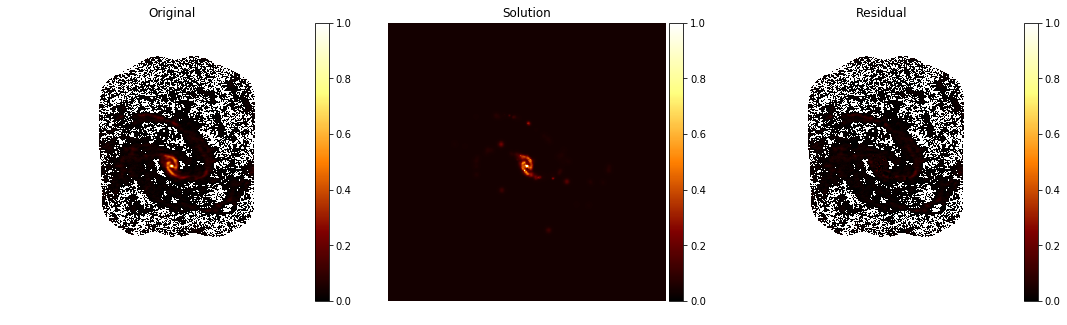

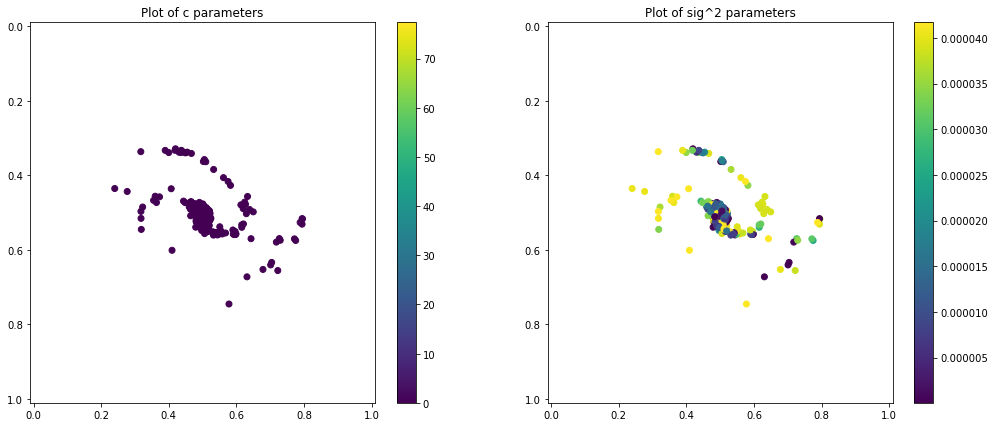

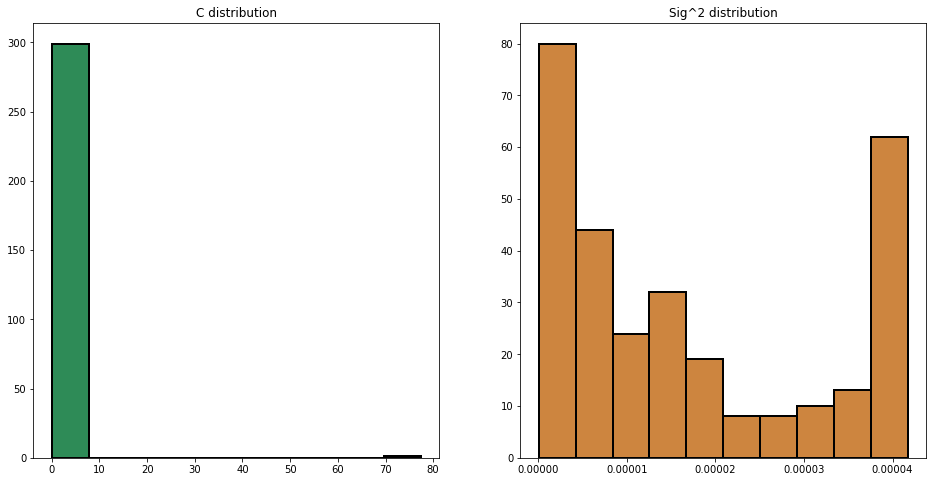

##########################################################################################
Processing example with alpha2: 0.001
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 24036

Residual stats:
Residual RMS: 0.5914916352865146
Residual Variance: 0.34986139545306766
Flux Lost: 0.12791691590752505
Flux Addition: 0.11831130077247723
psi1(u-f): 21.522247392246722
Exceeded Pixels: 3793
Sharpness: 4994.216280755636
psi2(grad u): 4.961174522536376
Total elapsed time: 90.50904679298401 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2664516974152303
Mean min distance between collocatio

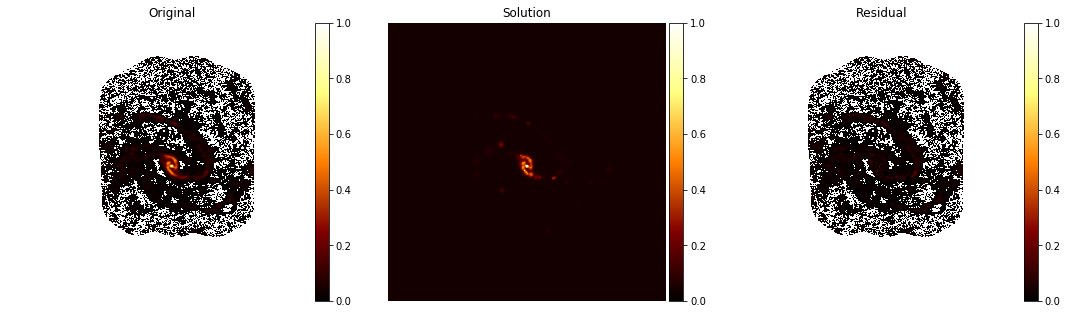

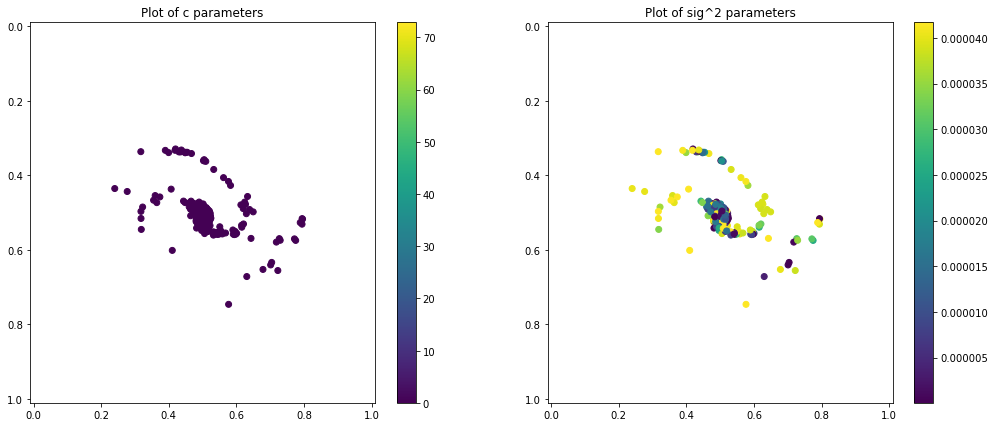

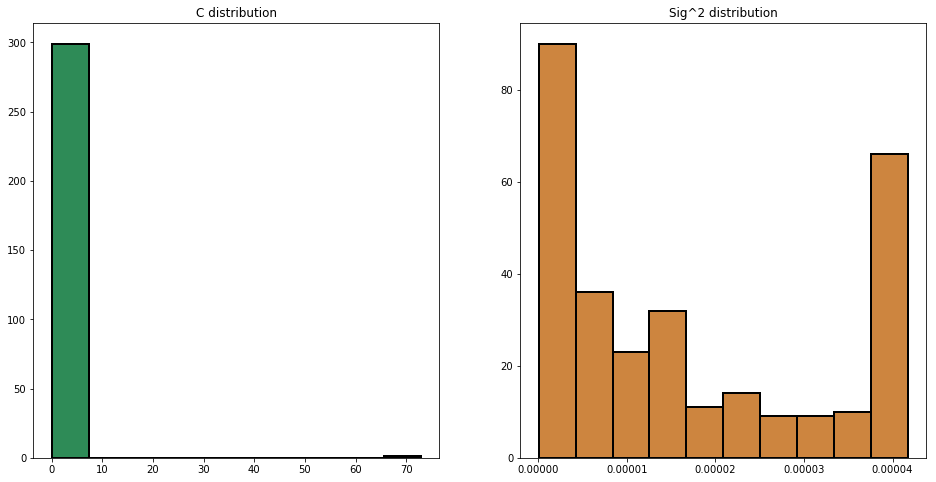

In [7]:
for elm in elm_list:
    print('#'*90)
    print('Processing example with alpha2: {0}'.format(elm.b))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    del elm.data; del elm.mask; del elm.dfunc
    
#pickling results
target = open("exp02_alpha2_m100.pkl", "wb")
pickle.dump(elm_list, target)
target.close()